# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Lalit Kumar Harode


# **Problem Statement**


**I have given the dataset based on a cancer data and based on that need to check and visuvalize this and also will have to apply ml algorithms on it.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer=load_breast_cancer()

In [ ]:
col_names=list(cancer.feature_names)
col_names.append('target')
cancer_df=pd.DataFrame(np.c_[cancer.data,cancer.target],columns=col_names)
cancer_df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890     0.0  
1                  0.1860          0.2750                  0.08902     0.0  
2                  0.2430          0.3613                  0.08758     0.0  
3                  0.2575          0.6638                  0.17300     0.0  
4                  0.1625          0.2364                  0.076

### Dataset First View

In [ ]:
# Dataset First Look
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [ ]:
# Dataset First Look
cancer_df.head().T

0            1            2           3  \
mean radius                17.990000    20.570000    19.690000   11.420000   
mean texture               10.380000    17.770000    21.250000   20.380000   
mean perimeter            122.800000   132.900000   130.000000   77.580000   
mean area                1001.000000  1326.000000  1203.000000  386.100000   
mean smoothness             0.118400     0.084740     0.109600    0.142500   
mean compactness            0.277600     0.078640     0.159900    0.283900   
mean concavity              0.300100     0.086900     0.197400    0.241400   
mean concave points         0.147100     0.070170     0.127900    0.105200   
mean symmetry               0.241900     0.181200     0.206900    0.259700   
mean fractal dimension      0.078710     0.056670     0.059990    0.097440   
radius error                1.095000     0.543500     0.745600    0.495600   
texture error               0.905300     0.733900     0.786900    1.156000   
perimeter error             8.589000     3.398000     4.585000    3.445000   
area error                153.400000    74.080000    94.030000   27.230000   
smoothness error            0.006399     0.005225     0.006150    0.009110   
compactness error           0.049040     0.013080     0.040060    0.074580   
concavity error             0.053730     0.018600     0.038320    0.056610   
concave points error        0.015870     0.013400     0.020580    0.018670   
symmetry error              0.030030     0.013890     0.022500    0.059630   
fractal dimension error     0.006193     0.003532     0.004571    0.009208   
worst radius               25.380000    24.990000    23.570000   14.910000   
worst texture              17.330000    23.410000    25.530000   26.500000   
worst perimeter           184.600000   158.800000   152.500000   98.870000   
worst area               2019.000000  1956.000000  1709.000000  567.700000   
worst smoothness            0.162200     0.123800     0.144400    0.209800   
worst compactness           0.665600     0.186600     0.424500    0.866300   
worst concavity             0.711900     0.241600     0.450400    0.686900   
worst concave points        0.265400     0.186000     0.243000    0.257500   
worst symmetry              0.460100     0.275000     0.361300    0.663800   
worst fractal dimension     0.118900     0.089020     0.087580    0.173000   
target                      0.000000     0.000000     0.000000    0.000000   

                                   4  
mean radius                20.290000  
mean texture               14.340000  
mean perimeter            135.100000  
mean area                1297.000000  
mean smoothness             0.100300  
mean compactness            0.132800  
mean concavity              0.198000  
mean concave points         0.104300  
mean symmetry               0.180900  
mean fractal dimension      0.058830  
radius error                0.757200  
texture error               0.781300  
perimeter error             5.438000  
area error                 94.440000  
smoothness error            0.011490  
compactness error           0.024610  
concavity error             0.056880  
concave points error        0.018850  
symmetry error              0.017560  
fractal dimension error     0.005115  
worst radius               22.540000  
worst texture              16.670000  
worst perimeter           152.200000  
worst area               1575.000000  
worst smoothness            0.137400  
worst compactness           0.205000  
worst concavity             0.400000  
worst concave points        0.162500  
worst symmetry              0.236400  
worst fractal dimension     0.076780  
target                      0.000000

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows_count=len(cancer_df)
col_counts=len(cancer_df.columns)
print(rows_count)
print(col_counts)

569
31


In [ ]:
# or we can also find out the rows and columns count
rows_count=cancer_df.shape[0]
col_counts=cancer_df.shape[1]
print(rows_count)
print(col_counts)

569
31


### Dataset Information

In [ ]:
# Dataset Info
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count=cancer_df.duplicated().sum()
duplicate_count

0

In [ ]:
# Dataset Duplicate Value Count
duplicate_count=cancer_df[cancer_df.duplicated()].sum().reset_index()
duplicate_count

index    0
0               mean radius  0.0
1              mean texture  0.0
2            mean perimeter  0.0
3                 mean area  0.0
4           mean smoothness  0.0
5          mean compactness  0.0
6            mean concavity  0.0
7       mean concave points  0.0
8             mean symmetry  0.0
9    mean fractal dimension  0.0
10             radius error  0.0
11            texture error  0.0
12          perimeter error  0.0
13               area error  0.0
14         smoothness error  0.0
15        compactness error  0.0
16          concavity error  0.0
17     concave points error  0.0
18           symmetry error  0.0
19  fractal dimension error  0.0
20             worst radius  0.0
21            worst texture  0.0
22          worst perimeter  0.0
23               worst area  0.0
24         worst smoothness  0.0
25        worst compactness  0.0
26          worst concavity  0.0
27     worst concave points  0.0
28           worst symmetry  0.0
29  worst fractal dimension  0.0
30                   target  0.0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null_count=cancer_df.isnull().sum()
null_count

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Text(0.5, 1.0, 'null values count')

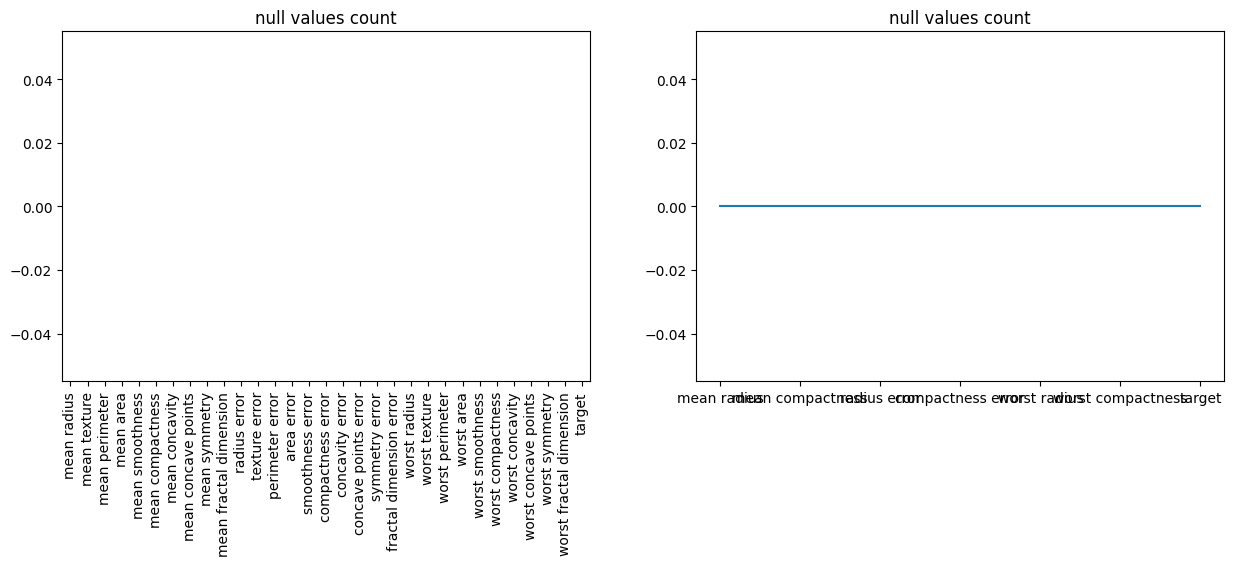

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,10))
plt.subplot(221)
null_count.plot(kind='bar')
plt.title('null values count')

plt.subplot(222)
null_count.plot(kind='line')
plt.title('null values count')

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
columns=cancer_df.columns.tolist()
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [ ]:
# Dataset Describe
cancer_df.describe().T

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
target                   569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values=cancer_df.nunique().reset_index().rename(columns={'index':'column_name',0:'unique_counts'})
unique_values

column_name  unique_counts
0               mean radius            456
1              mean texture            479
2            mean perimeter            522
3                 mean area            539
4           mean smoothness            474
5          mean compactness            537
6            mean concavity            537
7       mean concave points            542
8             mean symmetry            432
9    mean fractal dimension            499
10             radius error            540
11            texture error            519
12          perimeter error            533
13               area error            528
14         smoothness error            547
15        compactness error            541
16          concavity error            533
17     concave points error            507
18           symmetry error            498
19  fractal dimension error            545
20             worst radius            457
21            worst texture            511
22          worst perimeter            514
23               worst area            544
24         worst smoothness            411
25        worst compactness            529
26          worst concavity            539
27     worst concave points            492
28           worst symmetry            500
29  worst fractal dimension            535
30                   target              2

## 3. ***Data Wrangling***

**discrete columns**

In [ ]:
# Discrete and continious columns
discrete_columns=[col for col in columns if len(cancer_df[col].unique())<20]
discrete_columns

['target']

**continious columns**

In [ ]:
continious_columns=[col for col in columns if col not in discrete_columns ]
continious_columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

### Data Wrangling Code

In [ ]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

####**Target value discription**

In [ ]:
cancer_df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

####**Mean radius vs target values**

In [ ]:
cancer_df.groupby('target')['mean radius'].mean().reset_index()

target  mean radius
0     0.0    17.462830
1     1.0    12.146524

####**Mean texture vs target values**

In [ ]:
cancer_df.groupby('target')['mean texture'].mean().reset_index()

target  mean texture
0     0.0     21.604906
1     1.0     17.914762

####**Mean perimeter vs target values**

In [ ]:
cancer_df.groupby('target')['mean perimeter'].mean().reset_index()

target  mean perimeter
0     0.0      115.365377
1     1.0       78.075406

####**Mean area vs target values**

In [ ]:
cancer_df.groupby('target')['mean area'].mean().reset_index()

target   mean area
0     0.0  978.376415
1     1.0  462.790196

####**Mean smoothness vs target values**

In [ ]:
cancer_df.groupby('target')['mean smoothness'].mean().reset_index()

target  mean smoothness
0     0.0         0.102898
1     1.0         0.092478

####**Mean compactness vs target values**

In [ ]:
cancer_df.groupby('target')['mean compactness'].mean().reset_index()

target  mean compactness
0     0.0          0.145188
1     1.0          0.080085

####**Mean concavity vs target values**

In [ ]:
cancer_df.groupby('target')['mean concavity'].mean().reset_index()

target  mean concavity
0     0.0        0.160775
1     1.0        0.046058

####**Mean concave points vs target values**

In [ ]:
cancer_df.groupby('target')['mean concave points'].mean().reset_index()

target  mean concave points
0     0.0             0.087990
1     1.0             0.025717

####**Mean symmetry vs target values**

In [ ]:
cancer_df.groupby('target')['mean symmetry'].mean().reset_index()

target  mean symmetry
0     0.0       0.192909
1     1.0       0.174186

####**Mean fractal dimension vs target values**

In [ ]:
cancer_df.groupby('target')['mean fractal dimension'].mean().reset_index()

target  mean fractal dimension
0     0.0                0.062680
1     1.0                0.062867

####**Divide the columns based on the data they are containing**

In [ ]:
mean_data_column=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']

In [ ]:
error_data_columns=['radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error']

In [ ]:
worst_or_max_limit_column=['worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Target value visuvalization**

<Axes: xlabel='target', ylabel='count'>

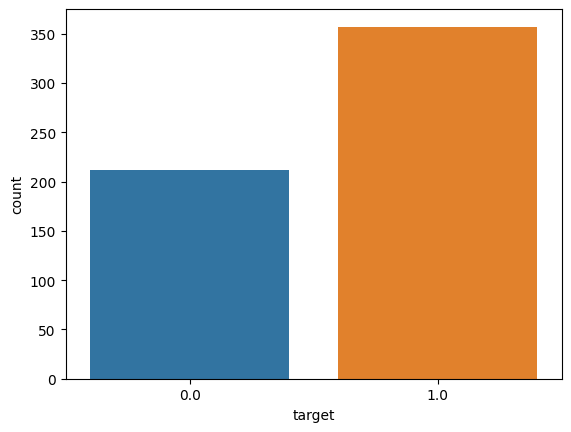

In [ ]:
sns.countplot(x=cancer_df['target'])

#### **Distribution of a mean data columns**

In [ ]:
mean_data_column

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

**Histogrma on a mean data column**

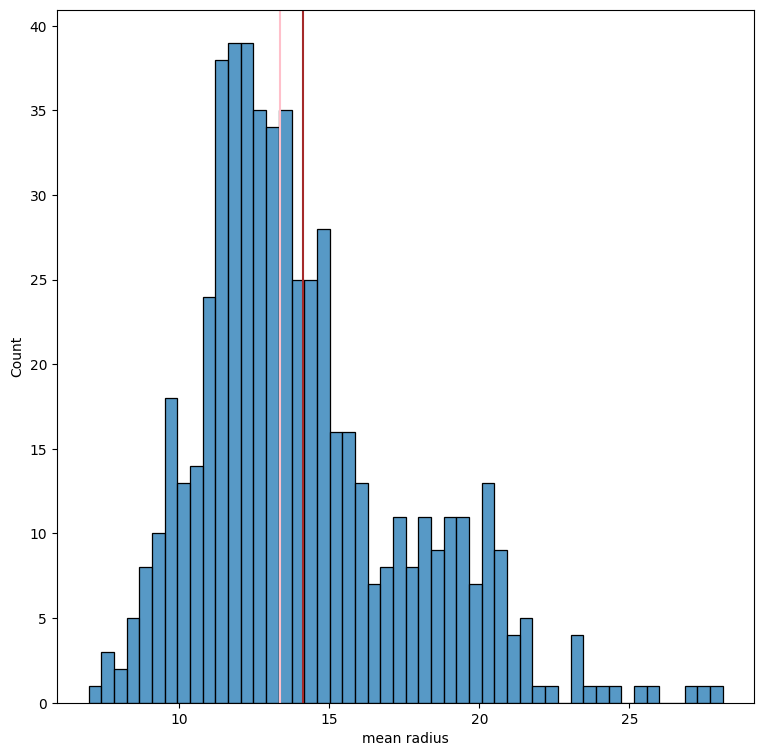

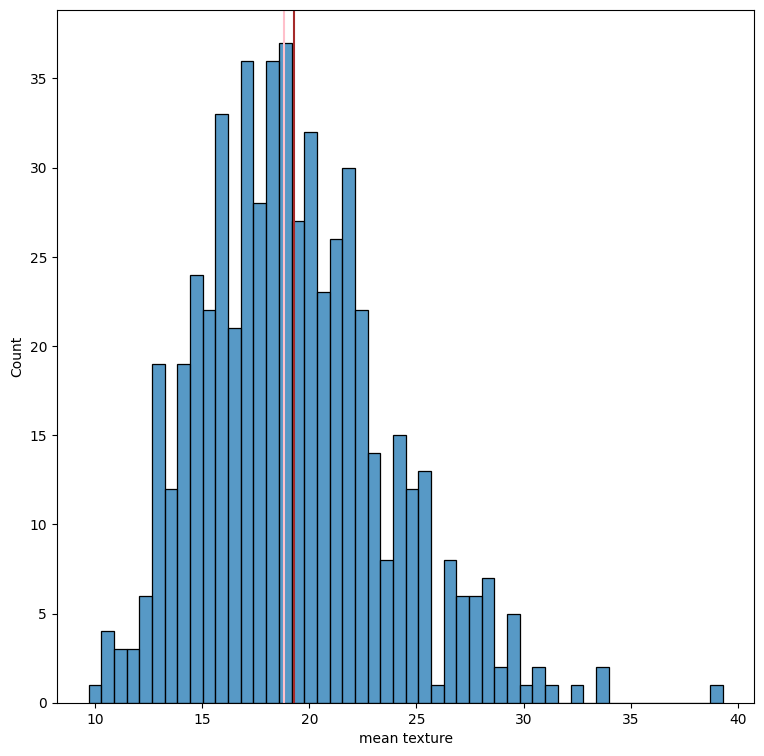

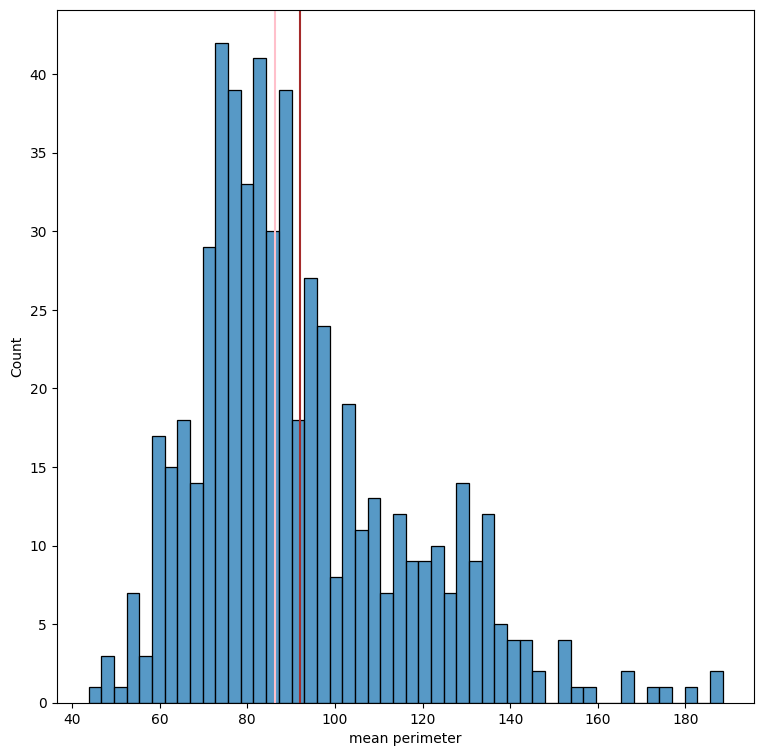

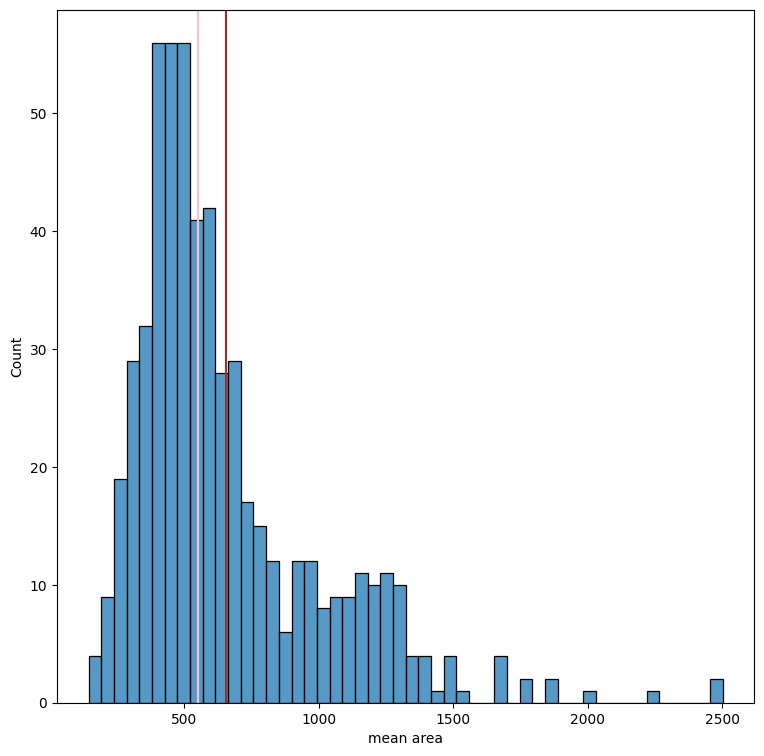

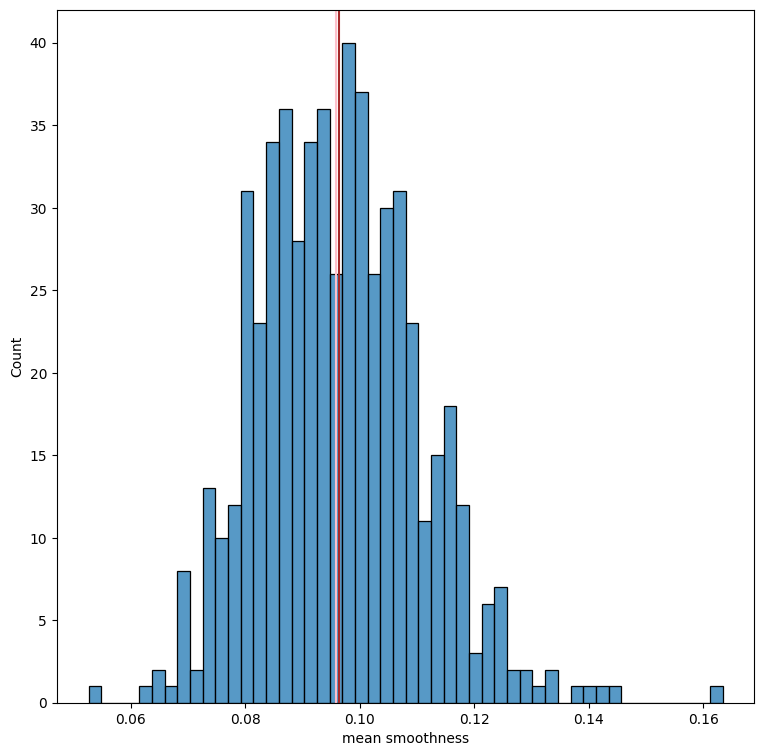

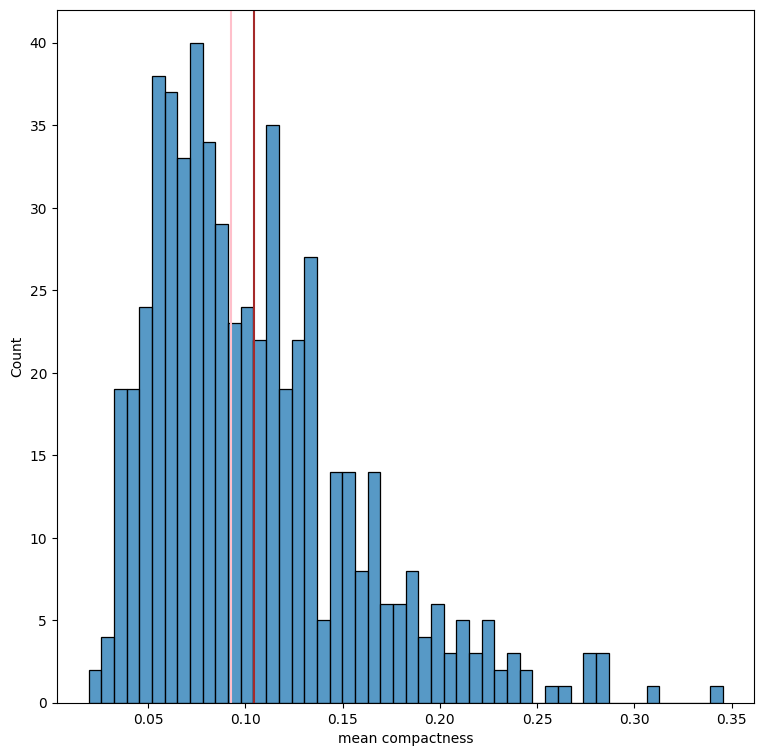

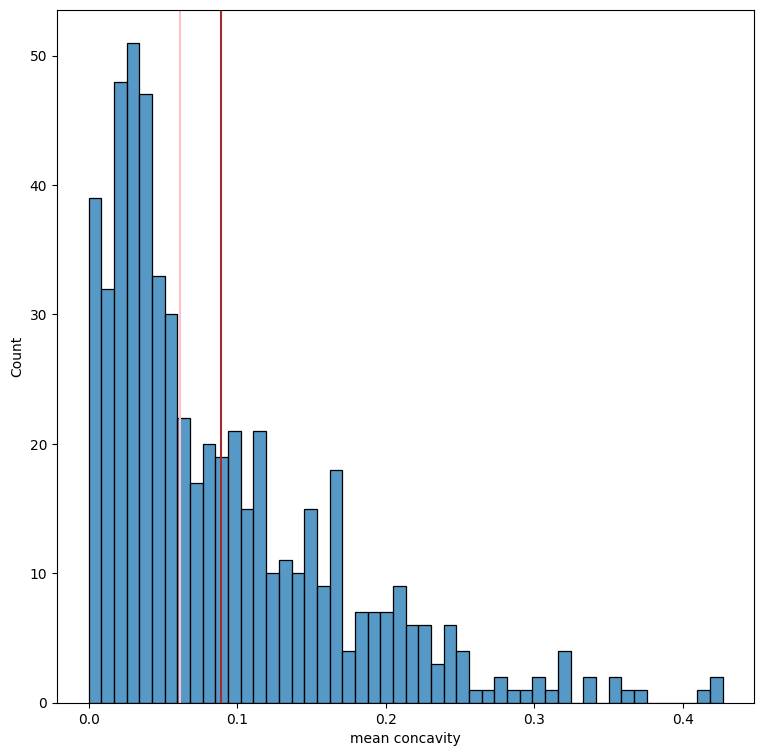

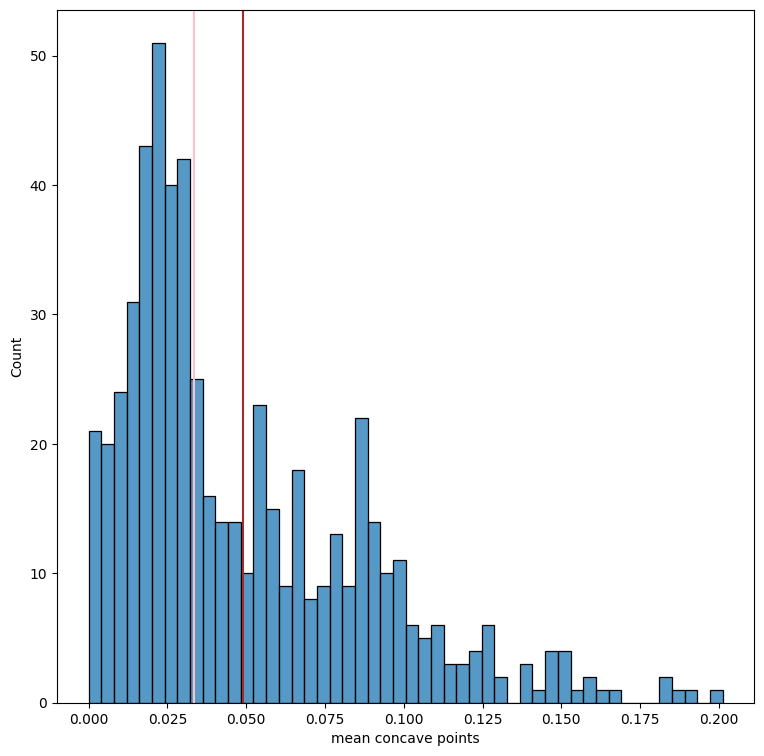

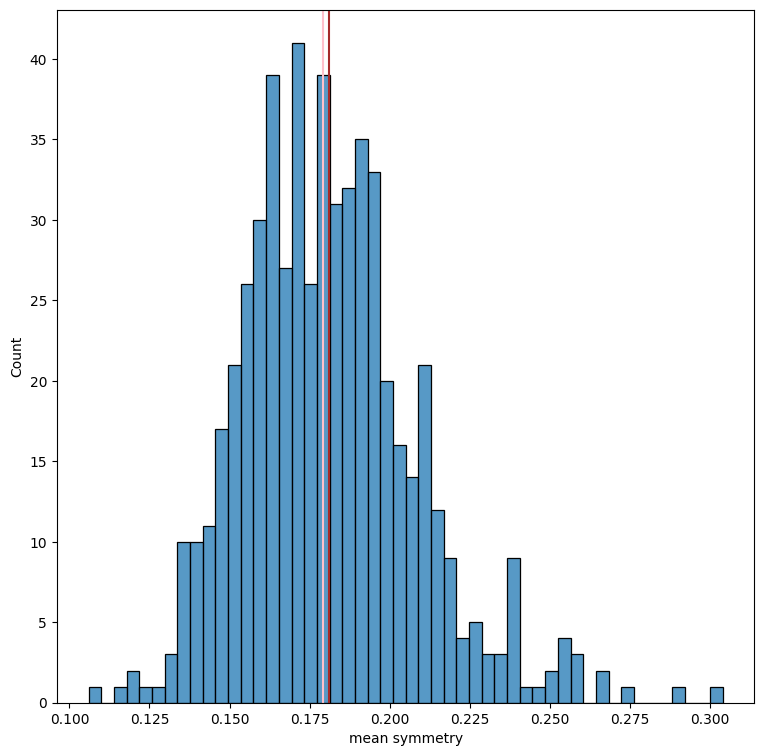

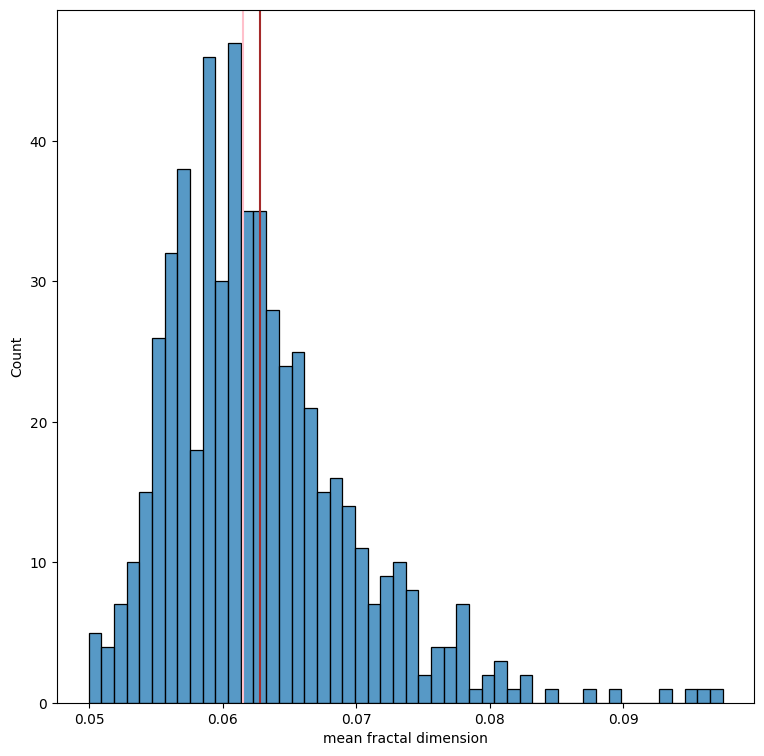

In [ ]:
for col in mean_data_column:
  fig=plt.figure(figsize=(9,9))
  ax=fig.gca()
  features=cancer_df[col]
  sns.histplot(x=features,bins=50)
  plt.axvline(features.median(),color='pink')
  plt.axvline(features.mean(),color='brown')

#### **distribution of a error data columns**

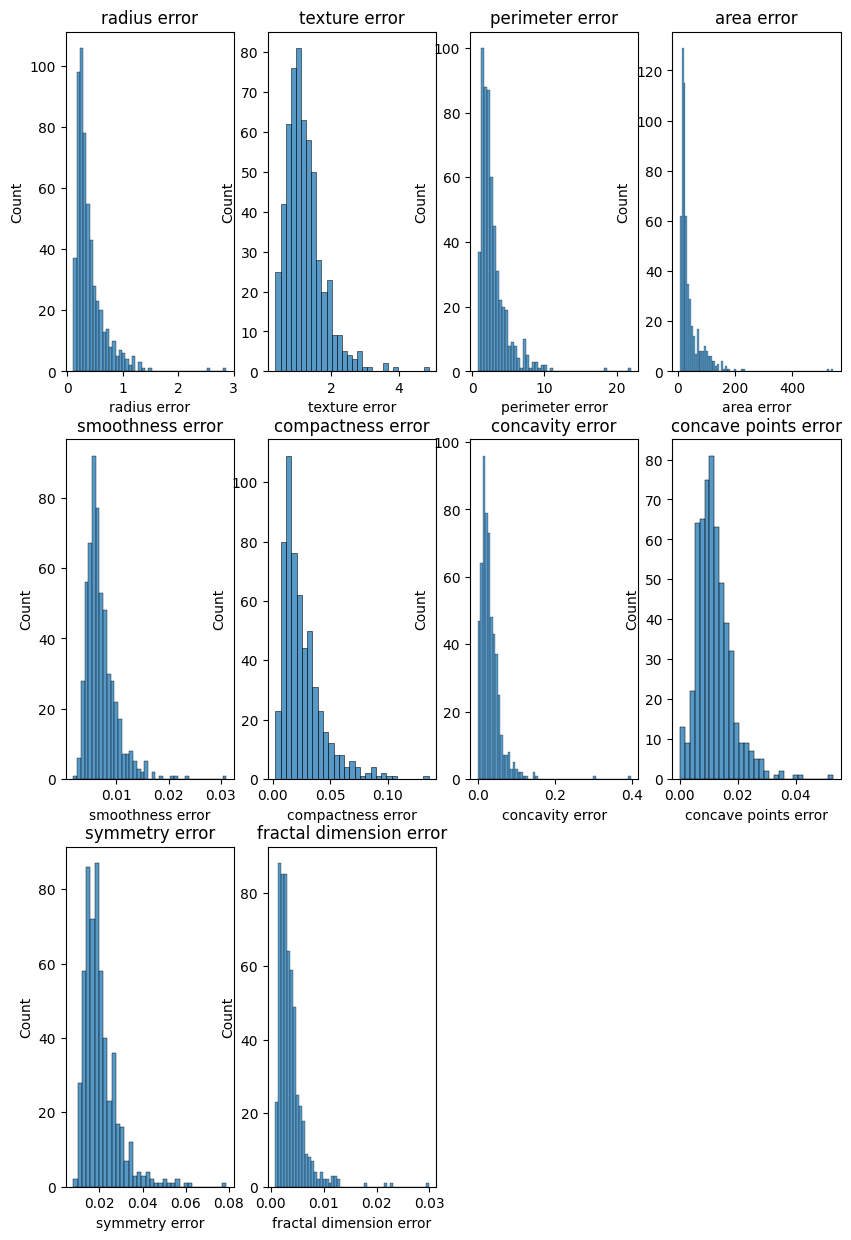

In [ ]:
#Creating a boxplot to detect columns with outliers
plt.figure(figsize=(10,15))
for index,item in enumerate(error_data_columns):
  plt.subplot(3,4,index+1)
  sns.histplot(x=cancer_df[item])
  plt.title(item)

#### **Distribution of a worst_or_max_limit_column**

In [ ]:
worst_or_max_limit_column

['worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

<ipython-input-43-57df54ec5a09>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features)
<ipython-input-43-57df54ec5a09>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features)
<ipython-input-43-57df54ec5a09>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seabo

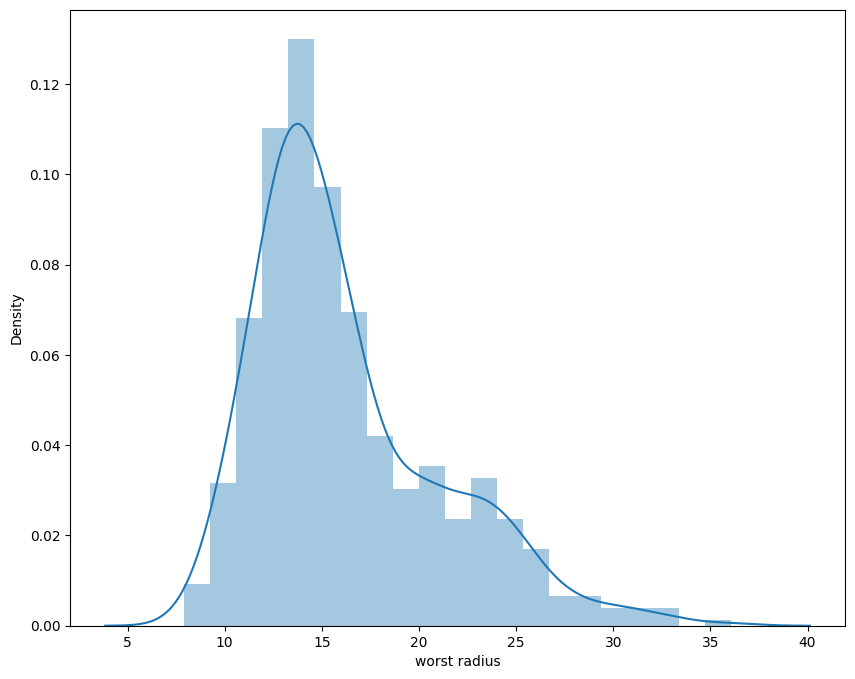

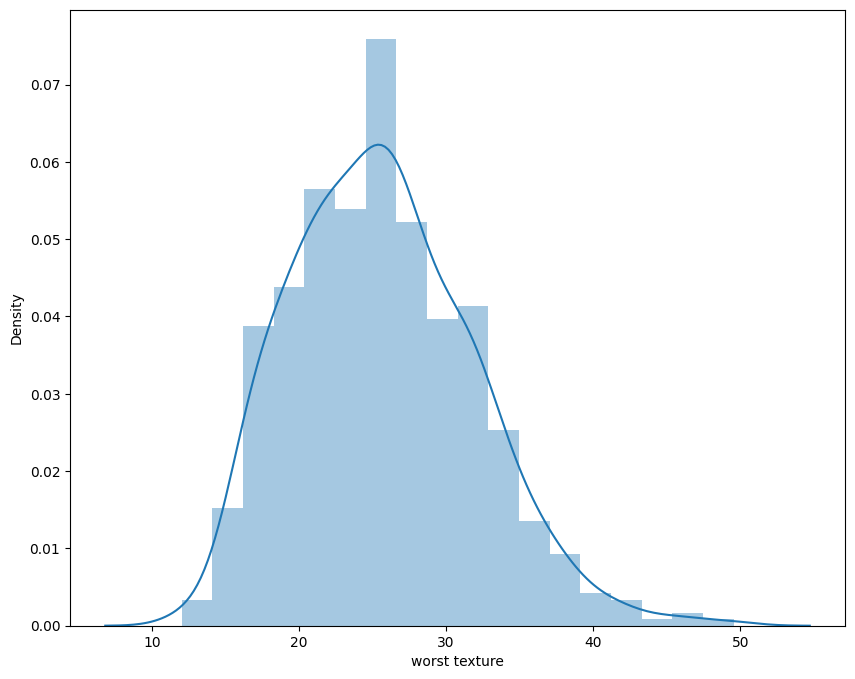

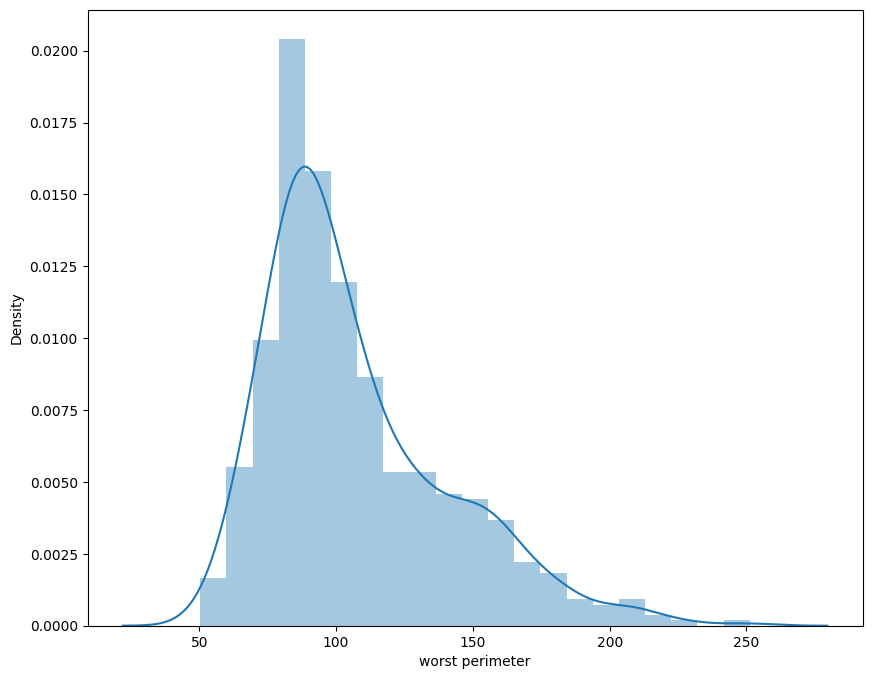

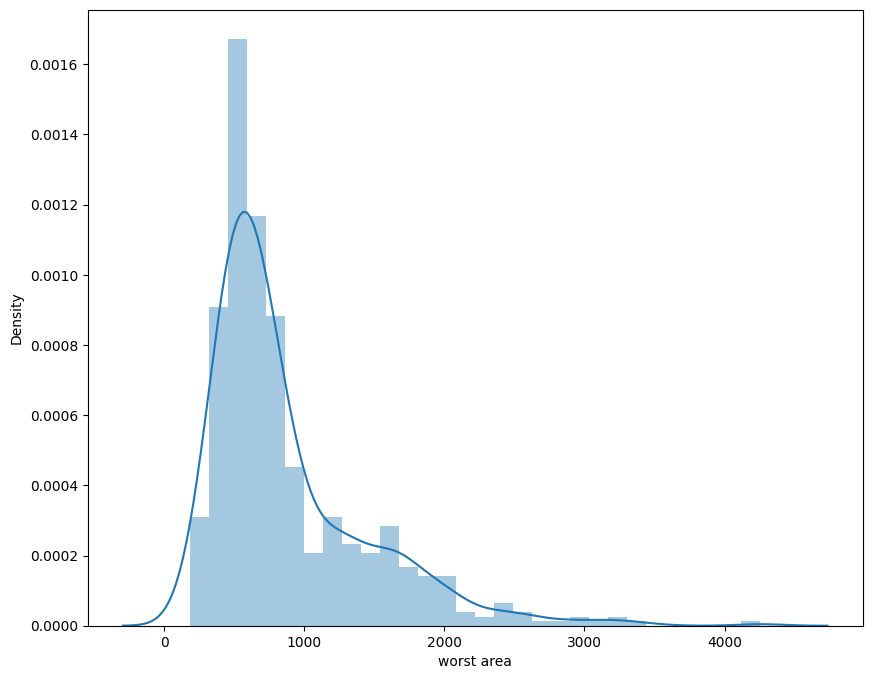

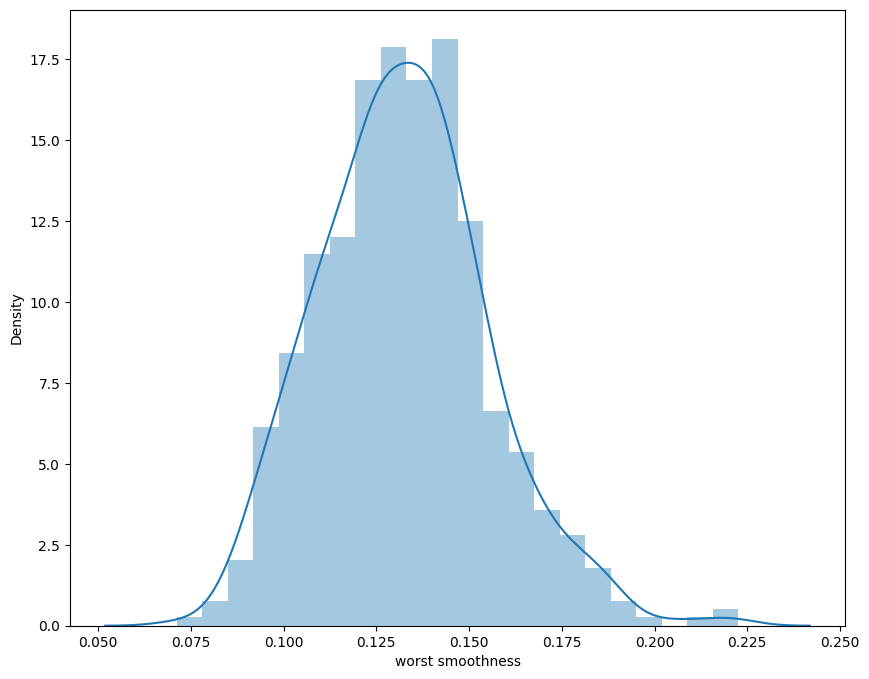

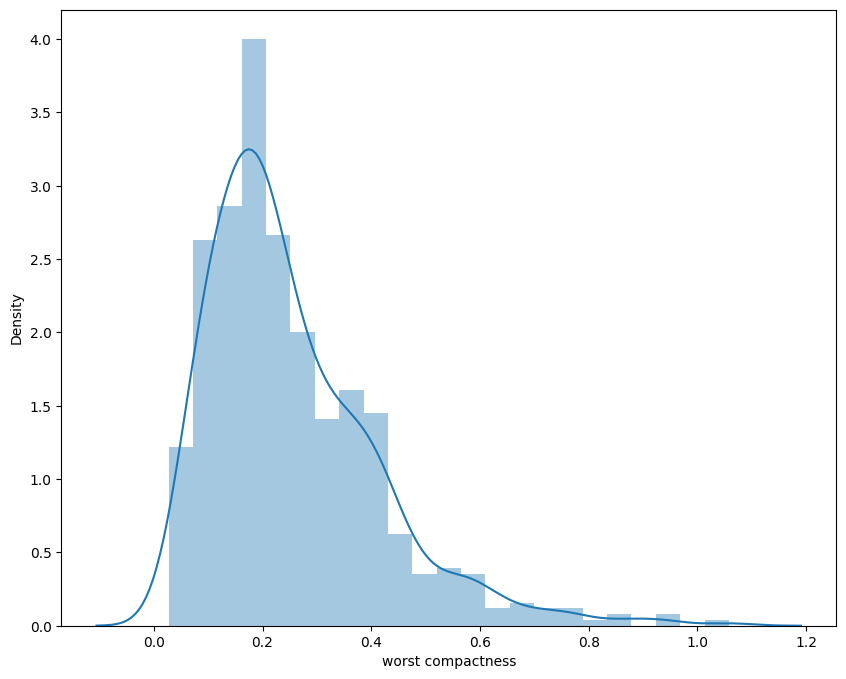

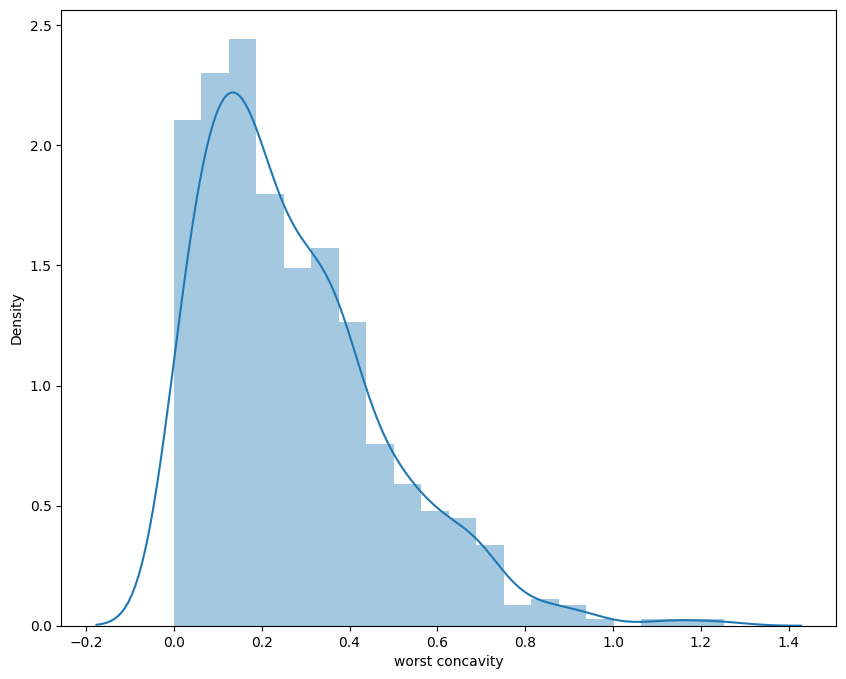

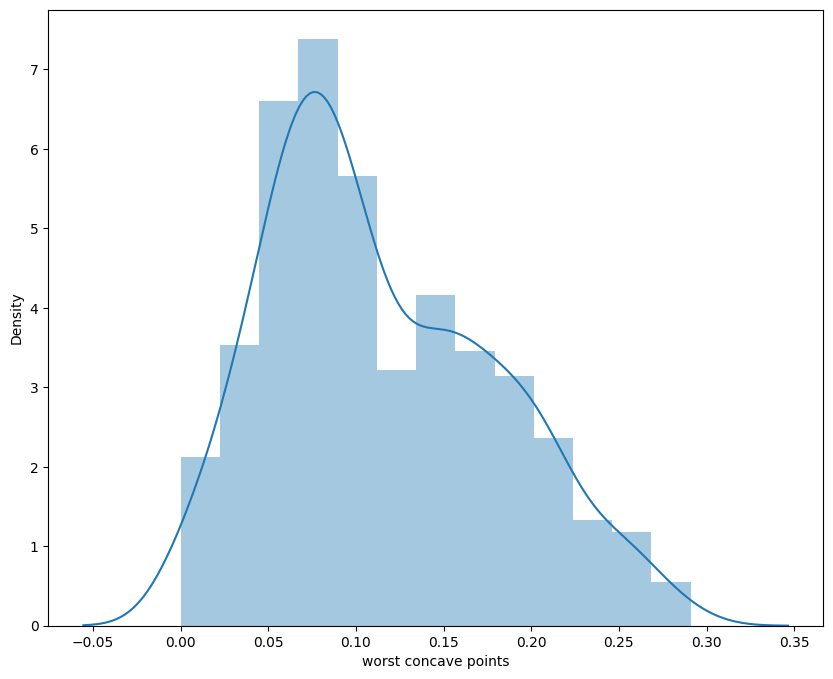

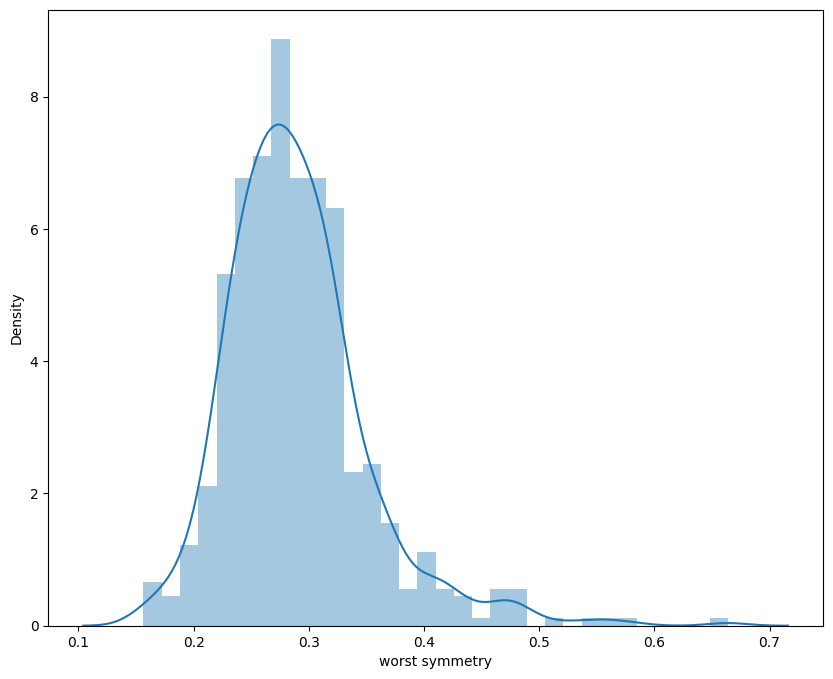

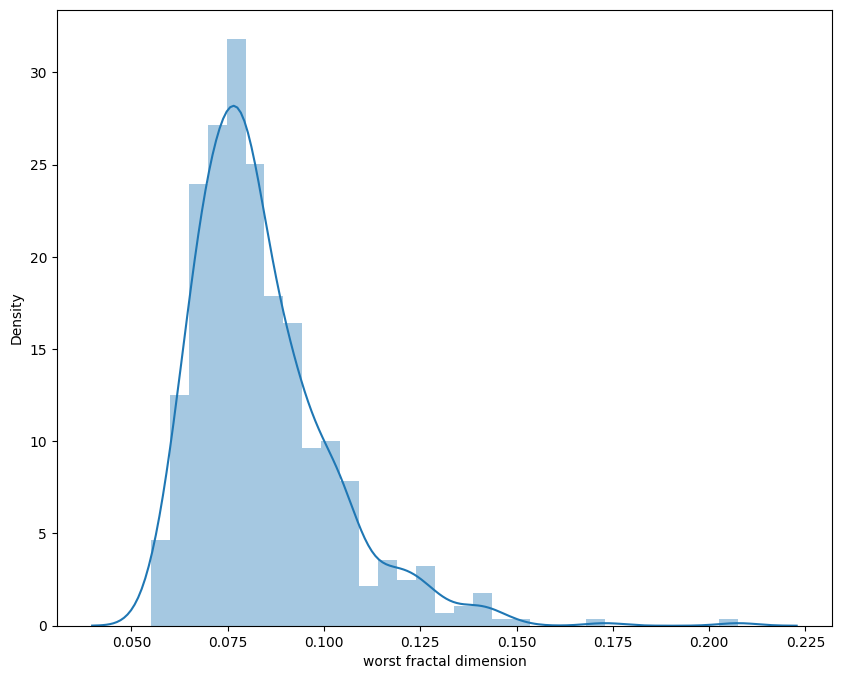

In [ ]:
for col in worst_or_max_limit_column:
  fig=plt.figure(figsize=(10,8))
  ax=fig.gca()
  features=cancer_df[col]
  sns.distplot(features)


#### **scatter plot on mean data columns**

In [ ]:
mean_data_column

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

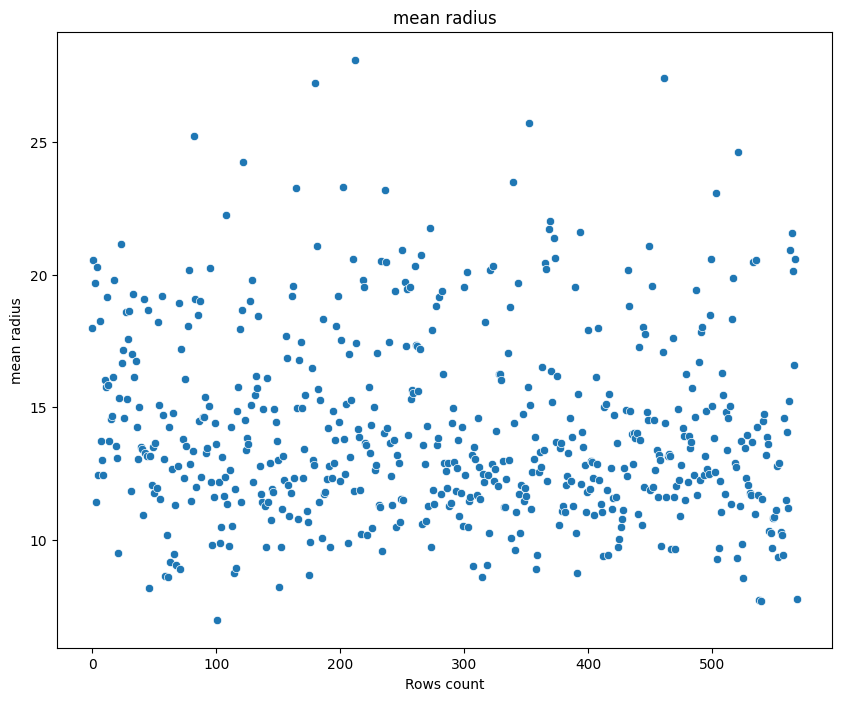

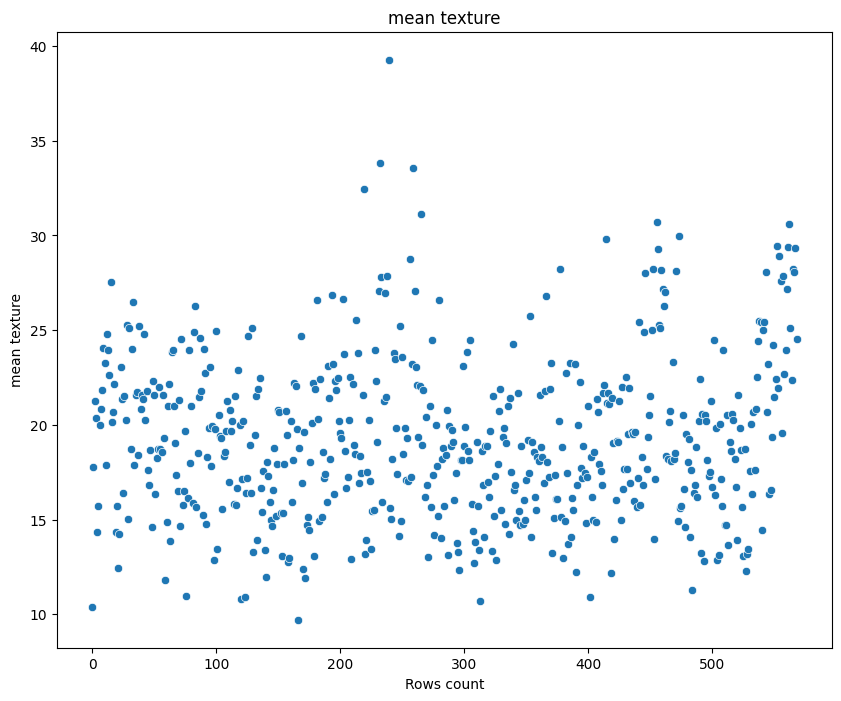

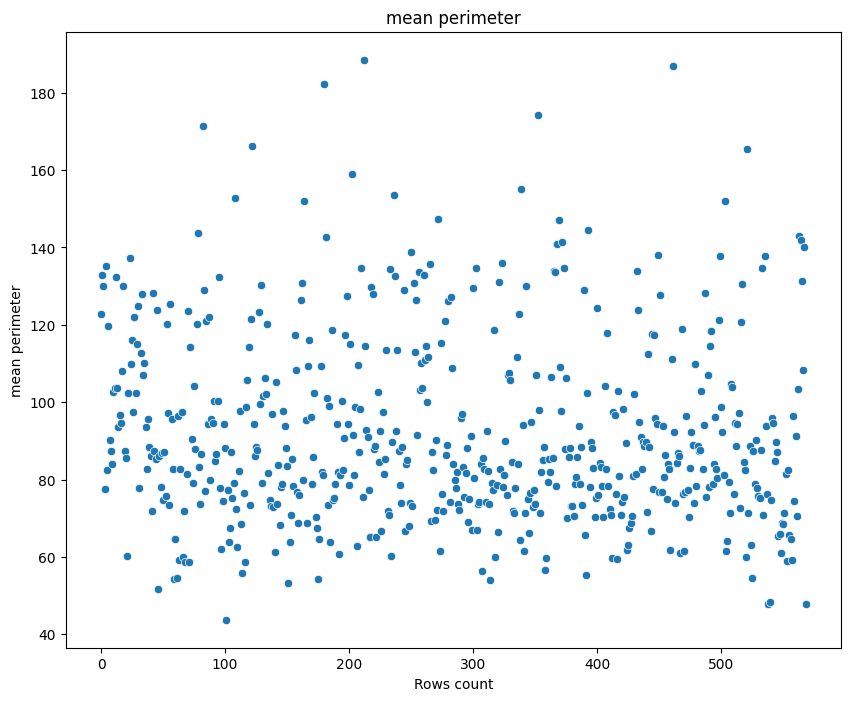

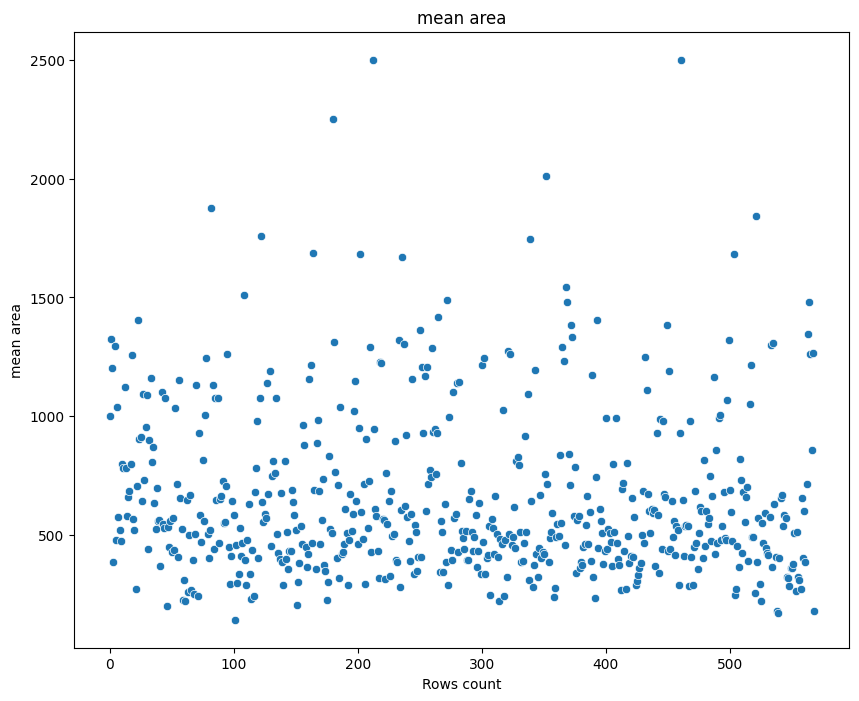

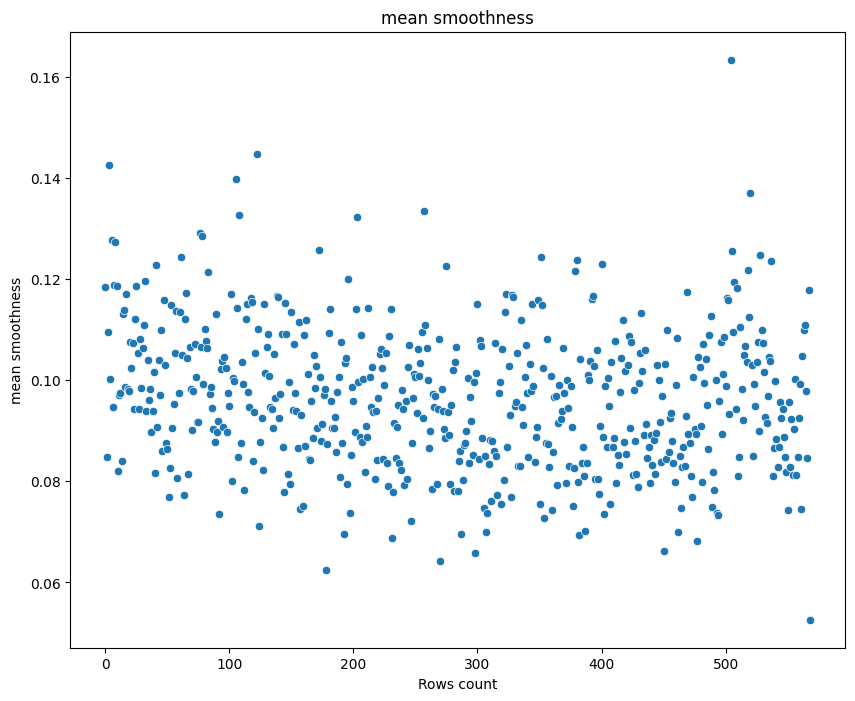

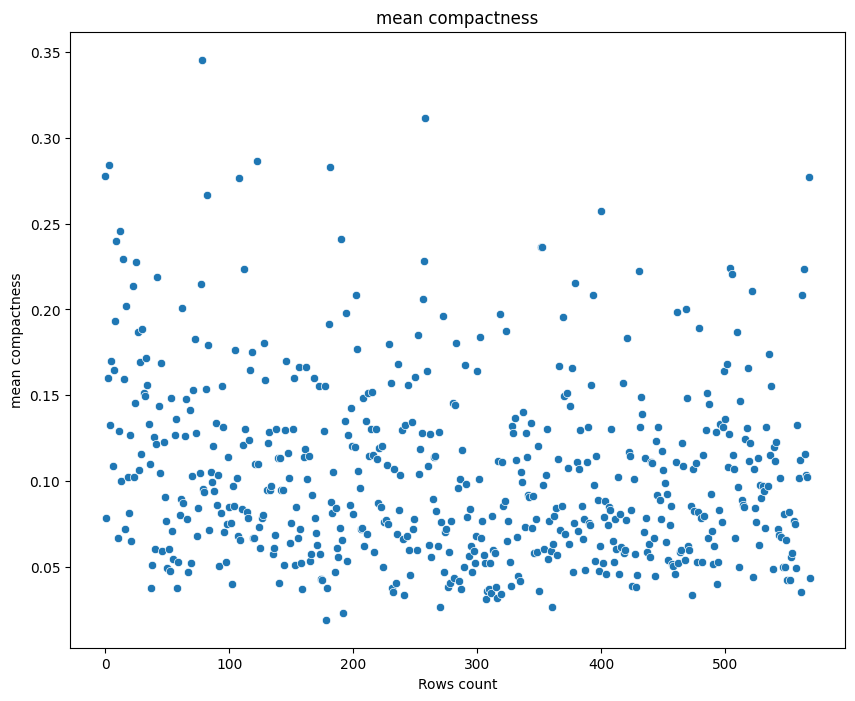

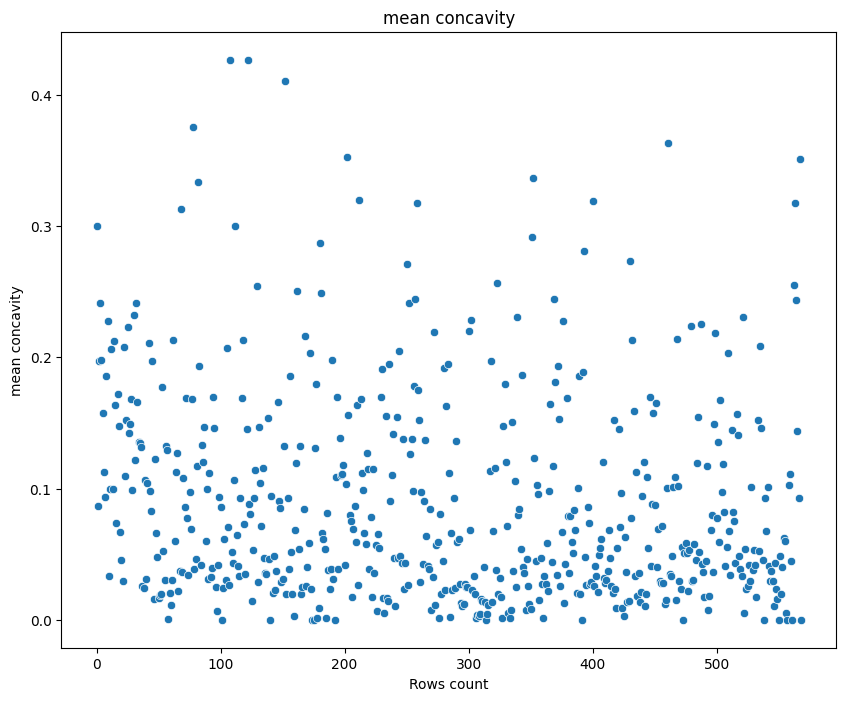

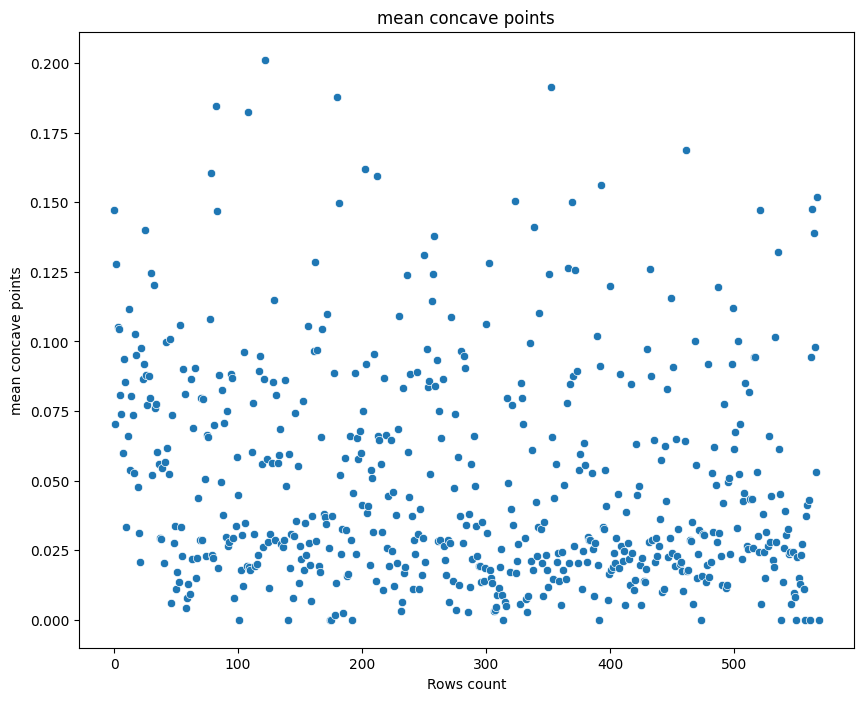

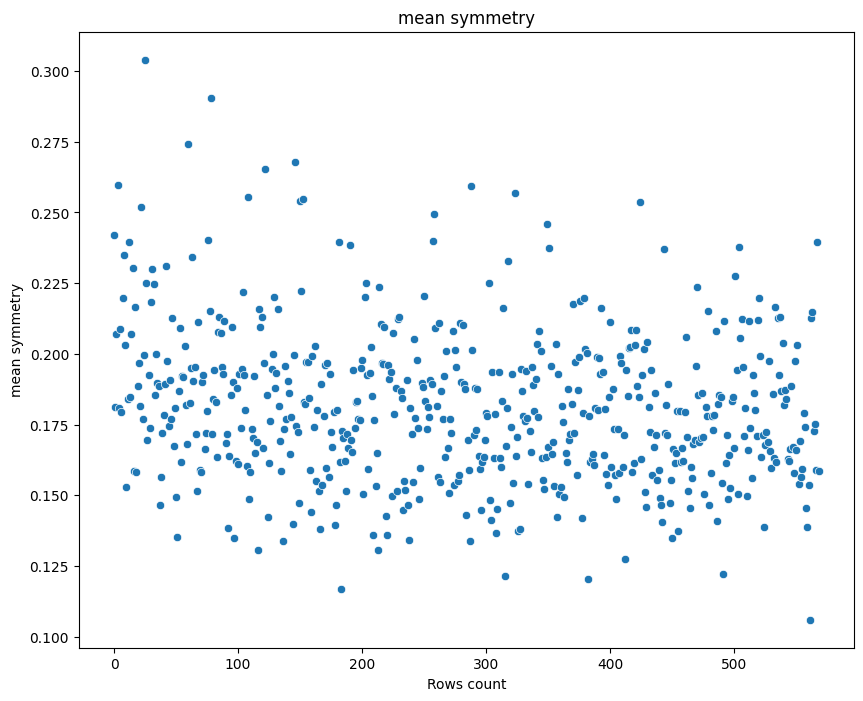

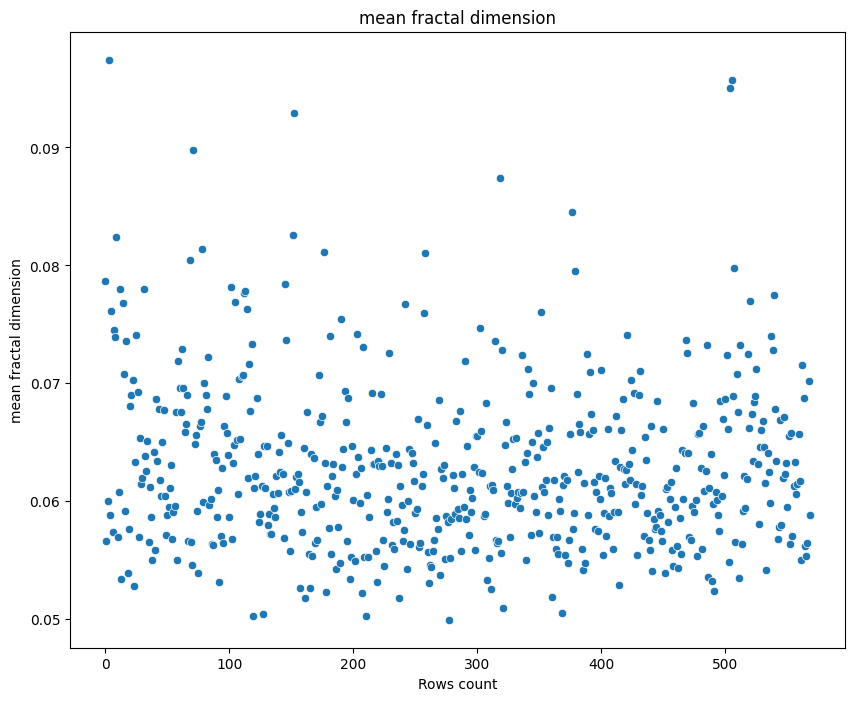

In [ ]:
for col in mean_data_column:
  fig=plt.figure(figsize=(10,8))
  ax=fig.gca()
  sns.scatterplot(x=range(cancer_df.shape[0]),y=cancer_df[col])
  plt.title(col)
  plt.xlabel('Rows count')

#### **scatter plot on a error data column**

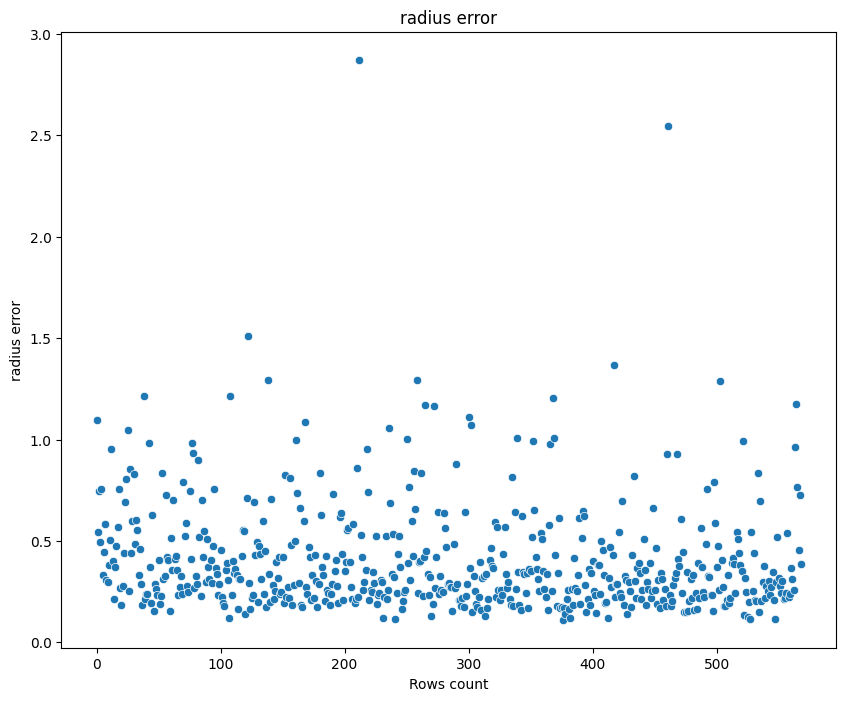

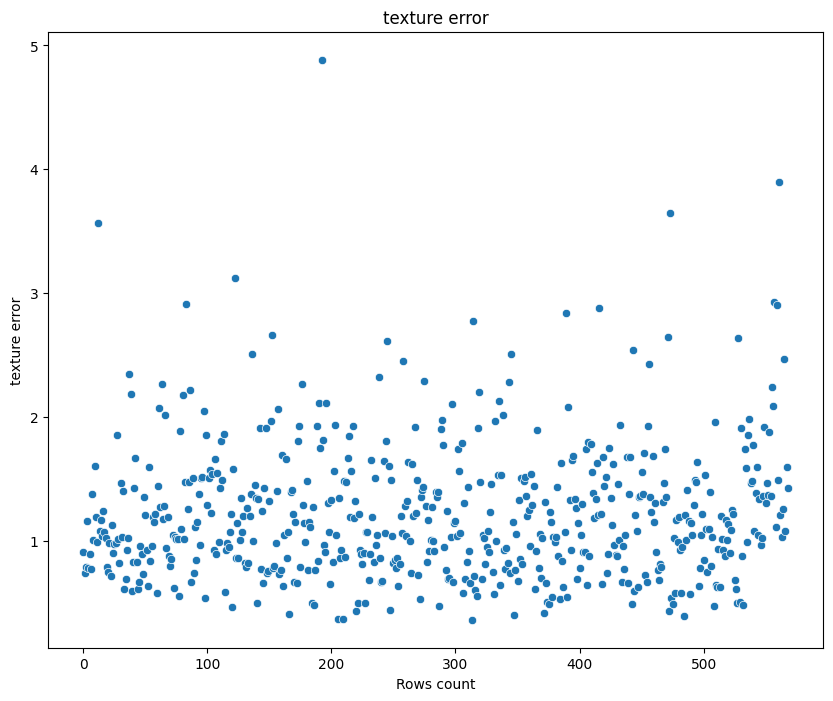

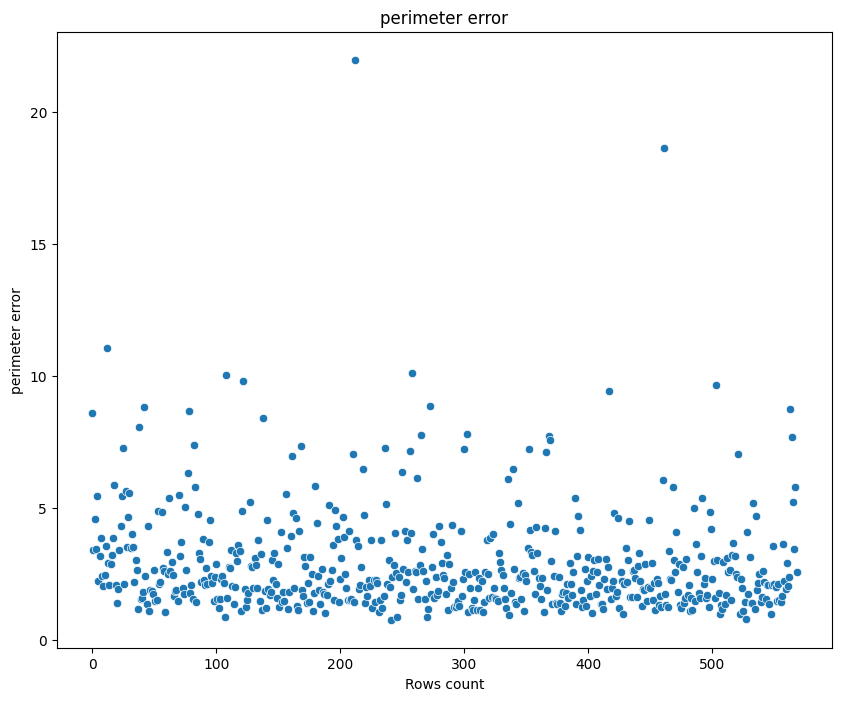

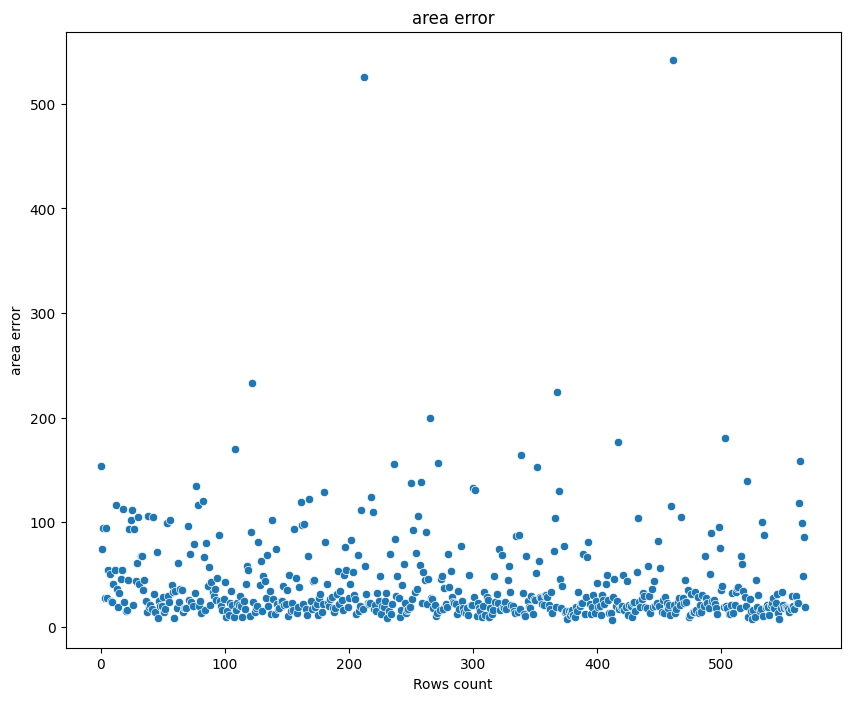

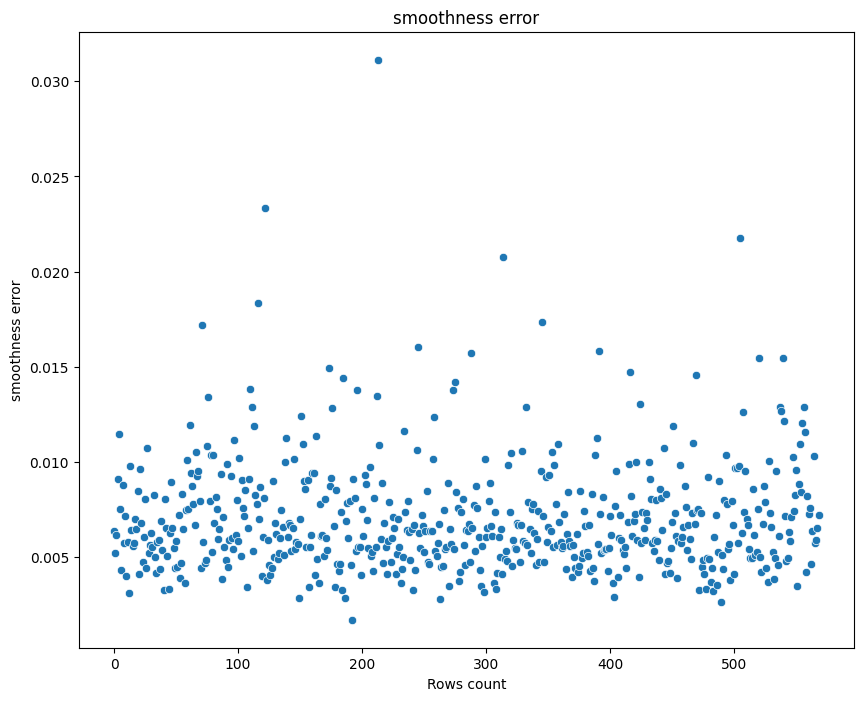

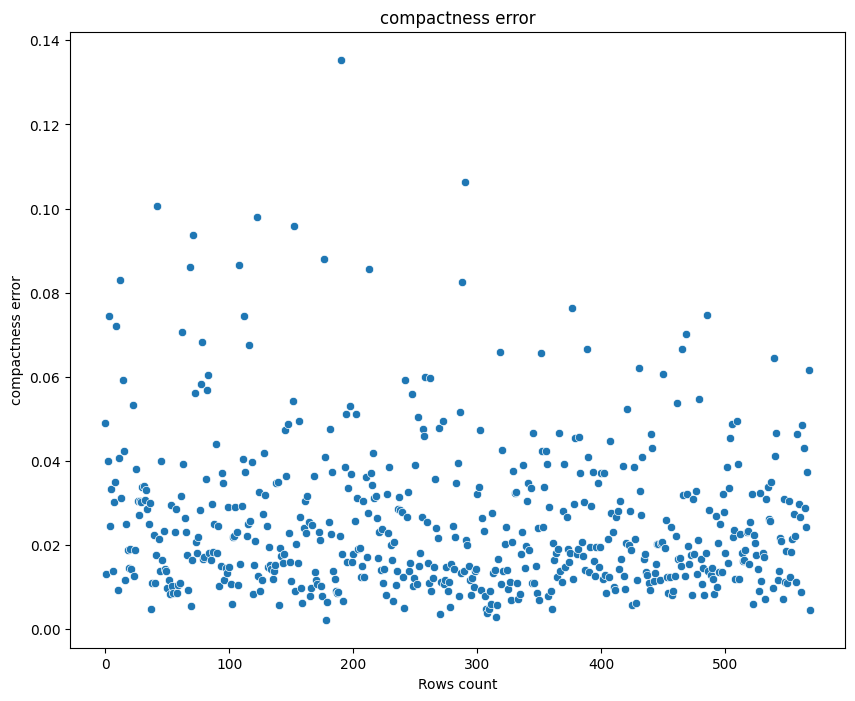

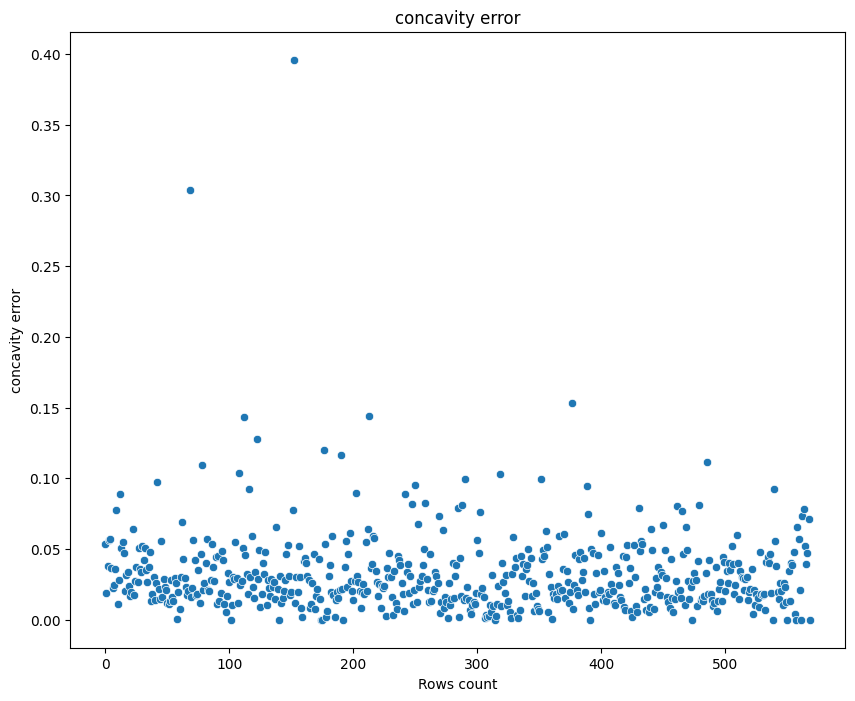

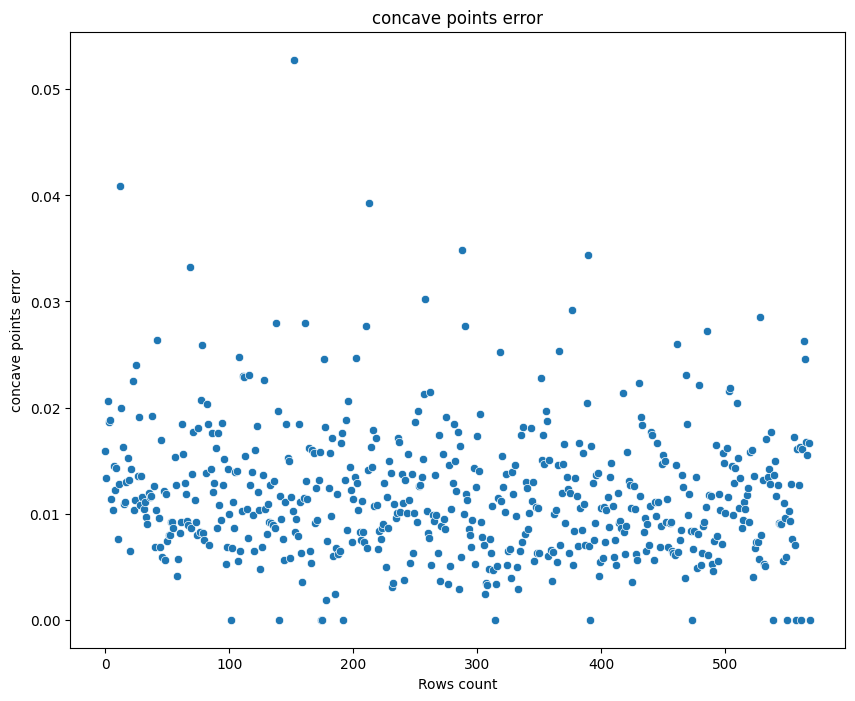

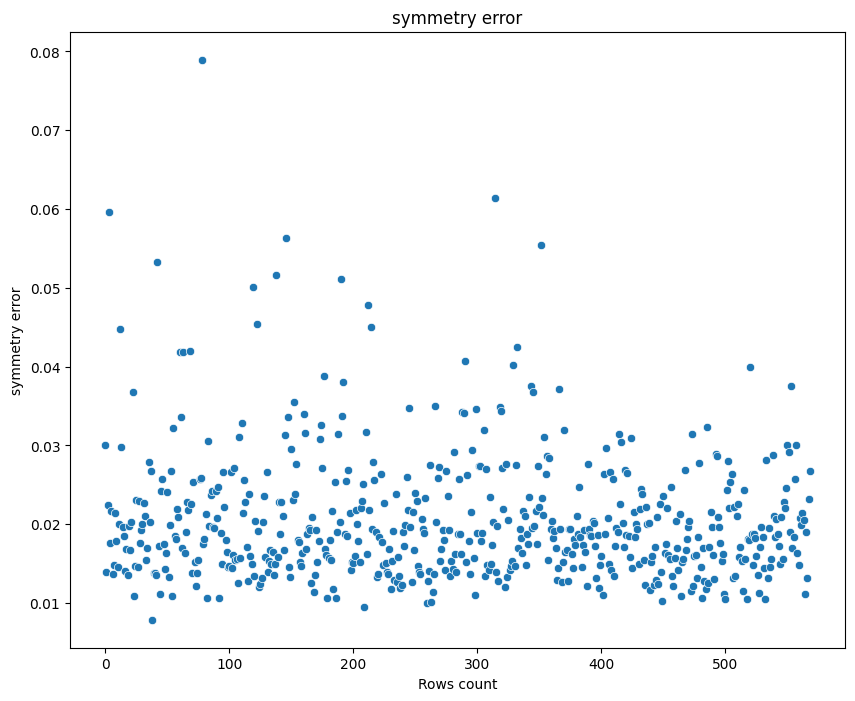

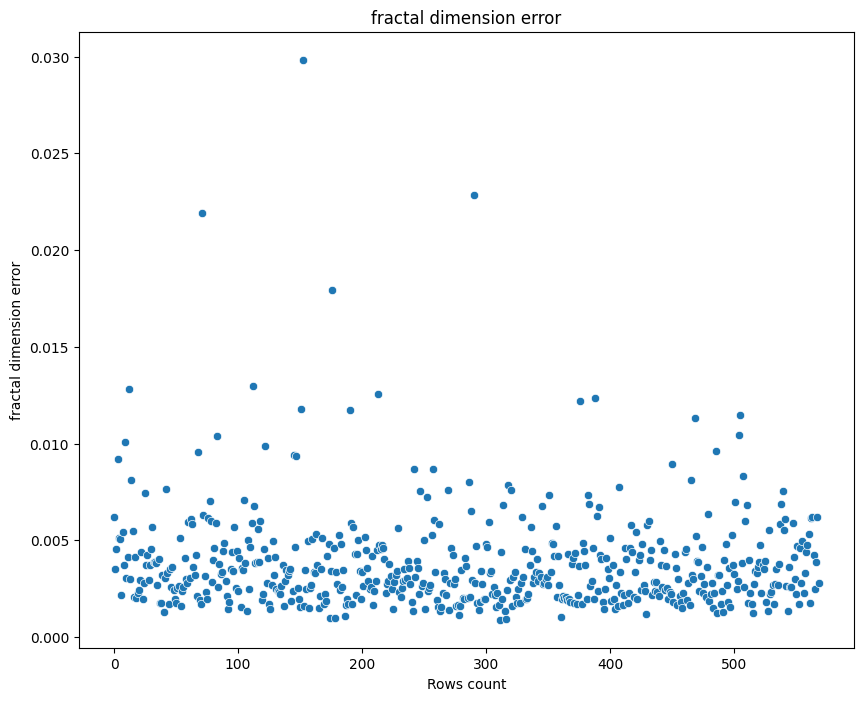

In [ ]:
for col in error_data_columns:
  fig=plt.figure(figsize=(10,8))
  ax=fig.gca()
  sns.scatterplot(x=range(cancer_df.shape[0]),y=cancer_df[col])
  plt.title(col)
  plt.xlabel('Rows count')

#### **scatter plot on a max limit columns**

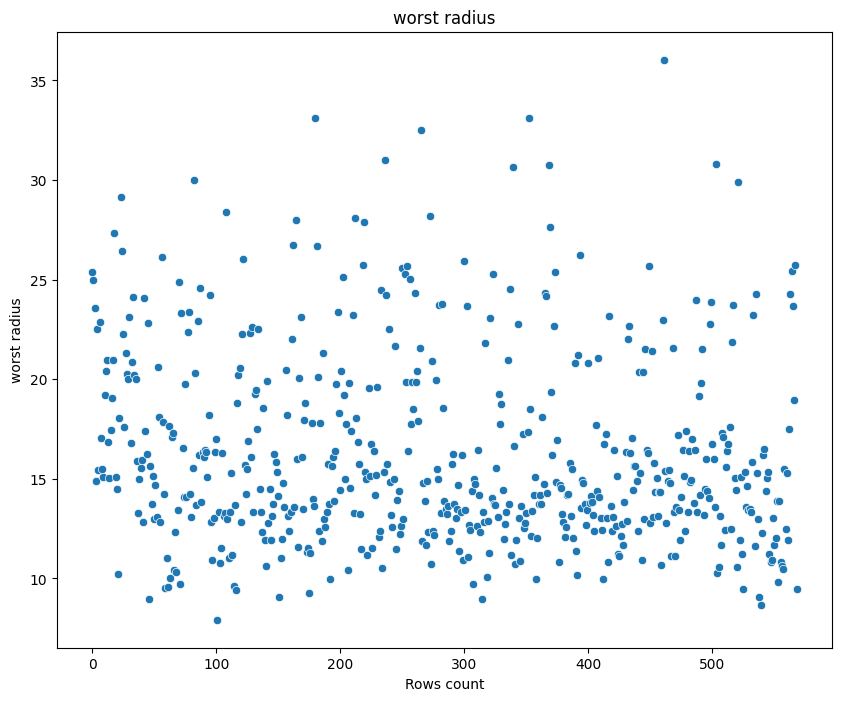

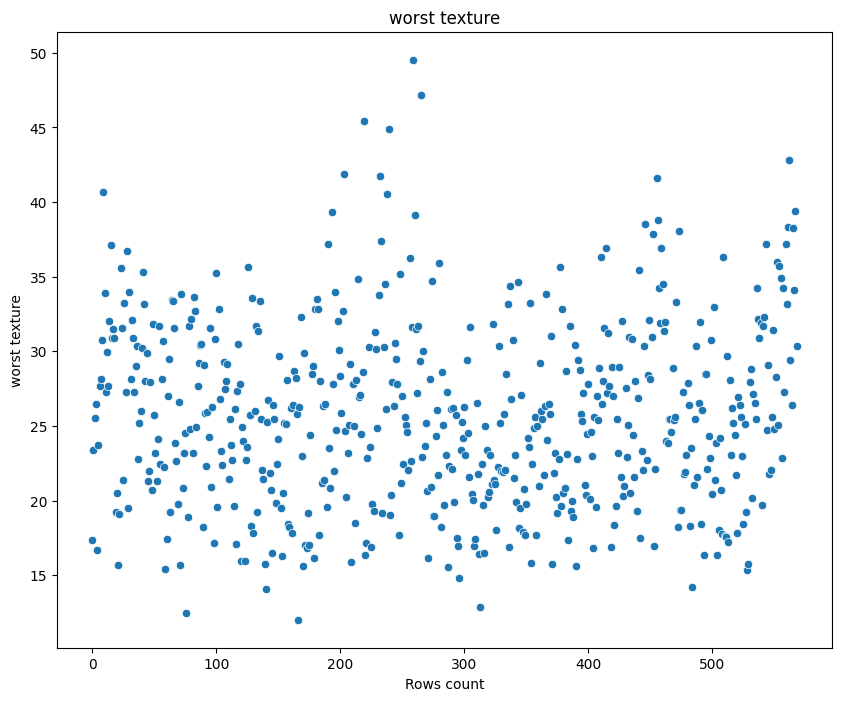

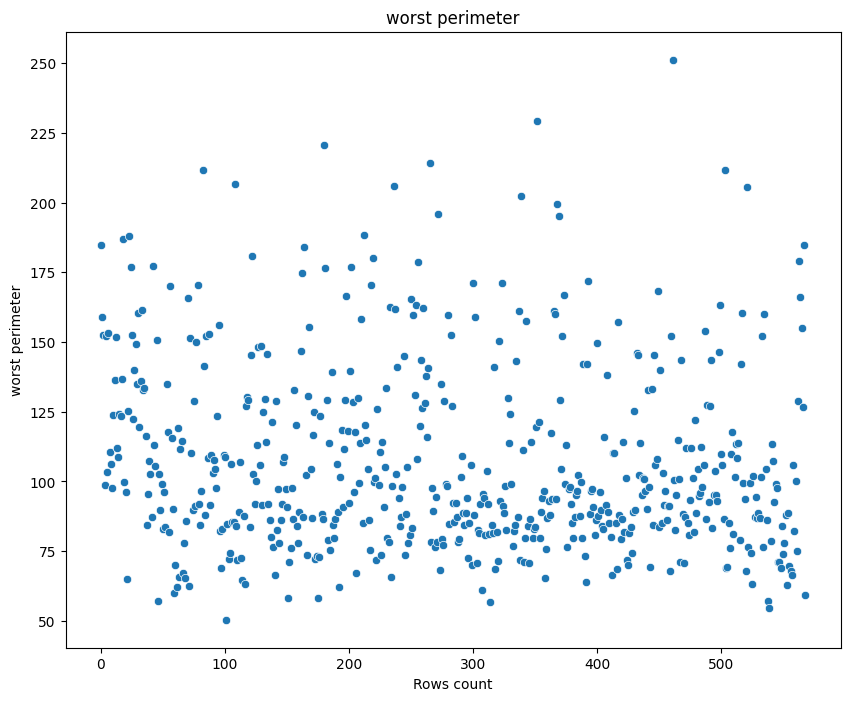

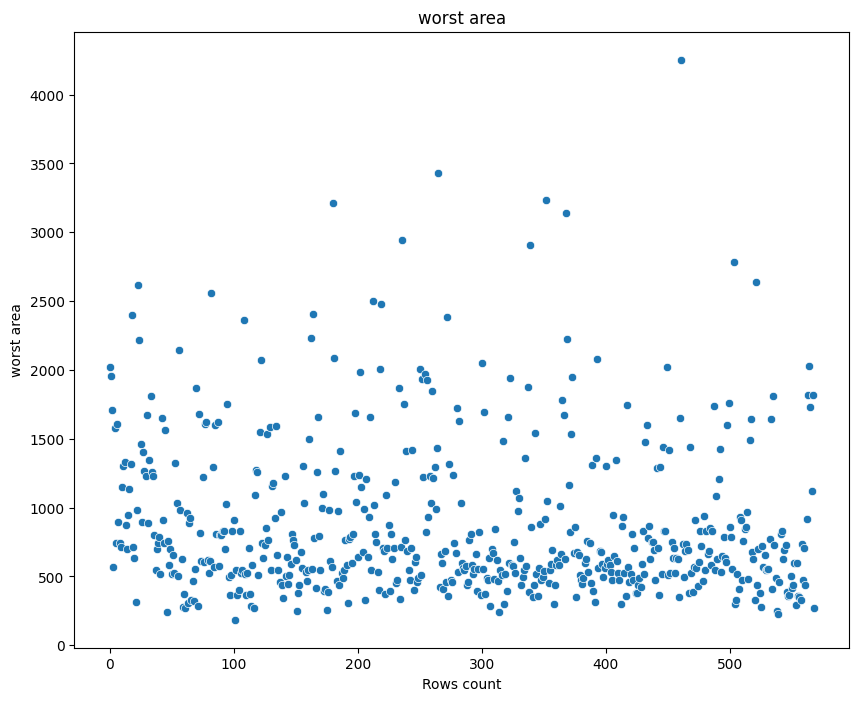

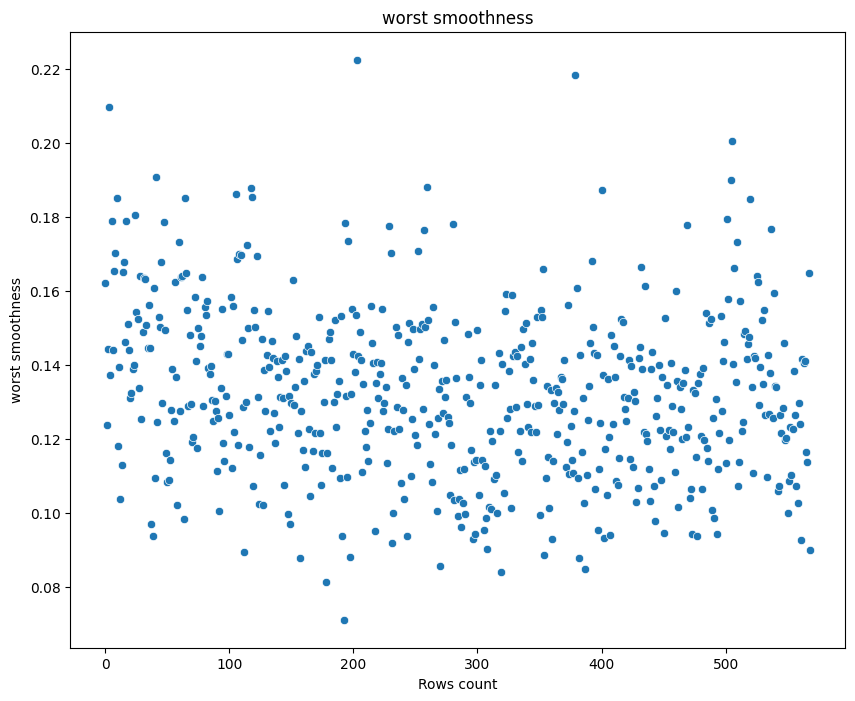

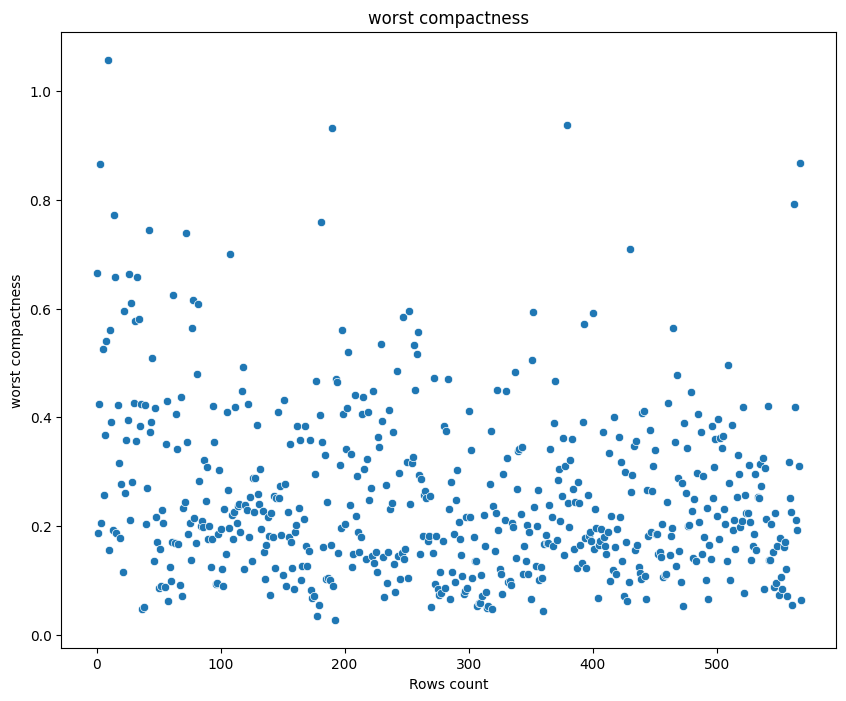

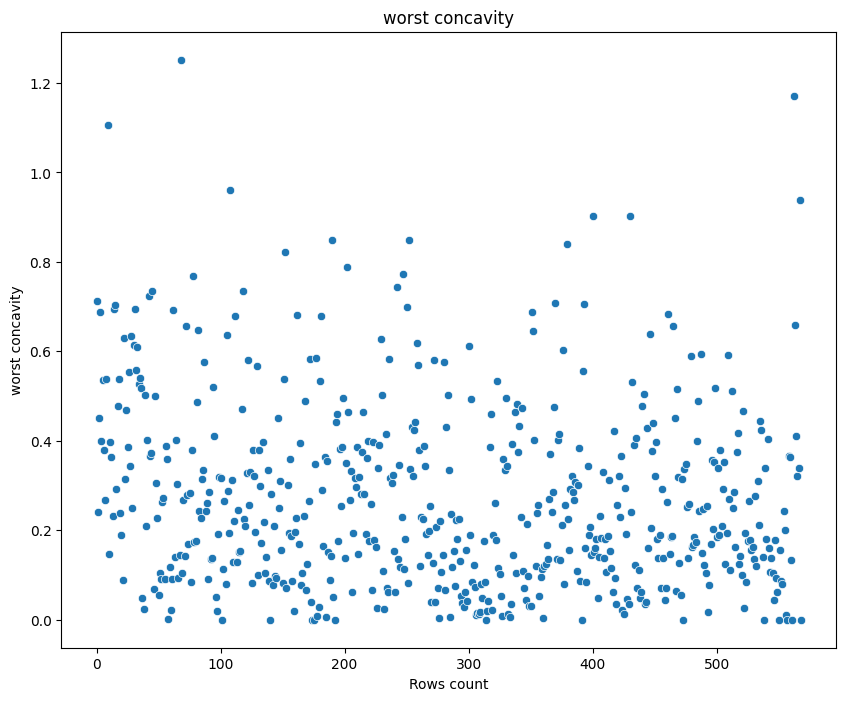

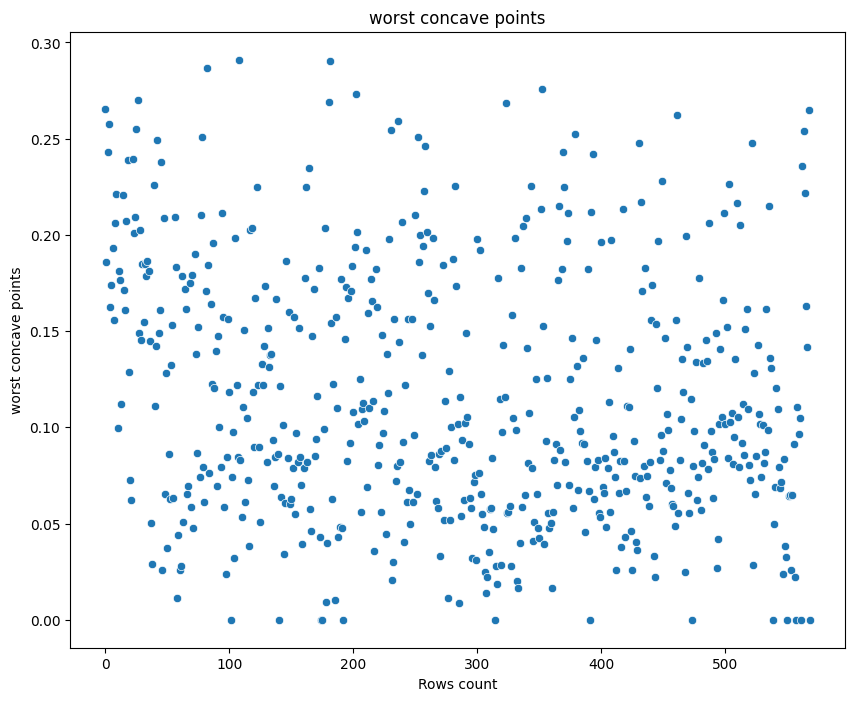

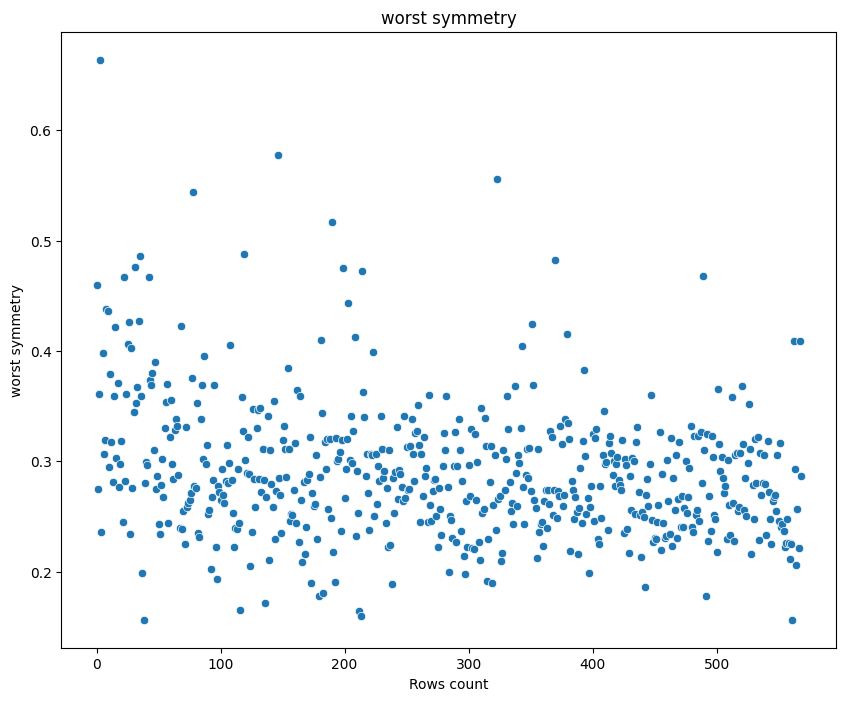

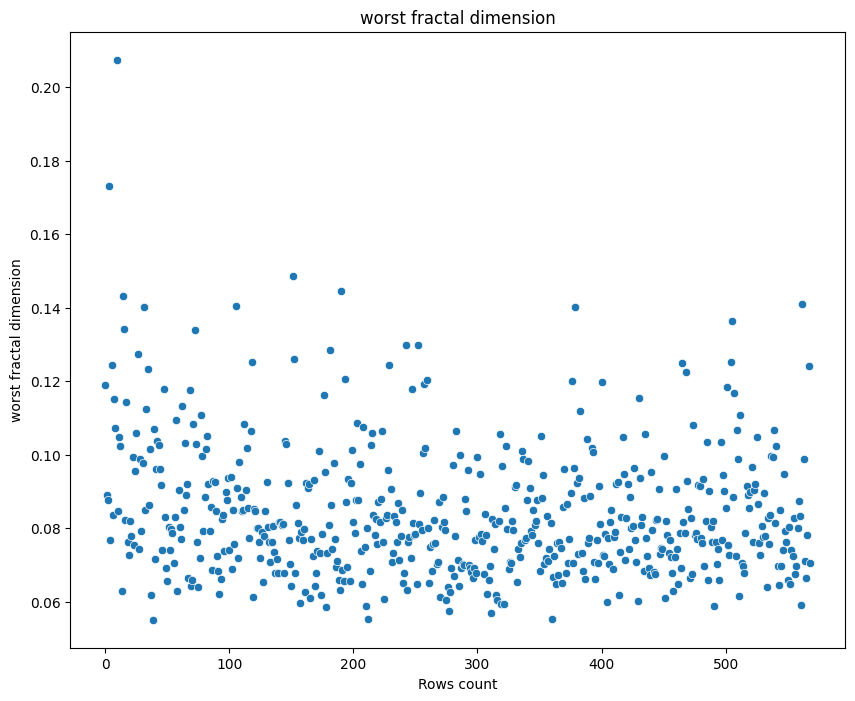

In [ ]:
for col in worst_or_max_limit_column:
  fig=plt.figure(figsize=(10,8))
  ax=fig.gca()
  sns.scatterplot(x=range(cancer_df.shape[0]),y=cancer_df[col])
  plt.title(col)
  plt.xlabel('Rows count')

#### **Statistical properties of a mean data columns**

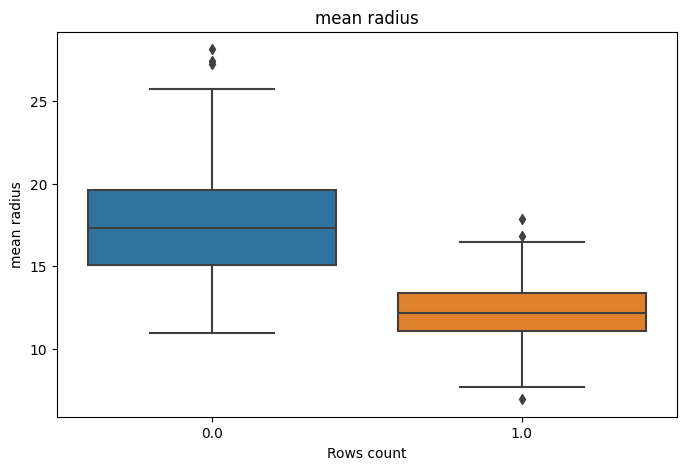

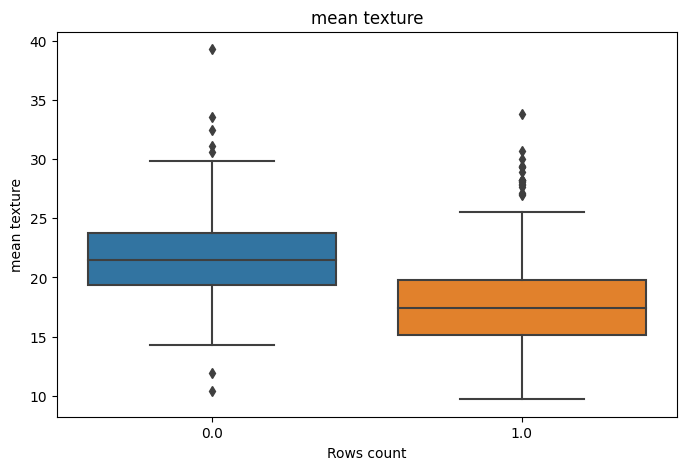

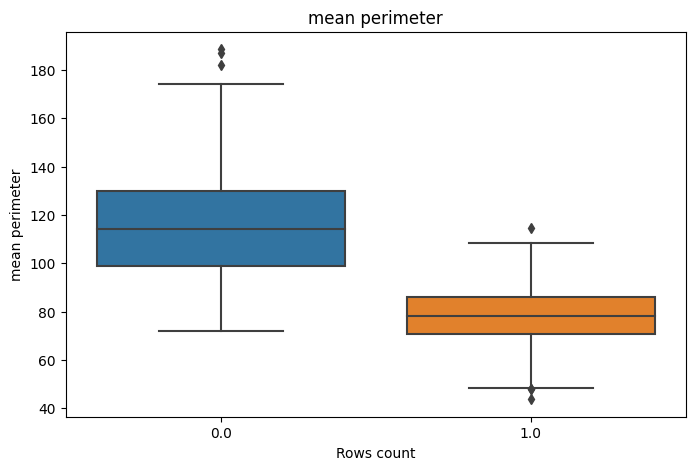

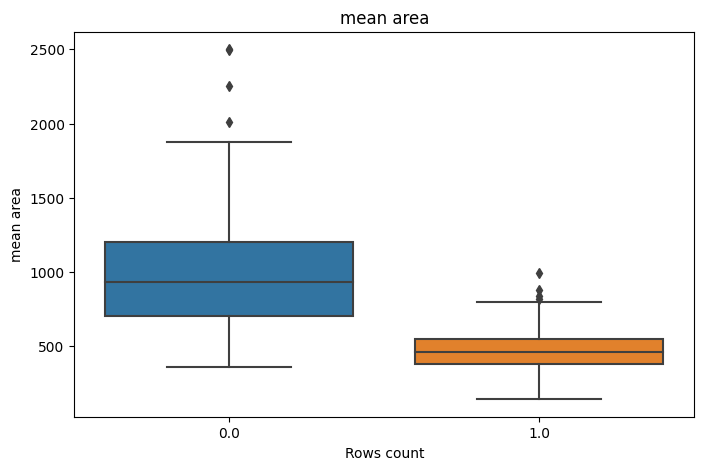

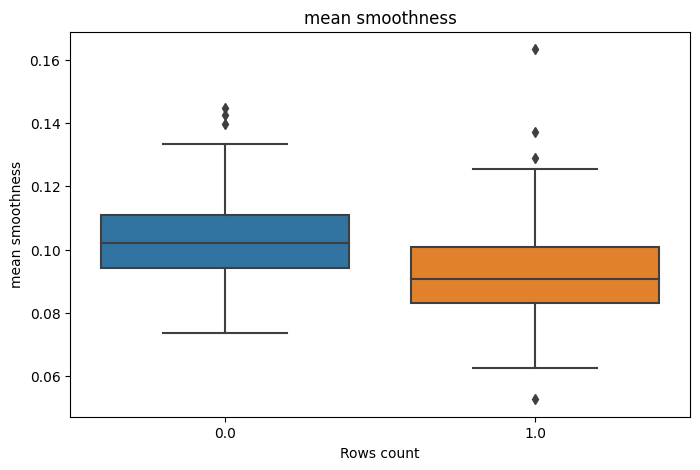

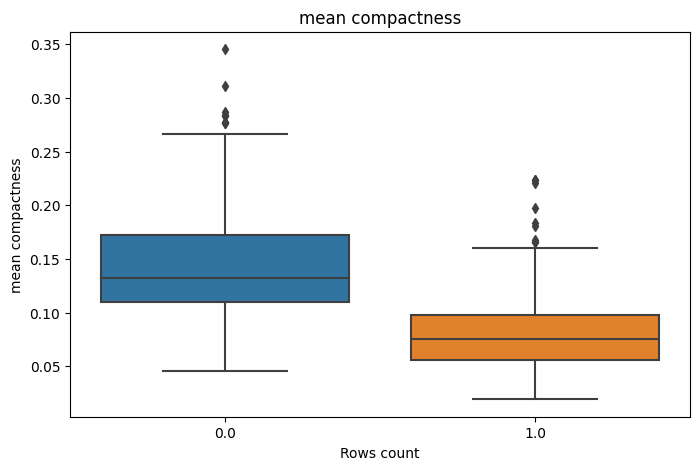

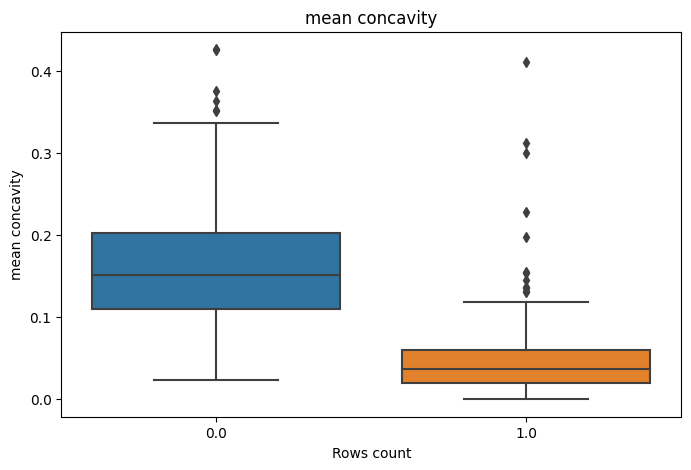

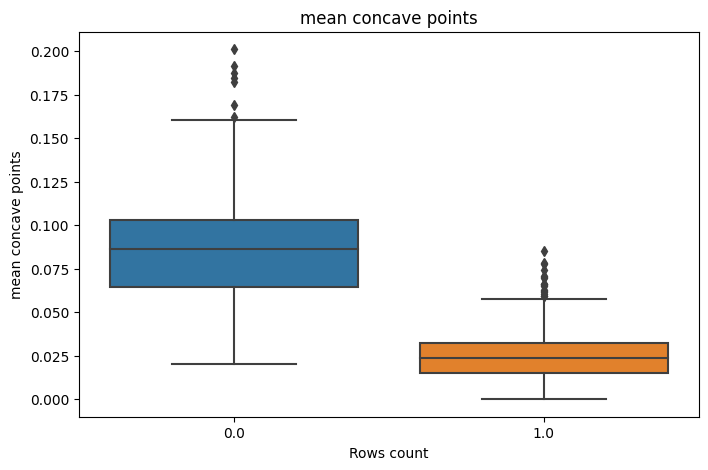

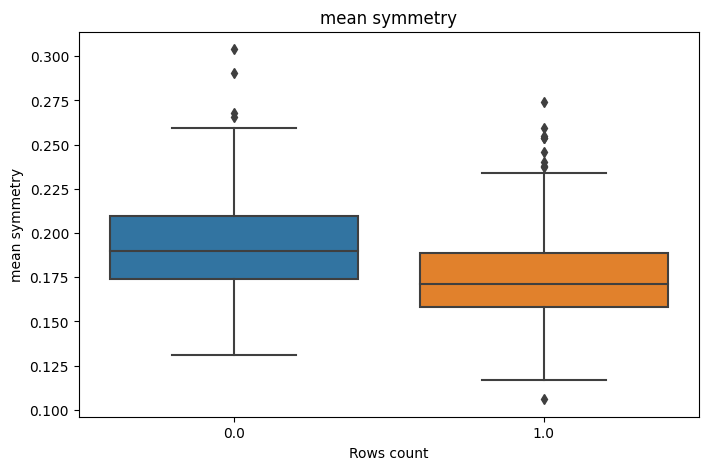

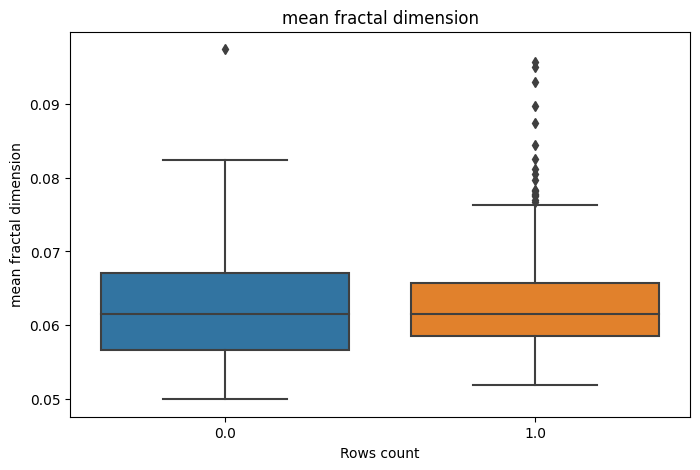

In [ ]:
for col in mean_data_column:
  fig=plt.figure(figsize=(8,5))
  ax=fig.gca()
  sns.boxplot(x=cancer_df['target'],y=cancer_df[col])
  plt.title(col)
  plt.xlabel('Rows count')

#### **statistical properties on a error data columns**

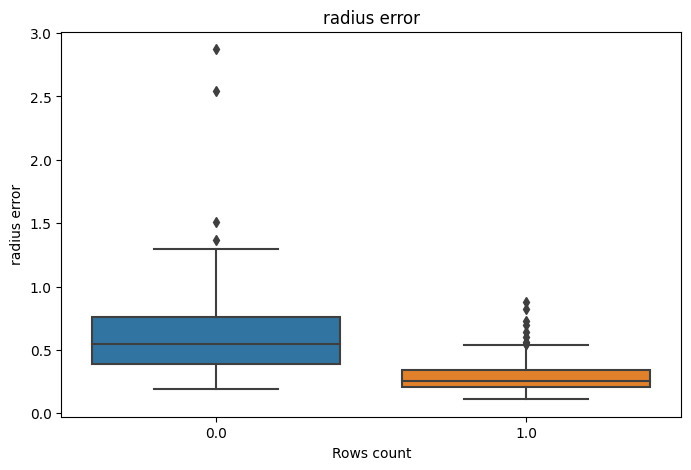

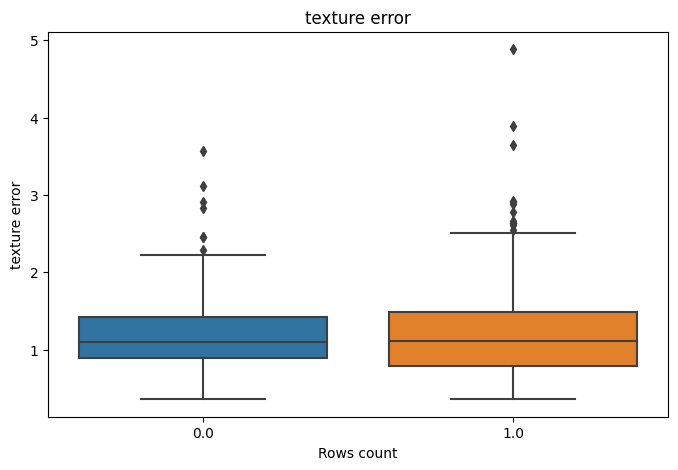

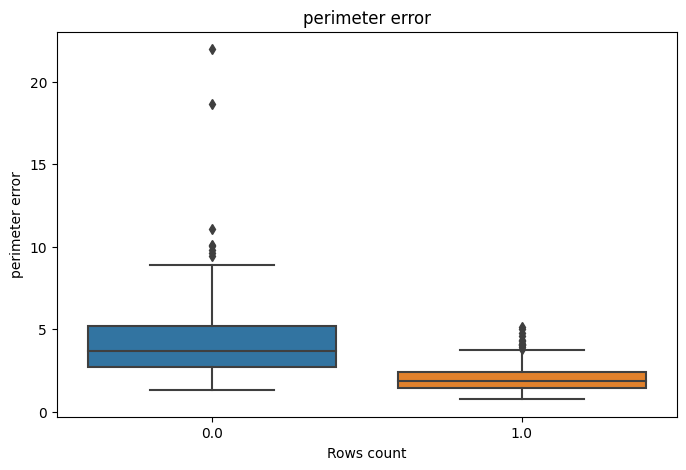

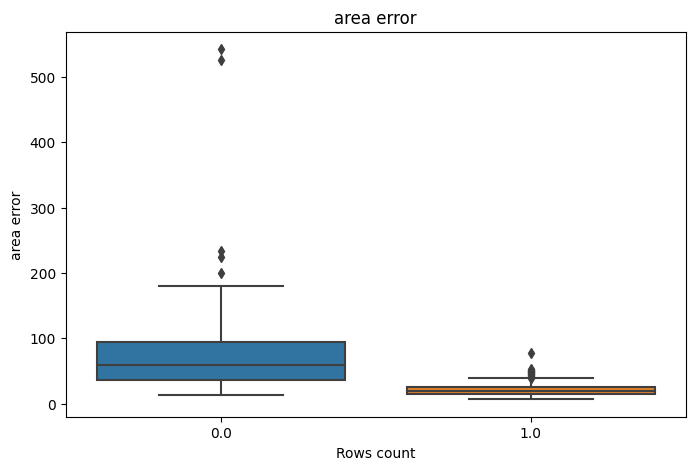

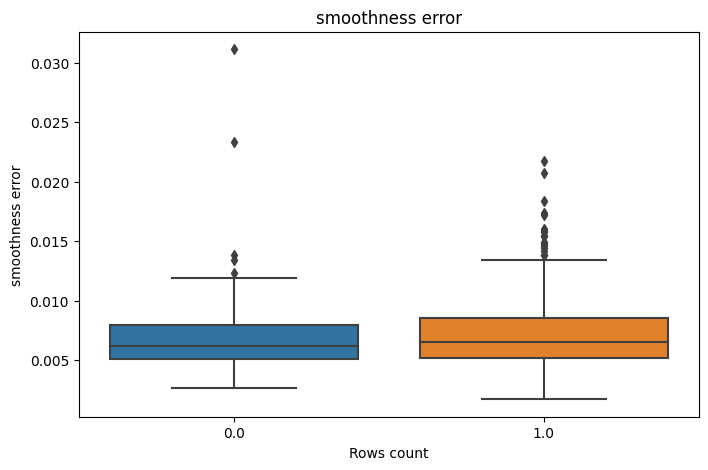

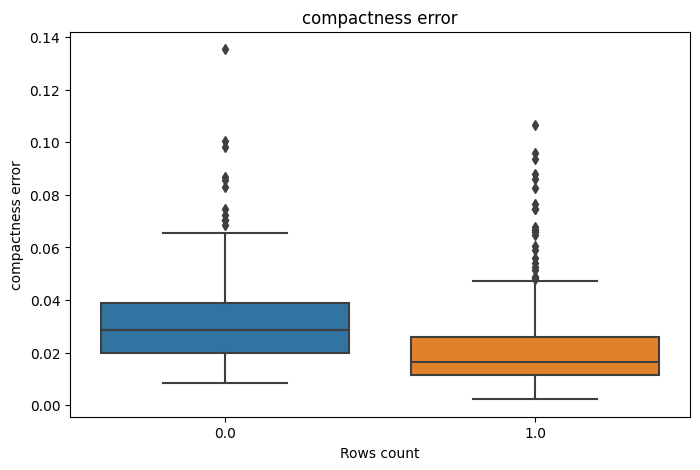

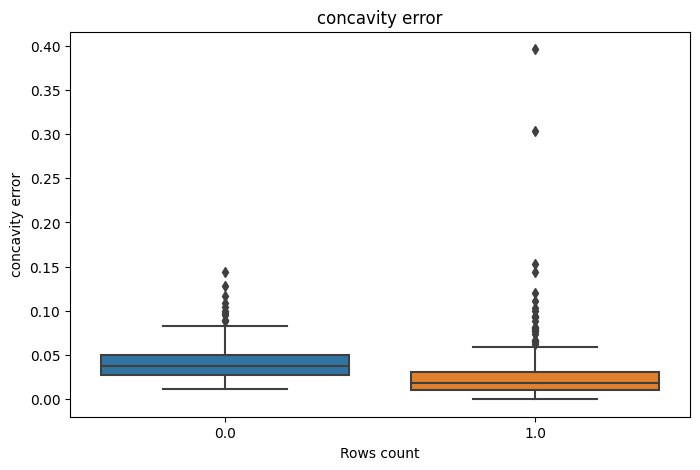

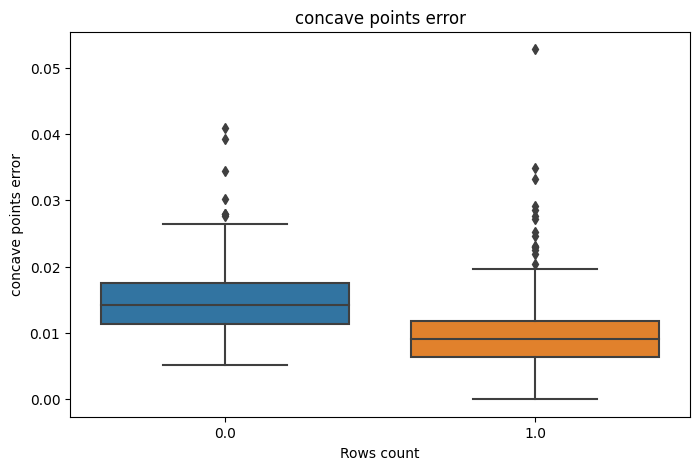

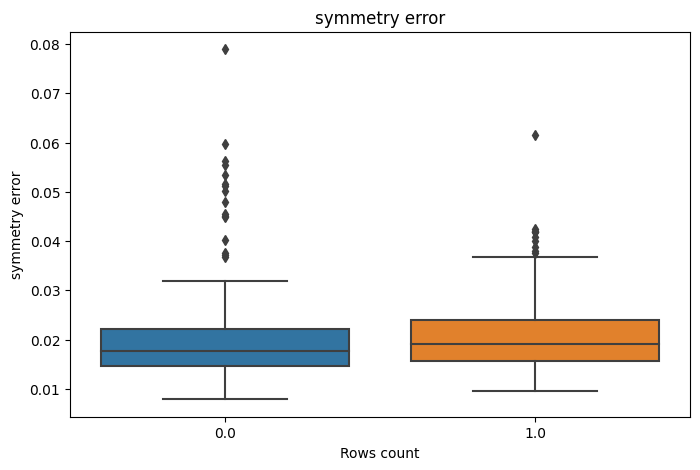

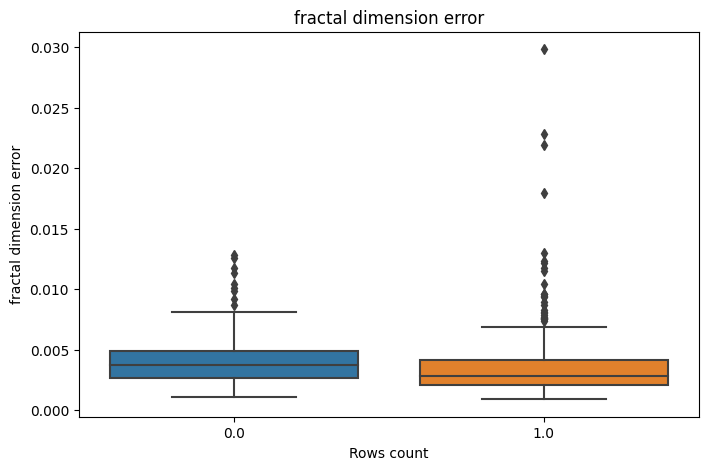

In [ ]:
for col in error_data_columns:
  fig=plt.figure(figsize=(8,5))
  ax=fig.gca()
  sns.boxplot(x=cancer_df['target'],y=cancer_df[col])
  plt.title(col)
  plt.xlabel('Rows count')

#### **Statistical properties on a max limit columns**

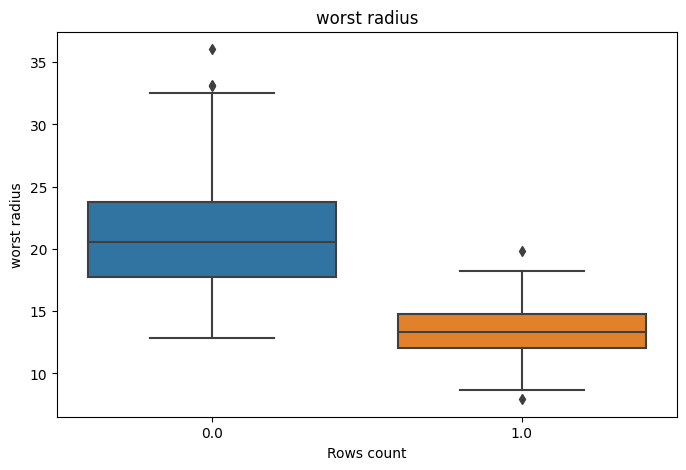

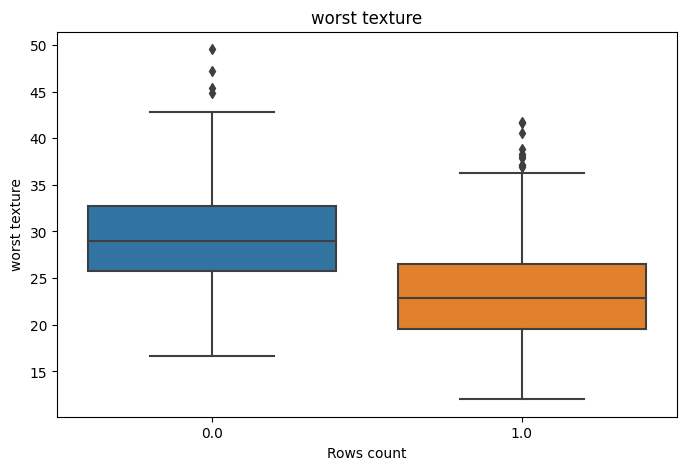

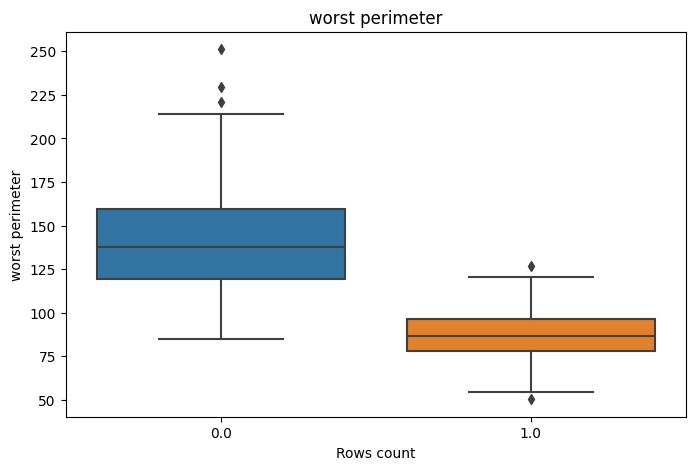

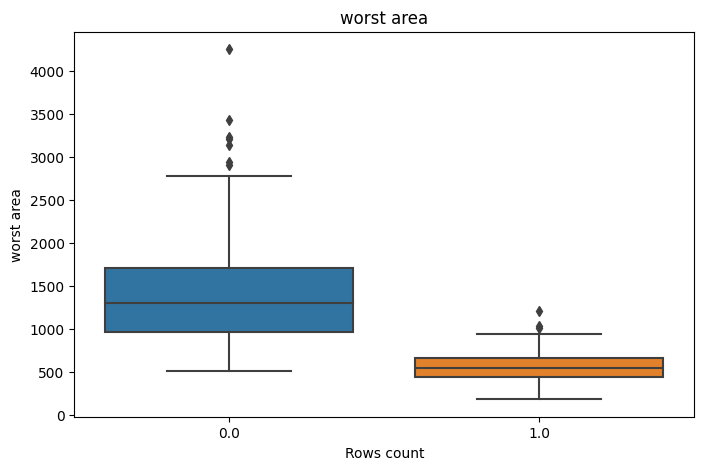

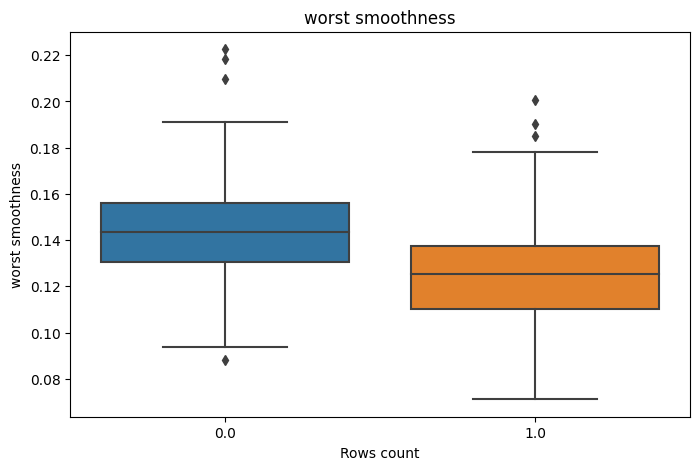

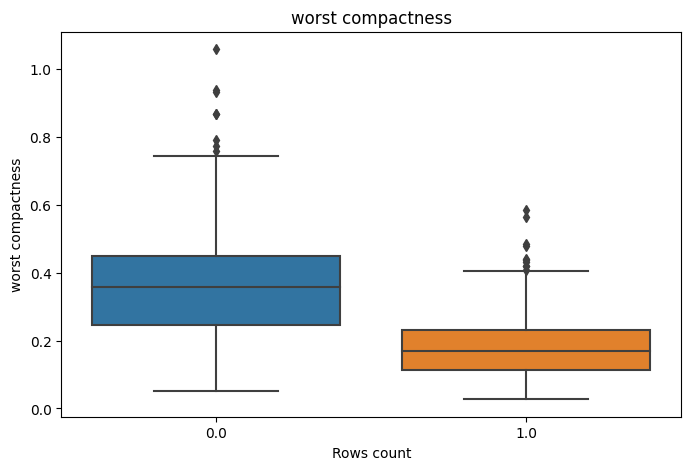

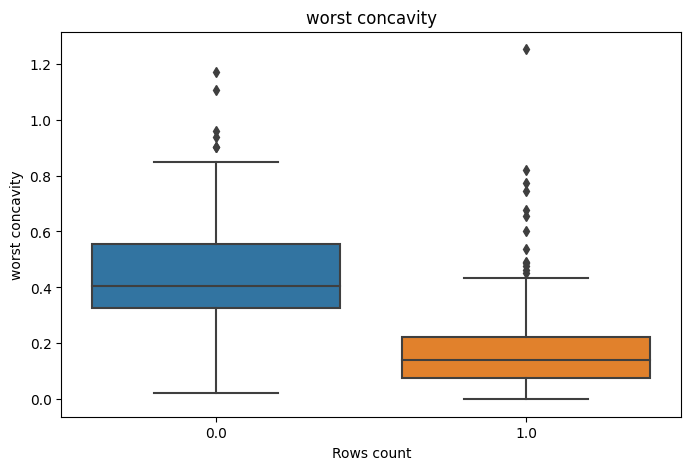

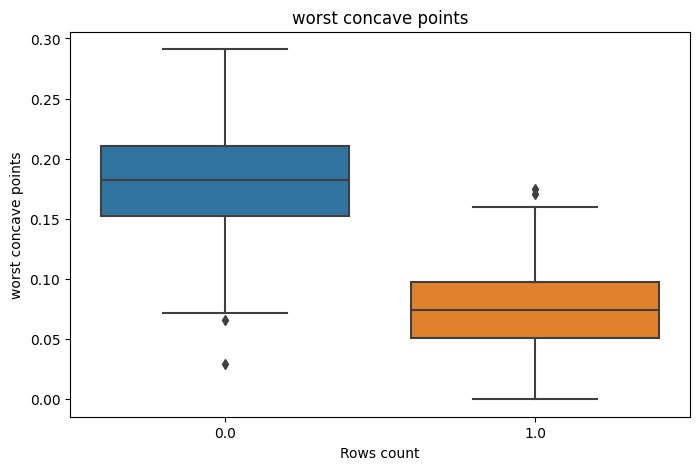

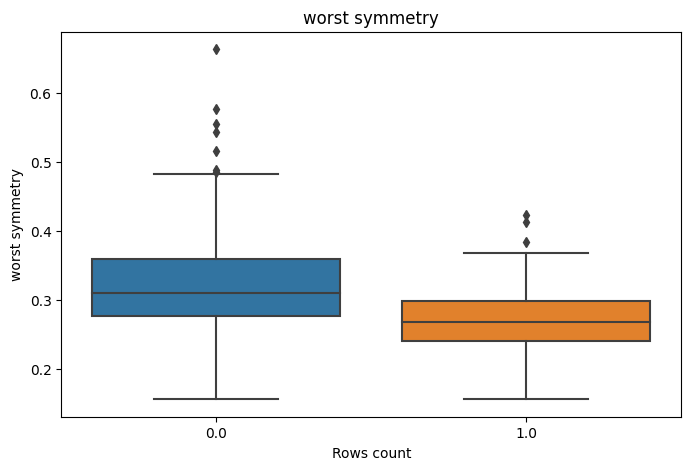

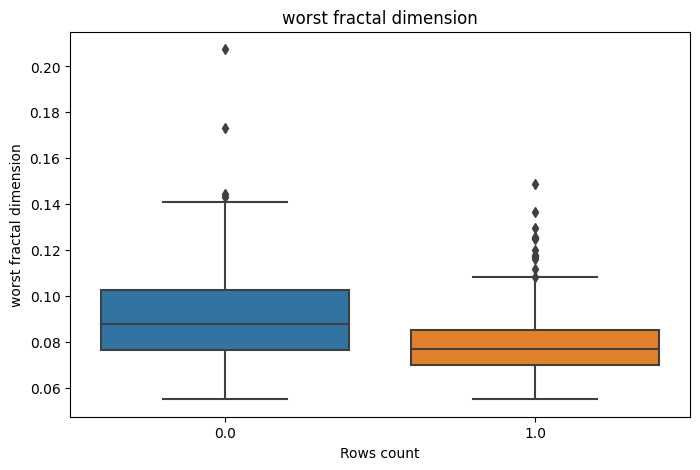

In [ ]:
for col in worst_or_max_limit_column:
  fig=plt.figure(figsize=(8,5))
  ax=fig.gca()
  sns.boxplot(x=cancer_df['target'],y=cancer_df[col])
  plt.title(col)
  plt.xlabel('Rows count')

#### **Correlation Heatmap**

<Axes: >

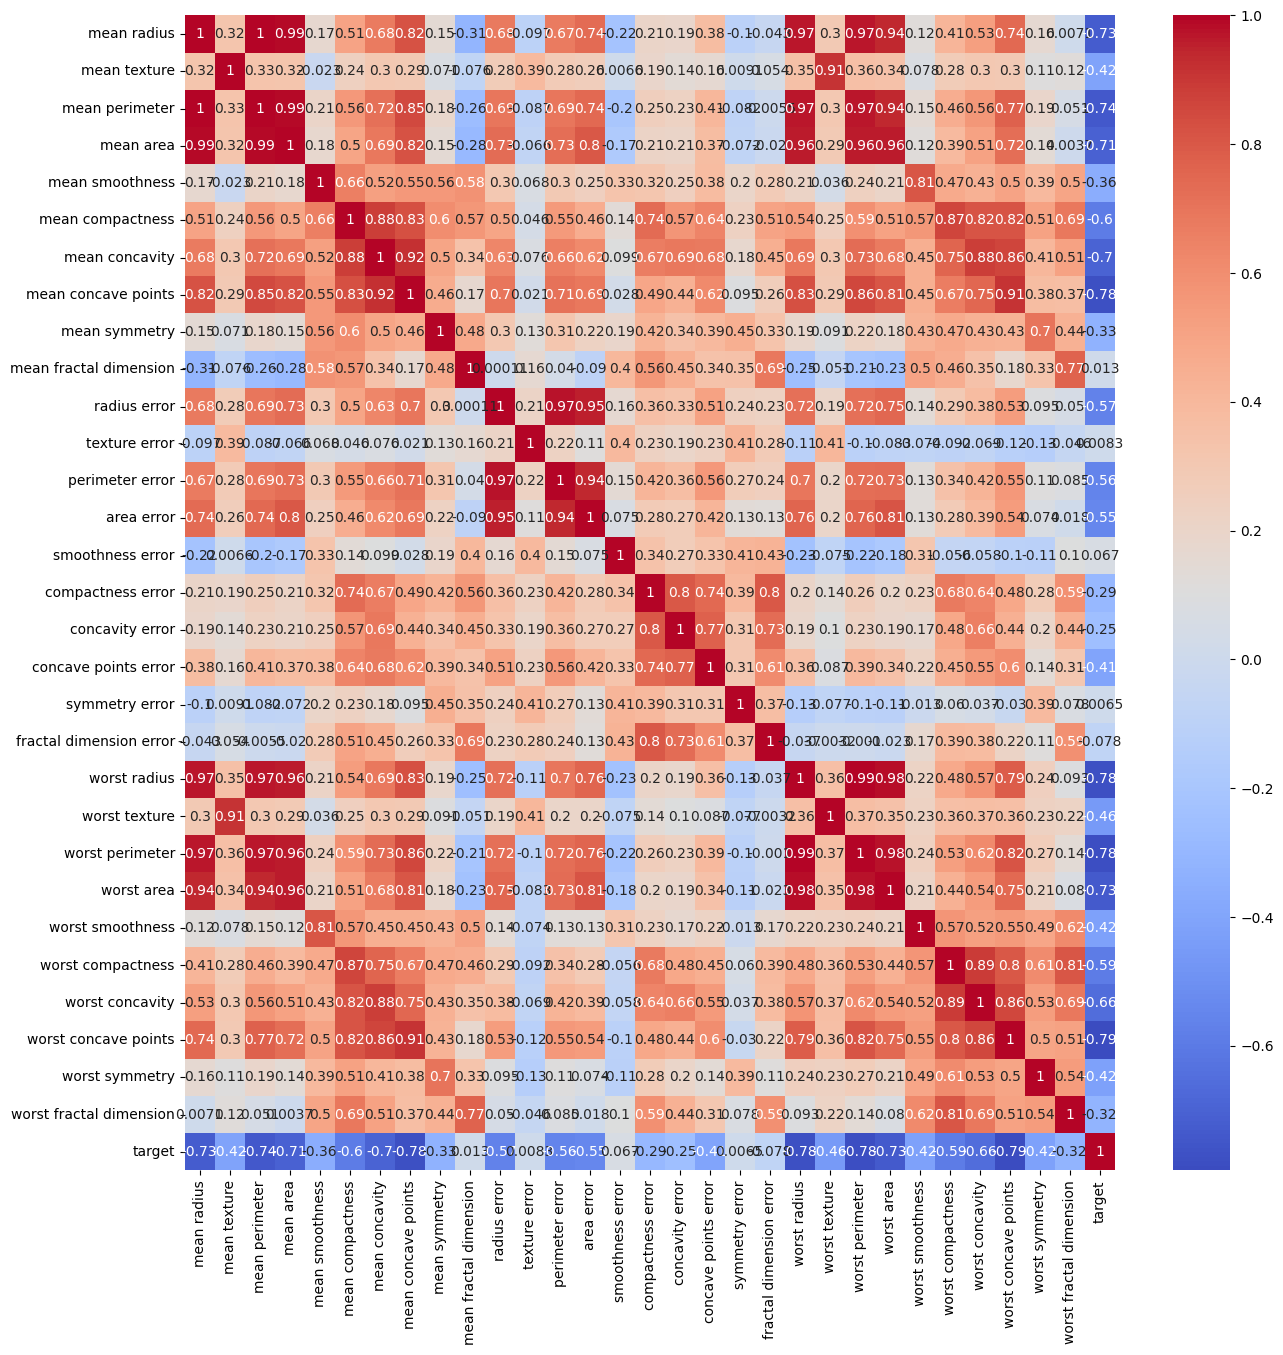

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,15))
corr=cancer_df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)

## ***. Feature Engineering & Data Pre-processing***

### . Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
null_count=cancer_df.isnull().sum()
null_count

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

**There is no missing values in our dataset**

### . Handling Outliers

In [ ]:
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [ ]:
outliers_columns=[col for col in columns if col not in 'target' ]
outliers_columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

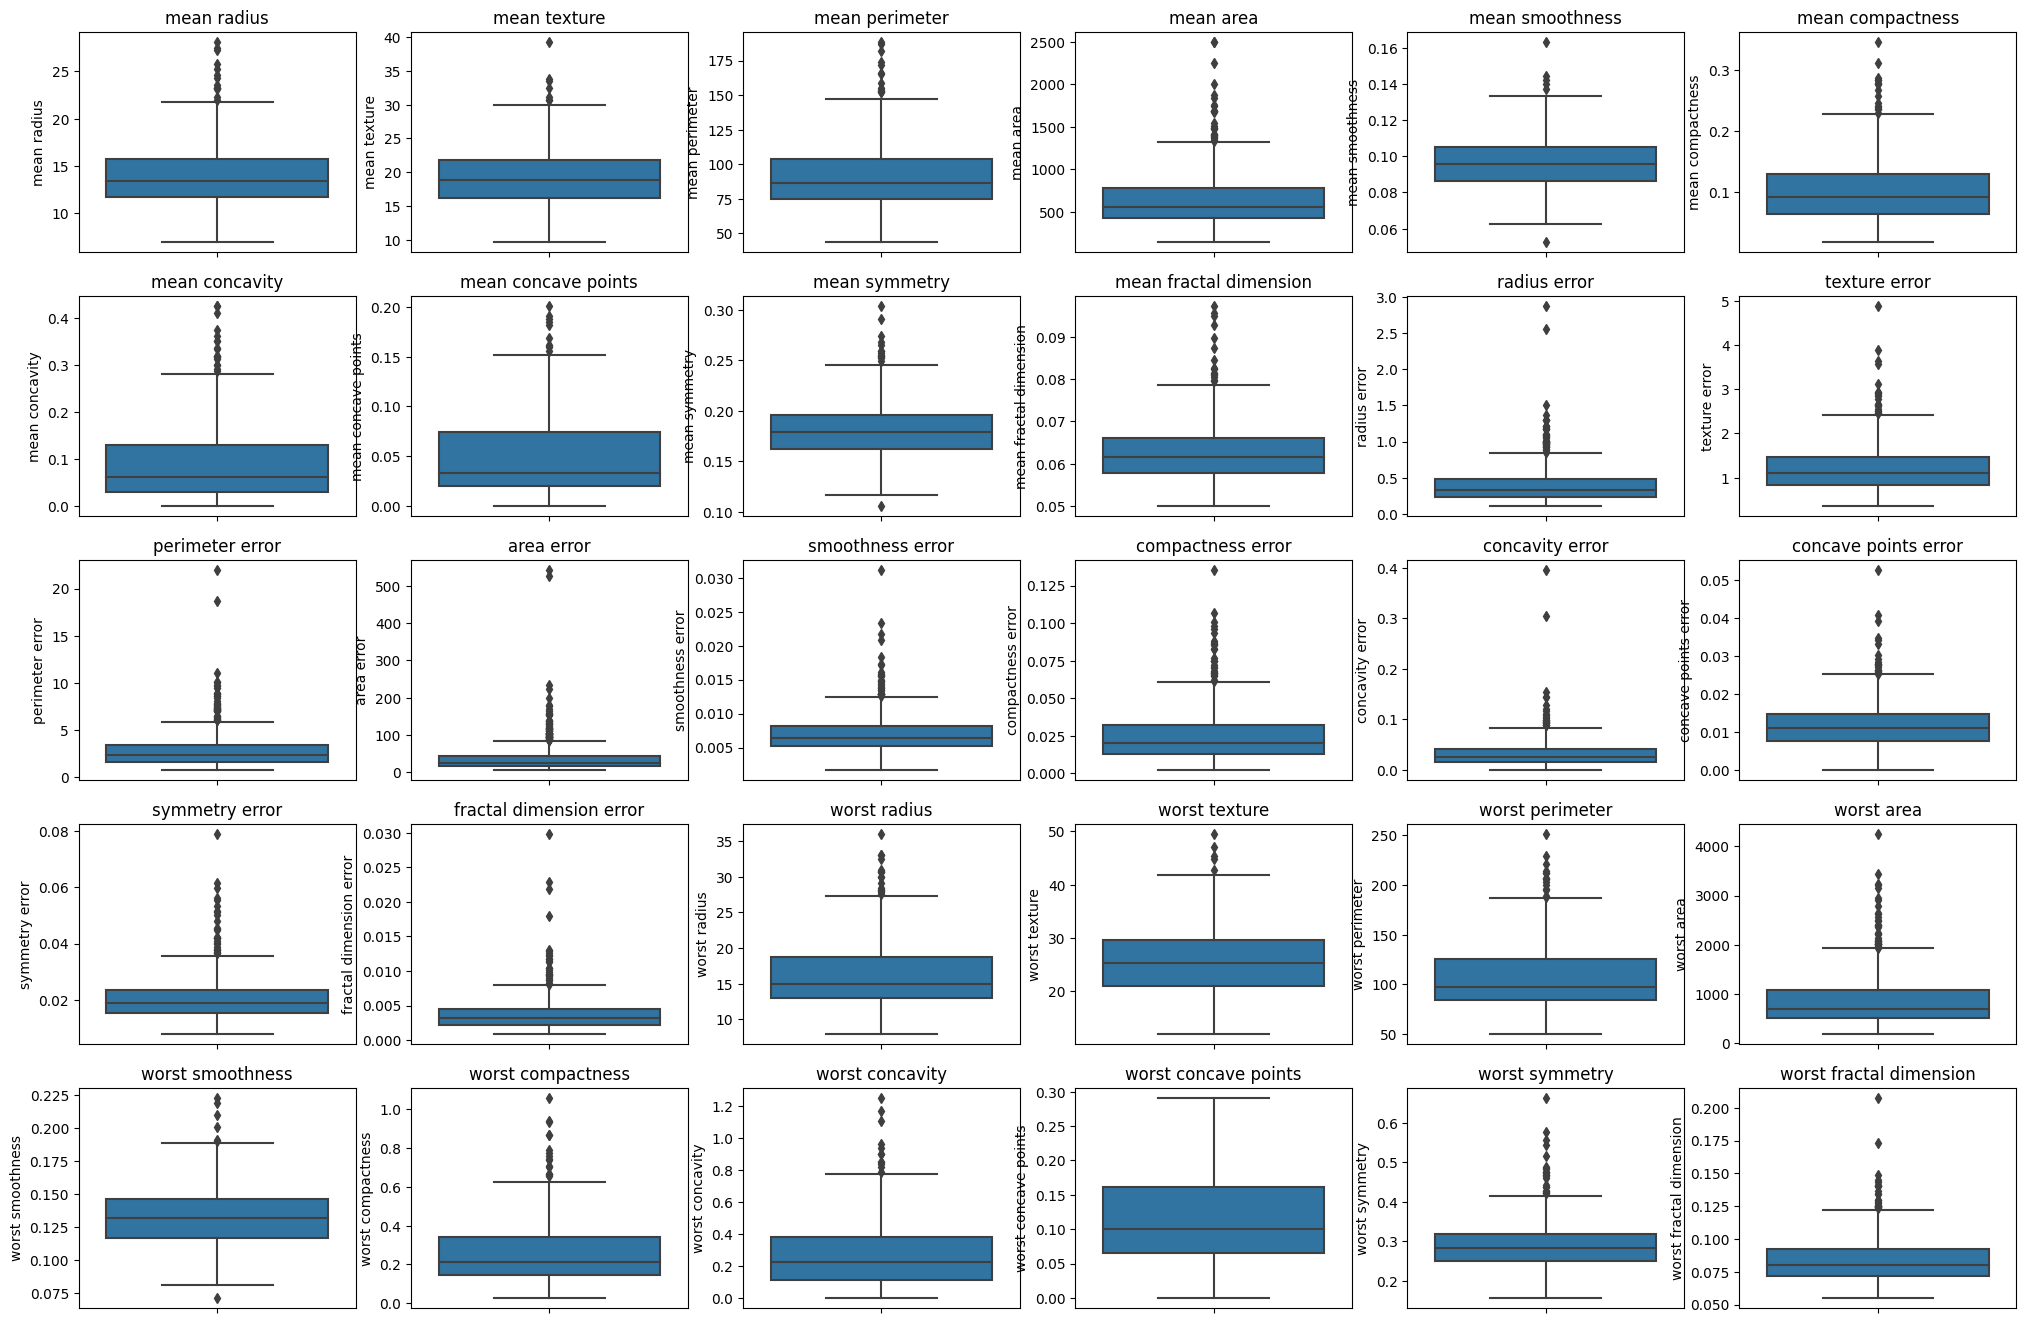

In [ ]:
plt.figure(figsize=(25,20))
for index,item in enumerate(outliers_columns):
  plt.subplot(6,6,index+1)
  sns.boxplot(y=cancer_df[item])
  plt.title(item)

In [ ]:
q1=cancer_df[outliers_columns].quantile(0.25)
q3=cancer_df[outliers_columns].quantile(0.75)
iqr=q3-q1
iqr

mean radius                  4.080000
mean texture                 5.630000
mean perimeter              28.930000
mean area                  362.400000
mean smoothness              0.018930
mean compactness             0.065480
mean concavity               0.101140
mean concave points          0.053690
mean symmetry                0.033800
mean fractal dimension       0.008420
radius error                 0.246500
texture error                0.640100
perimeter error              1.751000
area error                  27.340000
smoothness error             0.002977
compactness error            0.019370
concavity error              0.026960
concave points error         0.007072
symmetry error               0.008320
fractal dimension error      0.002310
worst radius                 5.780000
worst texture                8.640000
worst perimeter             41.290000
worst area                 568.700000
worst smoothness             0.029400
worst compactness            0.191900
worst concav

In [ ]:
lower_boundry=q1-1.5*(iqr)
upper_boundry=q3+1.5*(iqr)

In [ ]:
cancer_df[outliers_columns]=cancer_df[outliers_columns][~((cancer_df[outliers_columns]<lower_boundry)|(cancer_df[outliers_columns]>upper_boundry))]

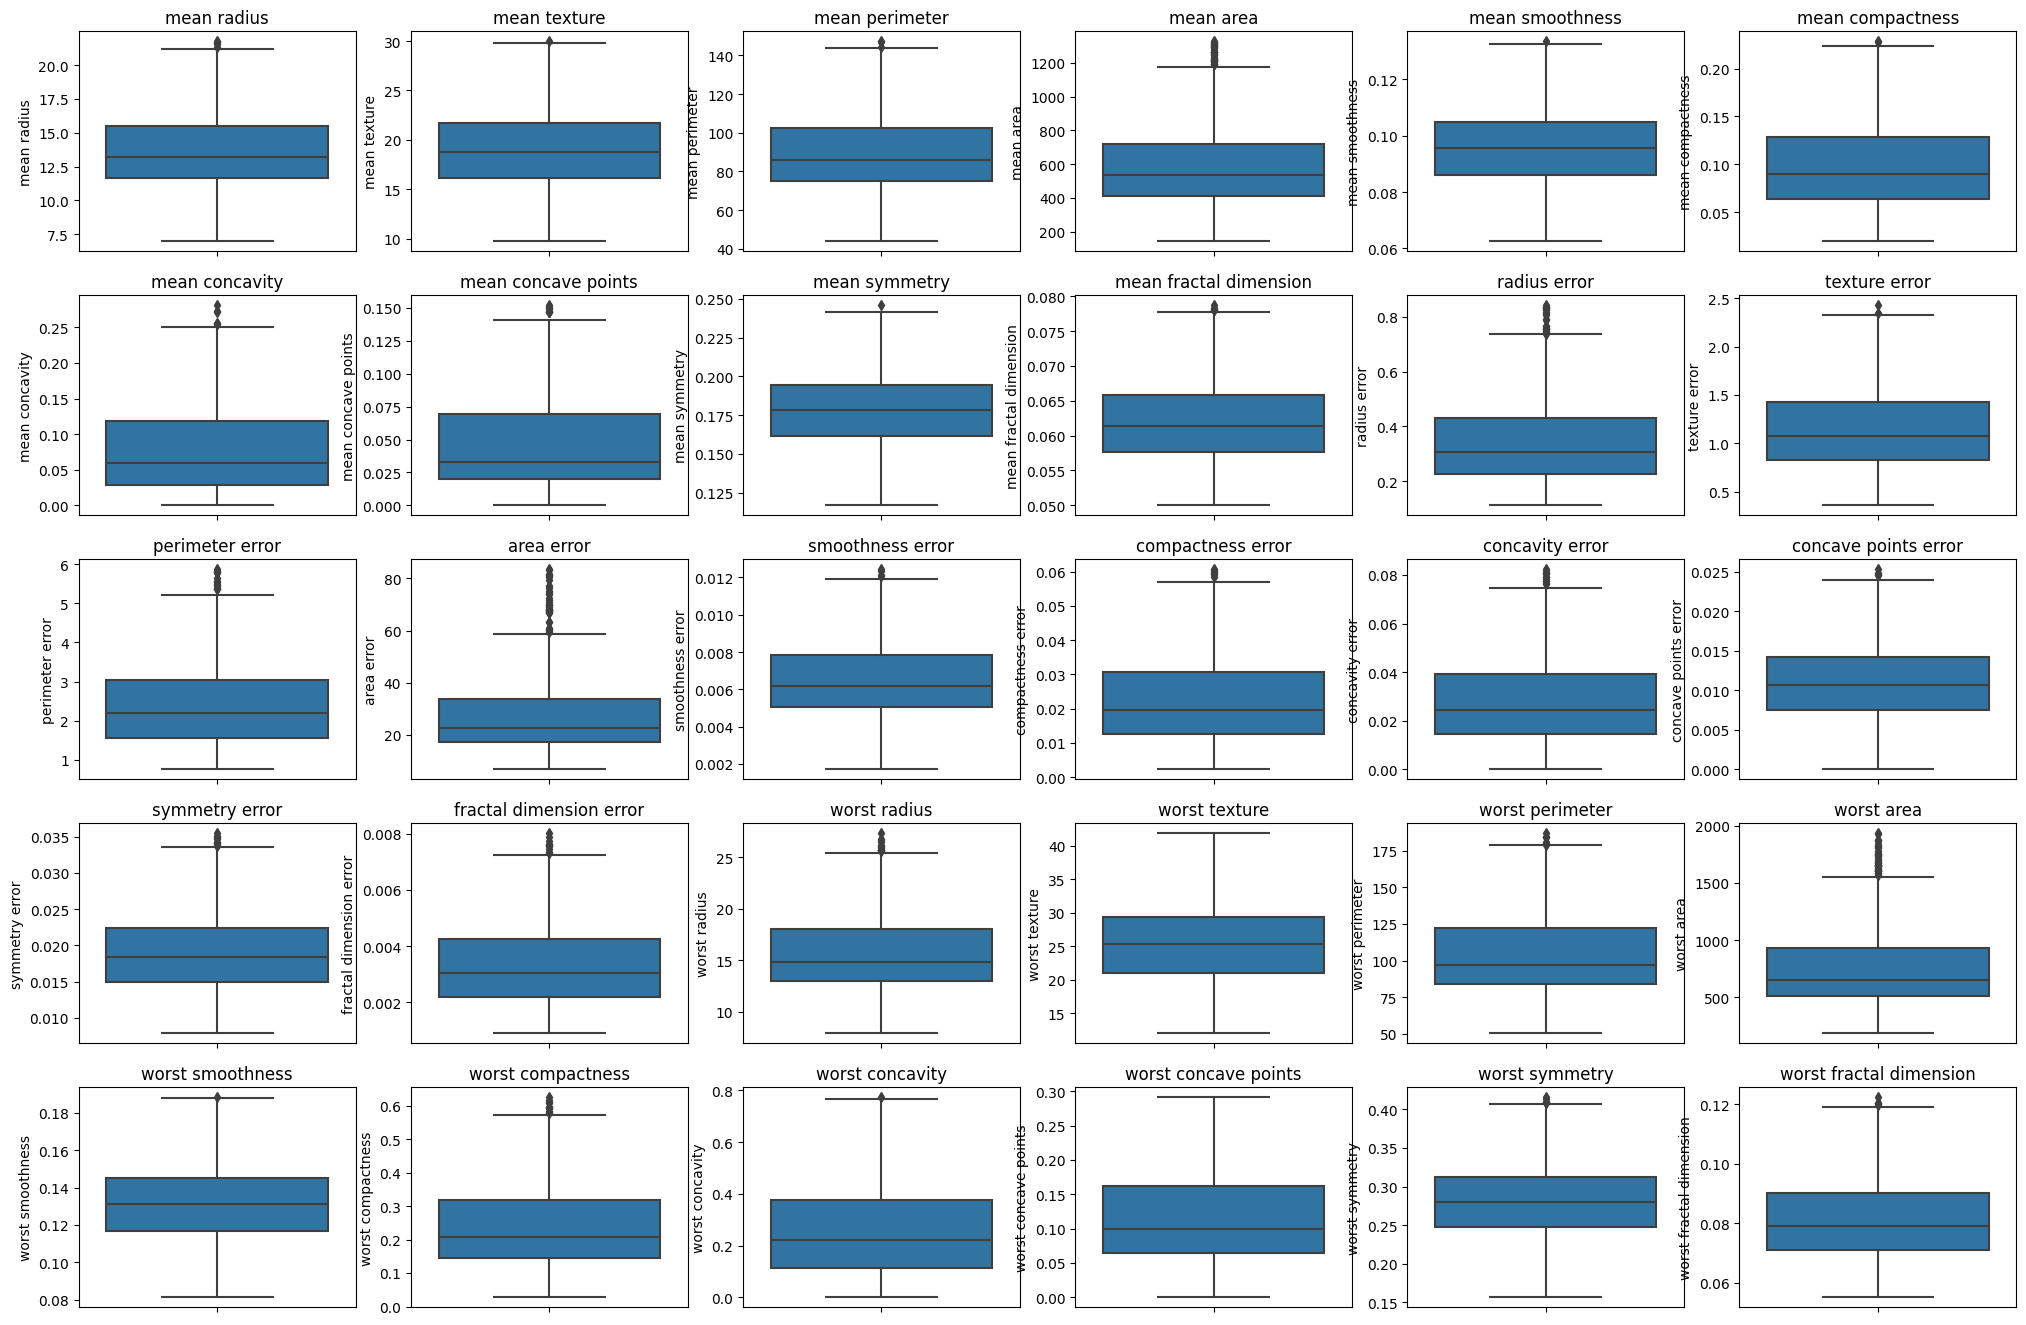

In [ ]:
plt.figure(figsize=(25,20))
for index,item in enumerate(outliers_columns):
  plt.subplot(6,6,index+1)
  sns.boxplot(y=cancer_df[item])
  plt.title(item)

due to outlier removal some null values has been generated so we need to impute it.

In [ ]:
updated_null_counts=cancer_df.isnull().sum()
updated_null_counts

mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension    24
target                      0
dtype: int64

In [ ]:
def impute_null(outliers_columns):
  for col in outliers_columns:

    cancer_df[col].fillna(cancer_df[col].median(),inplace=True)

In [ ]:
impute_null(outliers_columns)

In [ ]:
updated_null_counts=cancer_df.isnull().sum()
updated_null_counts

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

###  Categorical Encoding

In [ ]:
# Encode your categorical columns
cancer_df.nunique()

mean radius                442
mean texture               473
mean perimeter             511
mean area                  514
mean smoothness            468
mean compactness           521
mean concavity             519
mean concave points        532
mean symmetry              418
mean fractal dimension     485
radius error               502
texture error              499
perimeter error            495
area error                 464
smoothness error           519
compactness error          513
concavity error            511
concave points error       489
symmetry error             472
fractal dimension error    517
worst radius               441
worst texture              507
worst perimeter            500
worst area                 510
worst smoothness           404
worst compactness          513
worst concavity            527
worst concave points       492
worst symmetry             478
worst fractal dimension    513
target                       2
dtype: int64

**In our dataset there is a lot opf unique values in all columns so we don't need to do any categorical encoding**

### . Feature Manipulation & Selection

#### . Feature Manipulation

In [ ]:
correlation=cancer_df.corr()
correlation.style.background_gradient()

In [ ]:
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [ ]:
cancer_df.drop(['mean radius','mean perimeter','radius error','worst perimeter','worst radius'],axis=1,inplace=True)

In [ ]:
correlation=cancer_df.corr()
correlation.style.background_gradient()

In [ ]:
selected_features=cancer_df.columns.tolist()
selected_features

['mean texture',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst texture',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [ ]:
independent_column=[col for col in selected_features if col not in 'target']
independent_column

['mean texture',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst texture',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

### . Data Transformation

In [ ]:
# Transform data

<ipython-input-91-0a16c77dc109>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(9,9))


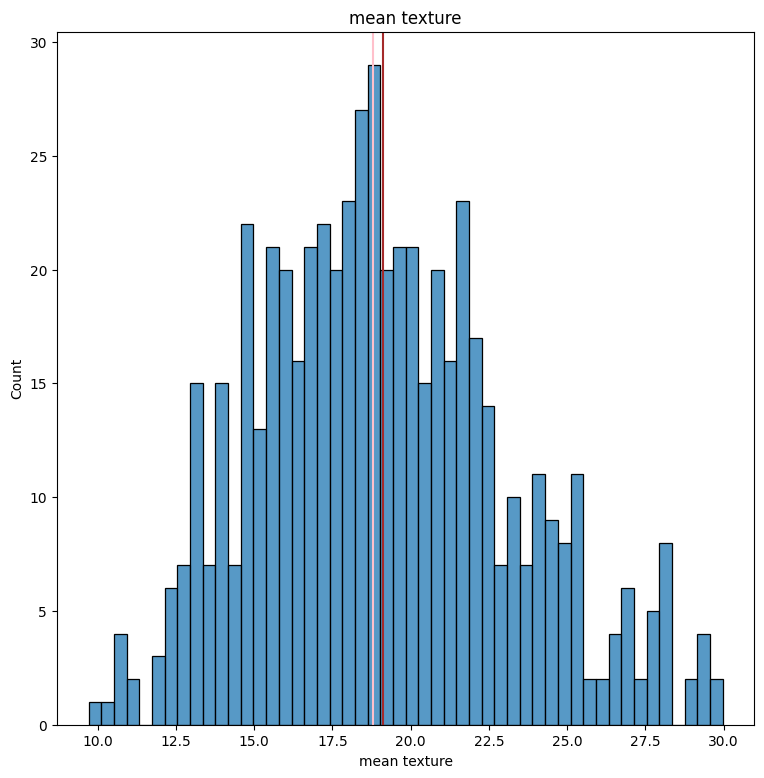

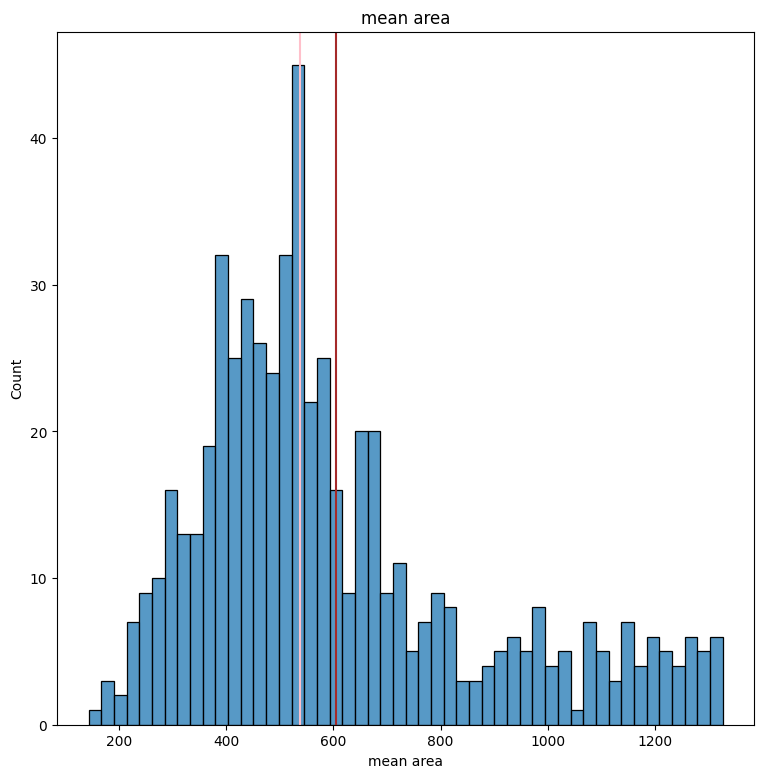

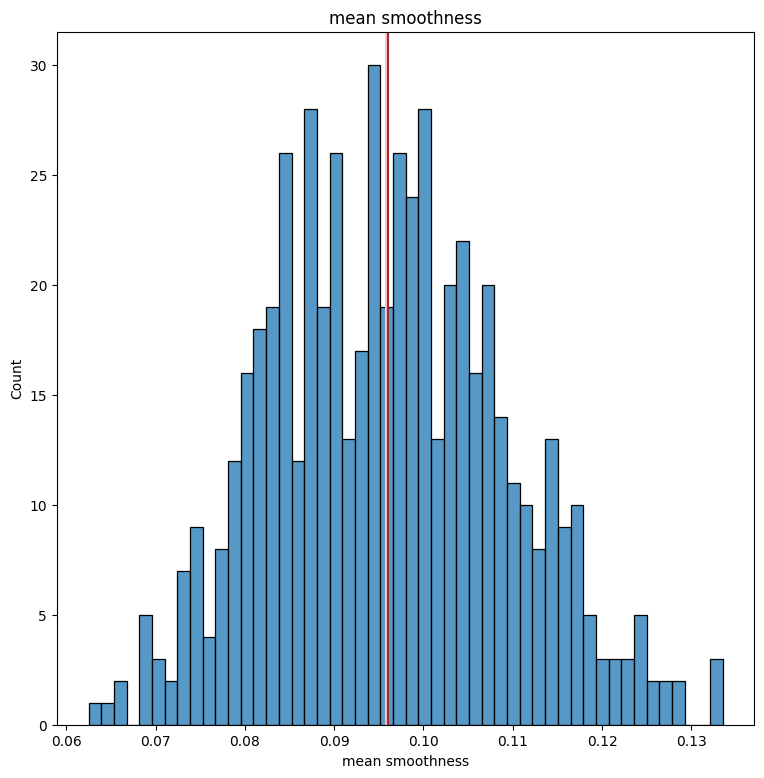

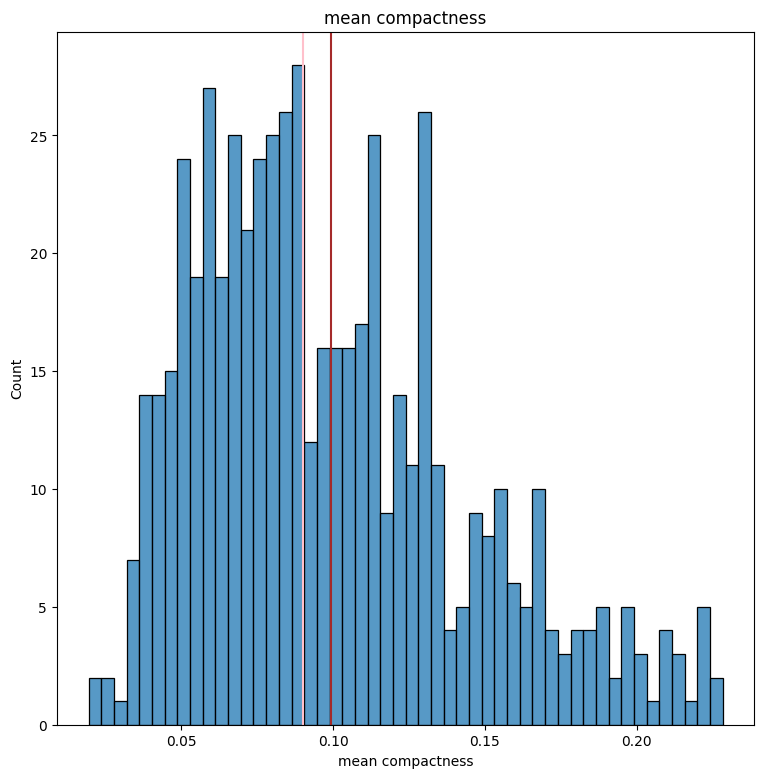

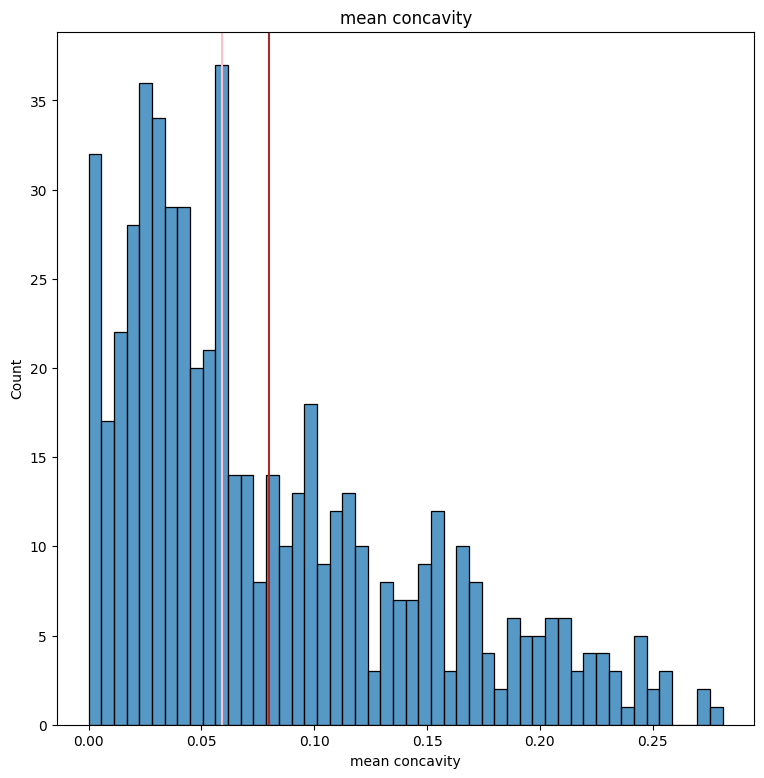

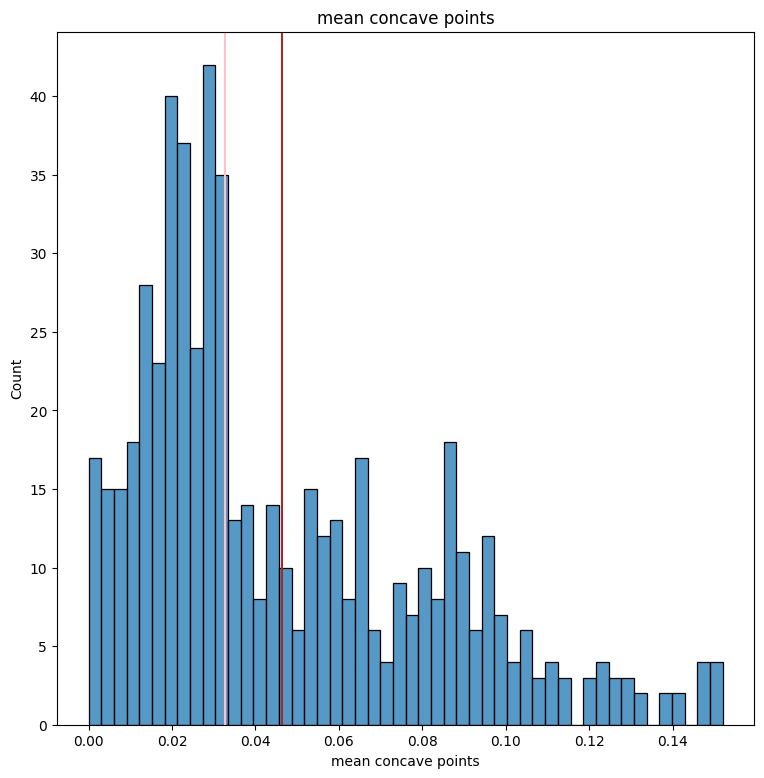

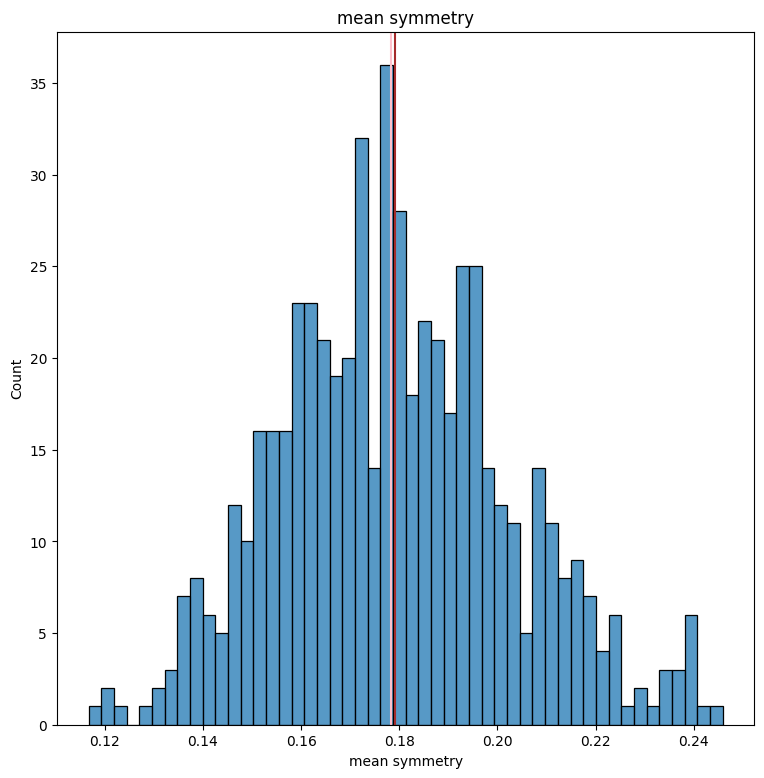

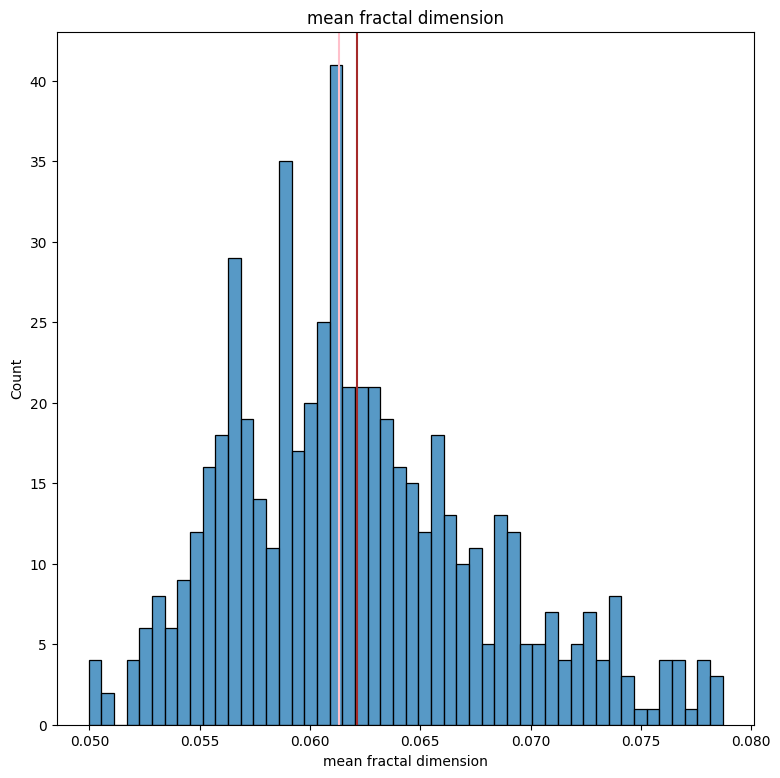

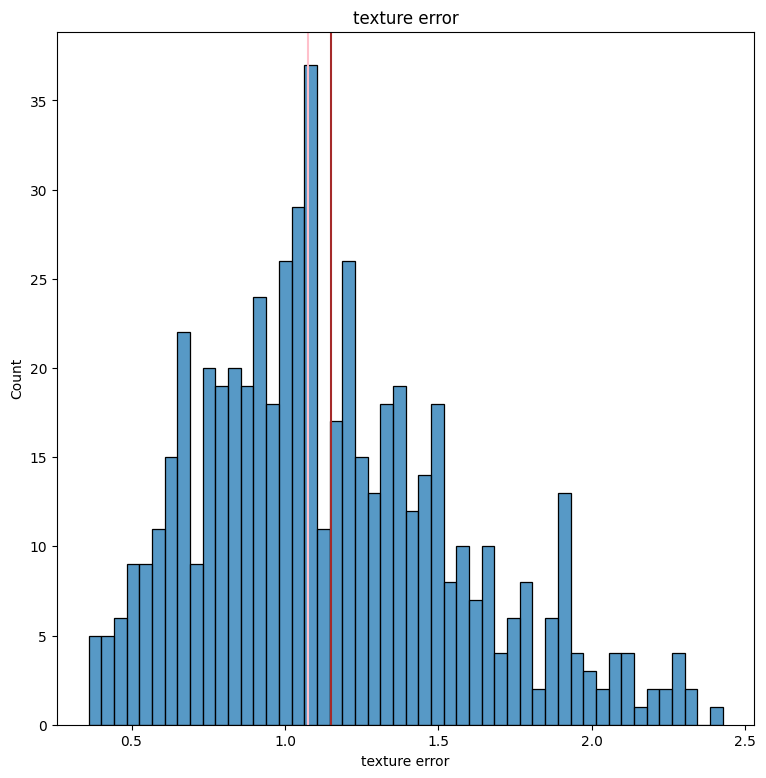

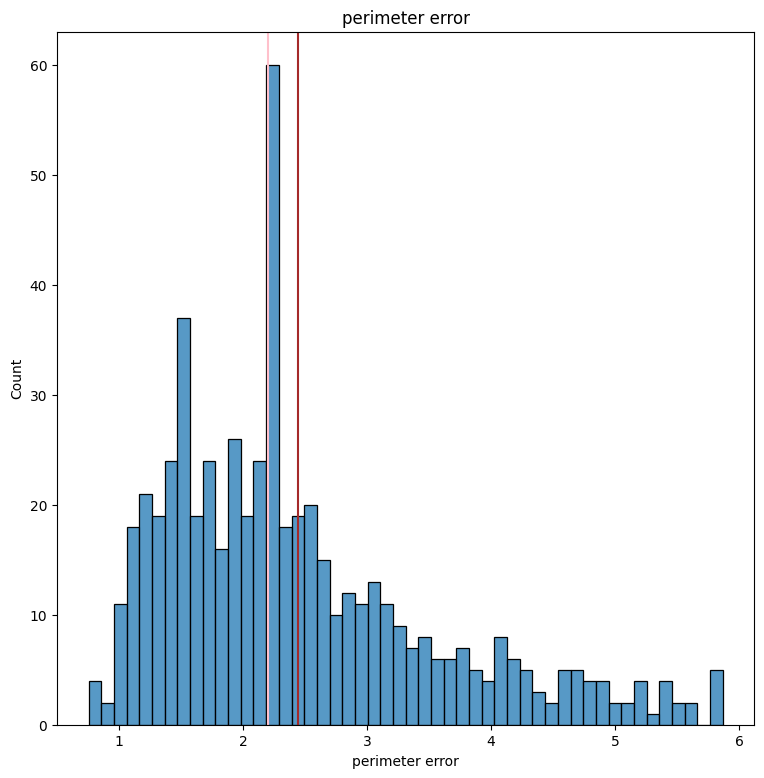

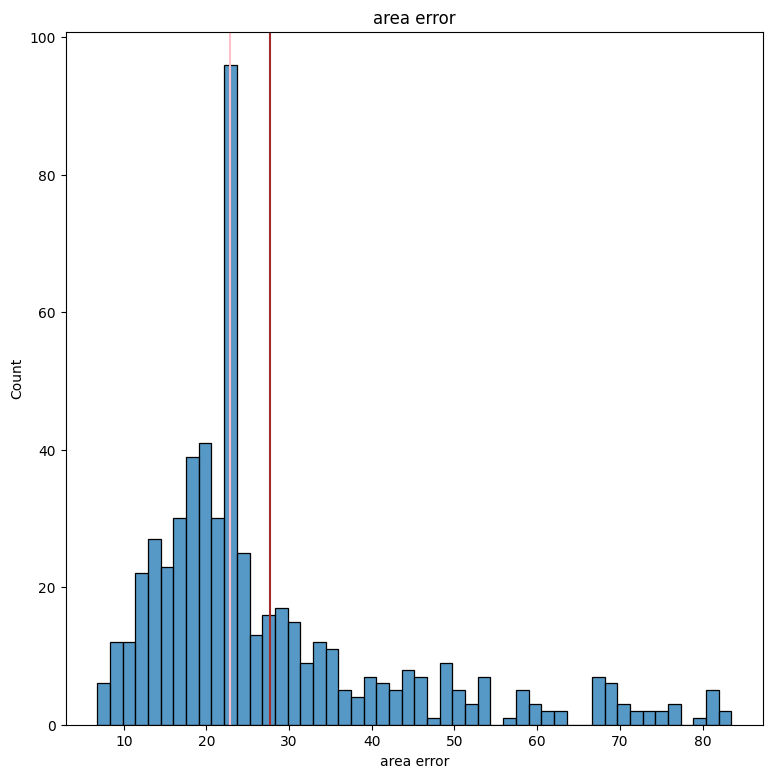

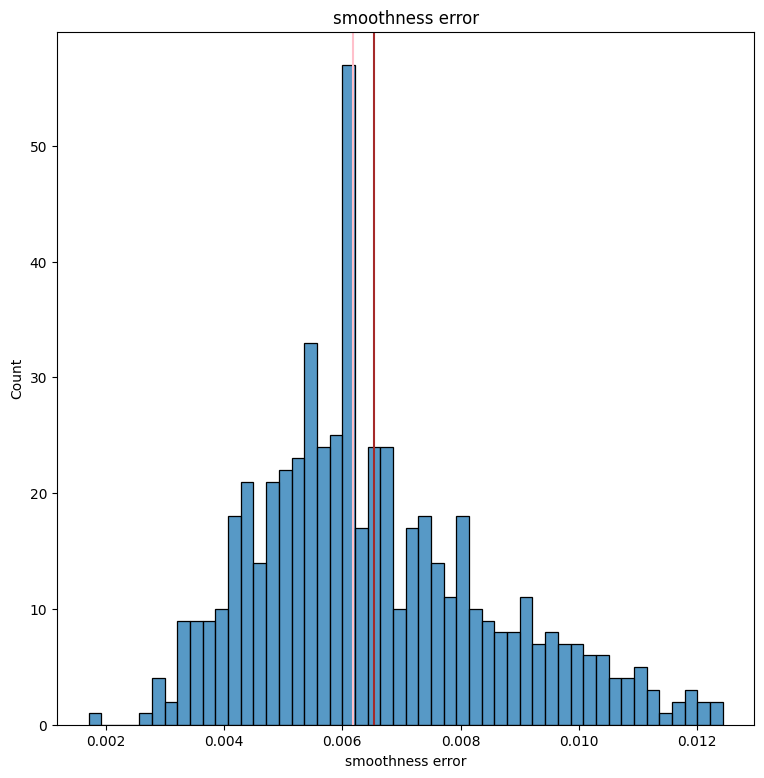

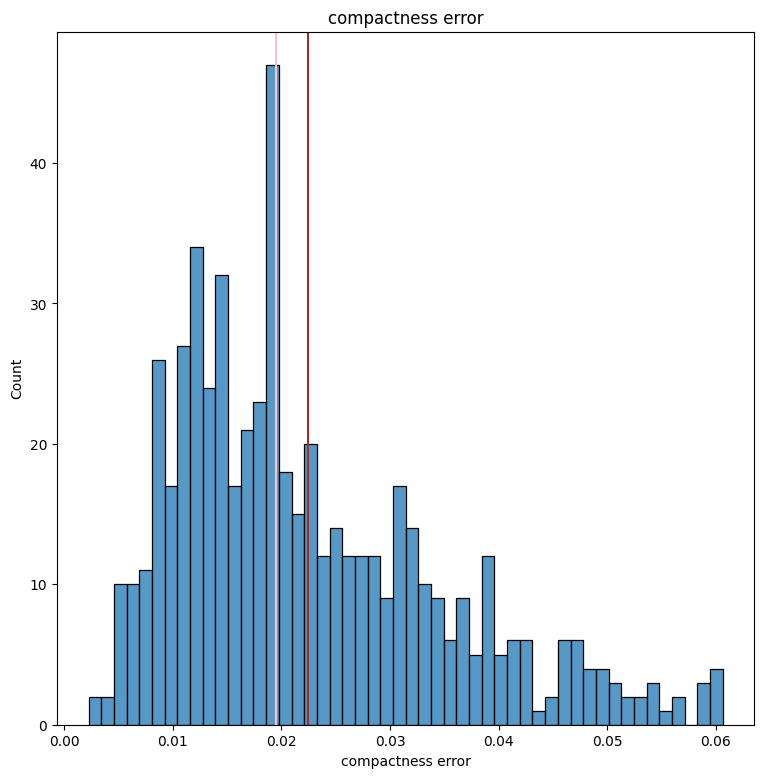

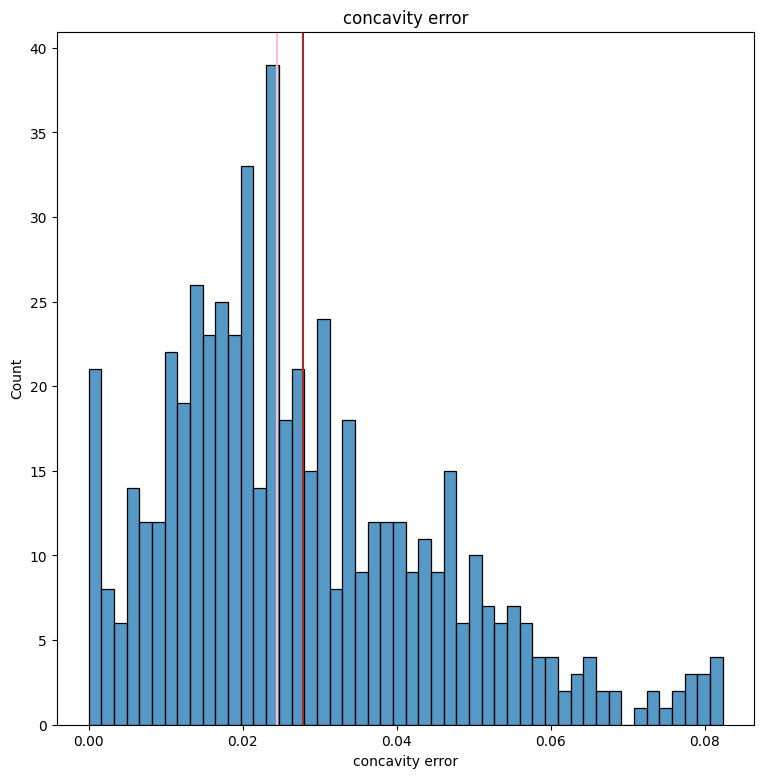

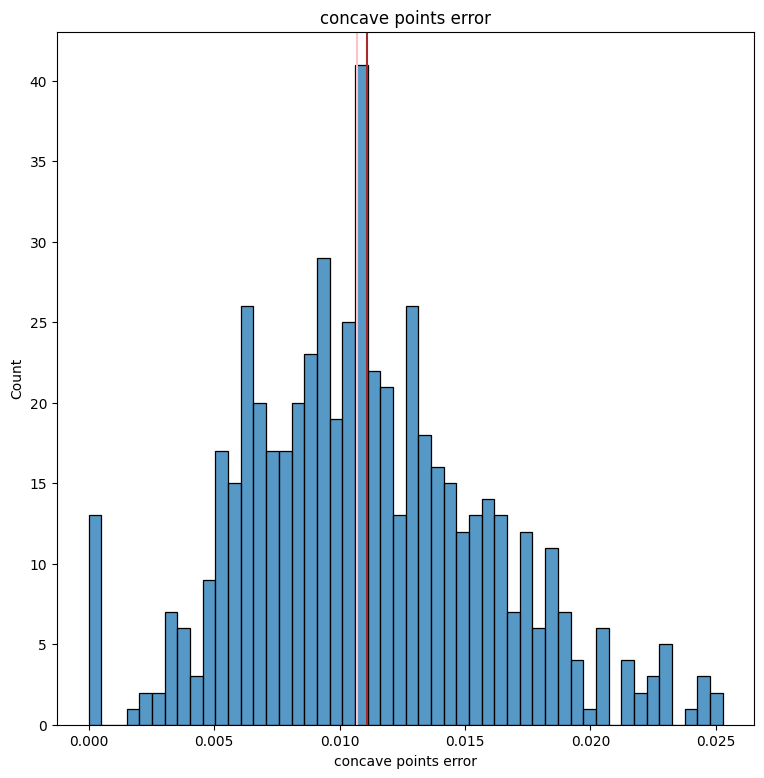

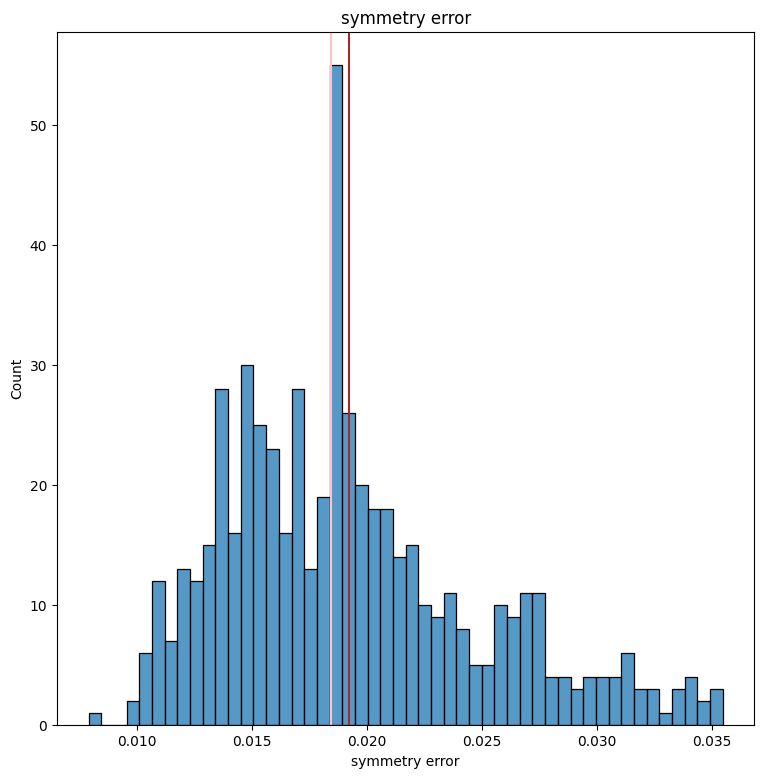

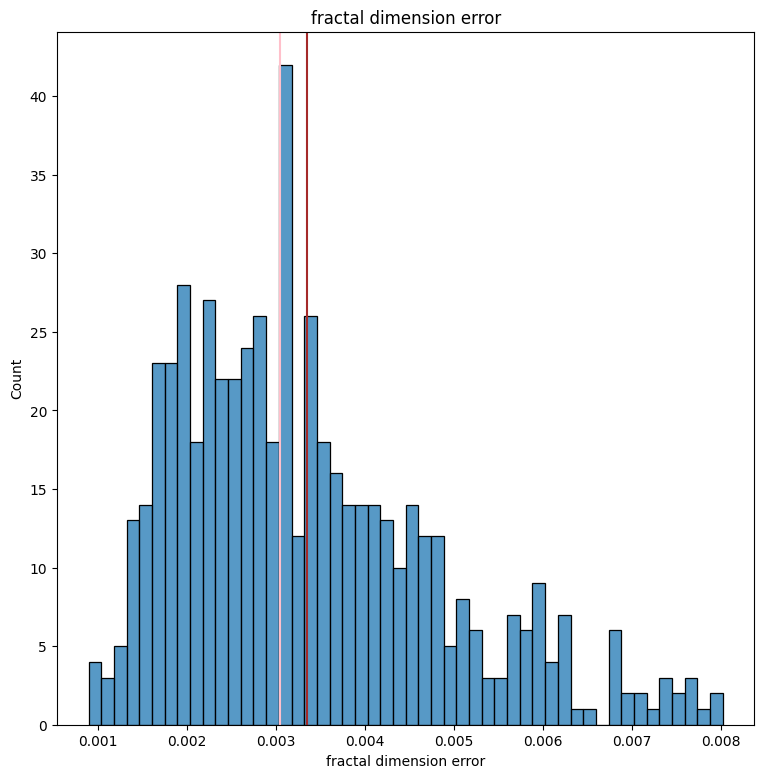

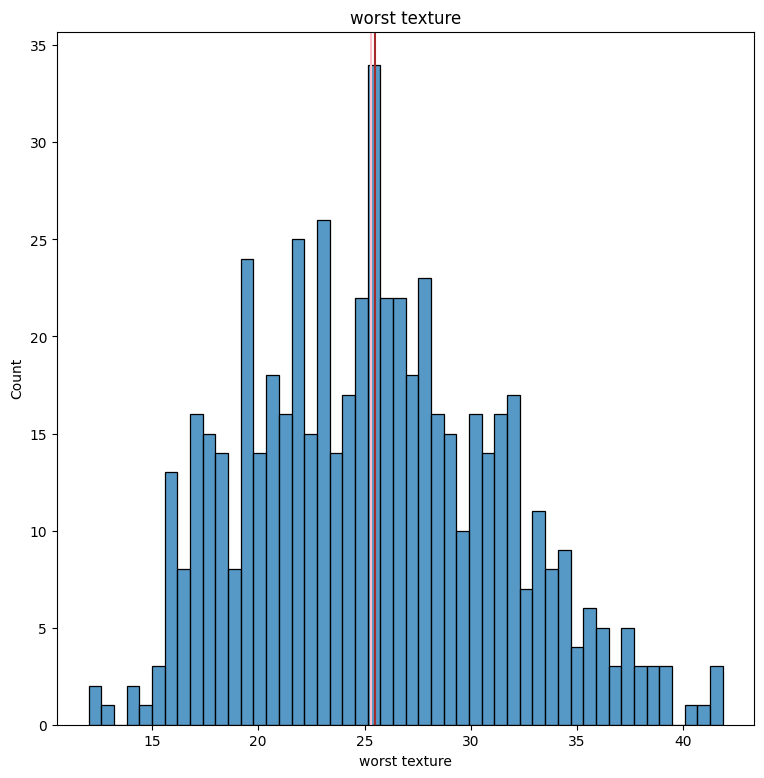

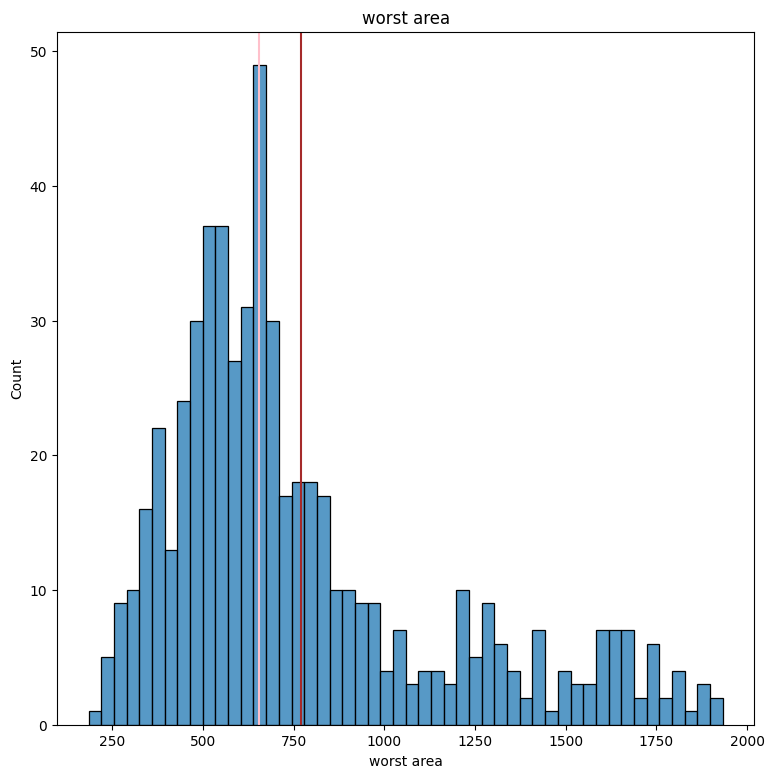

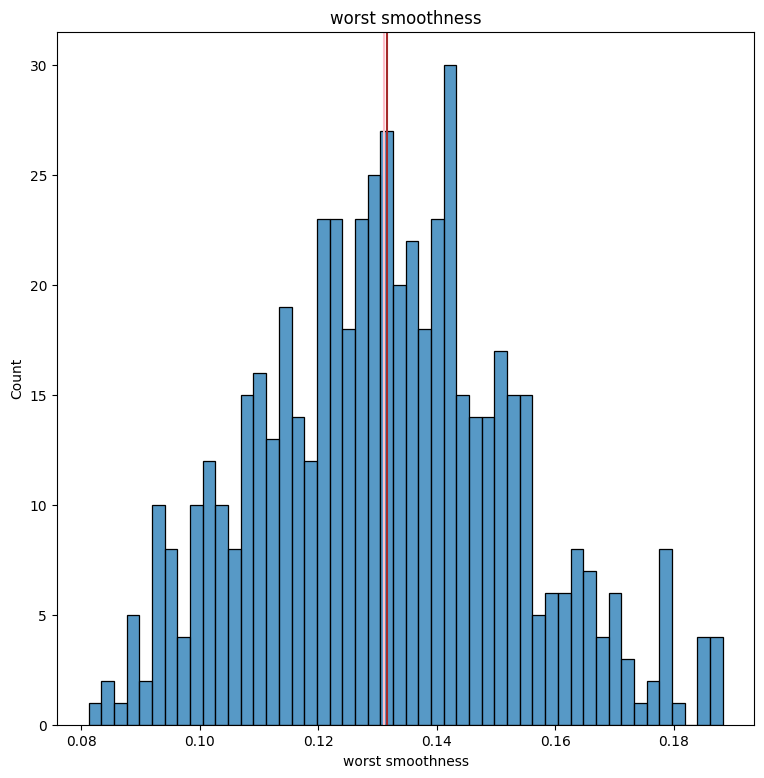

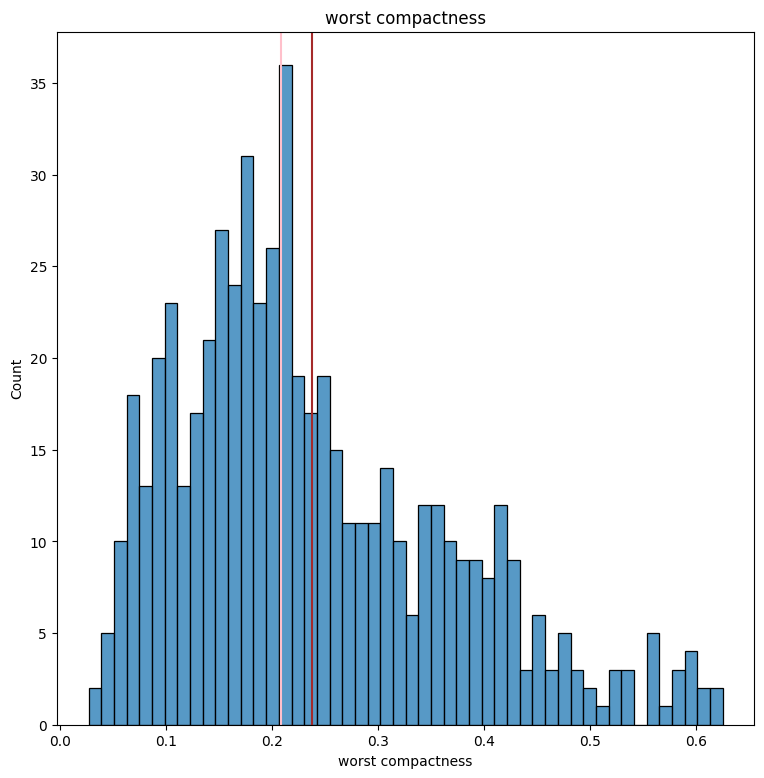

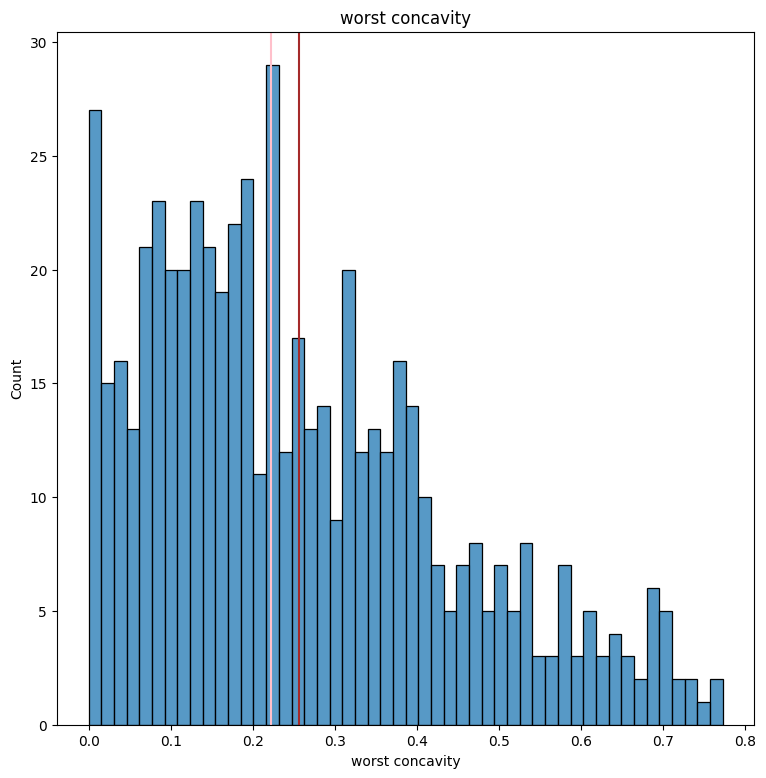

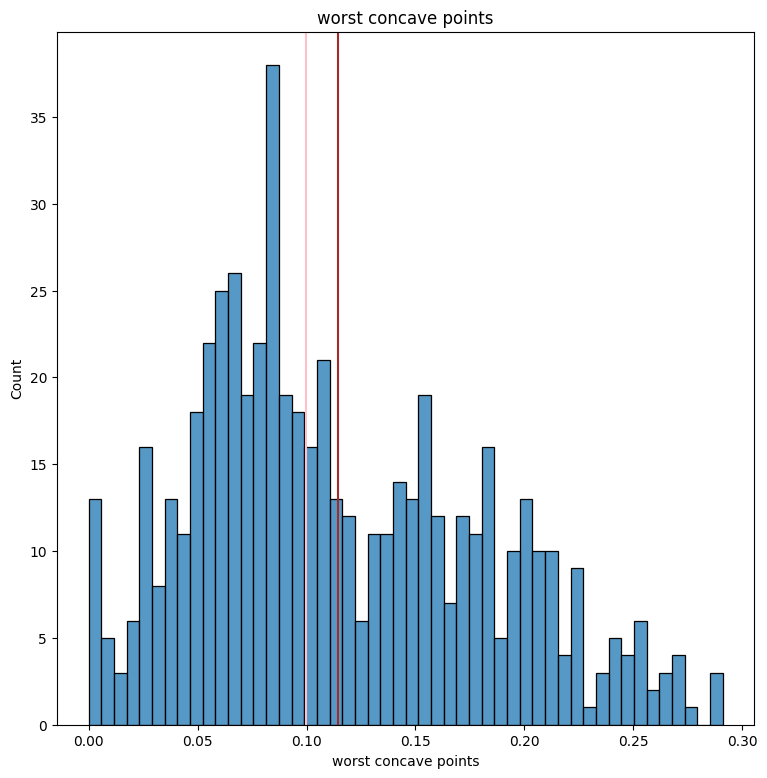

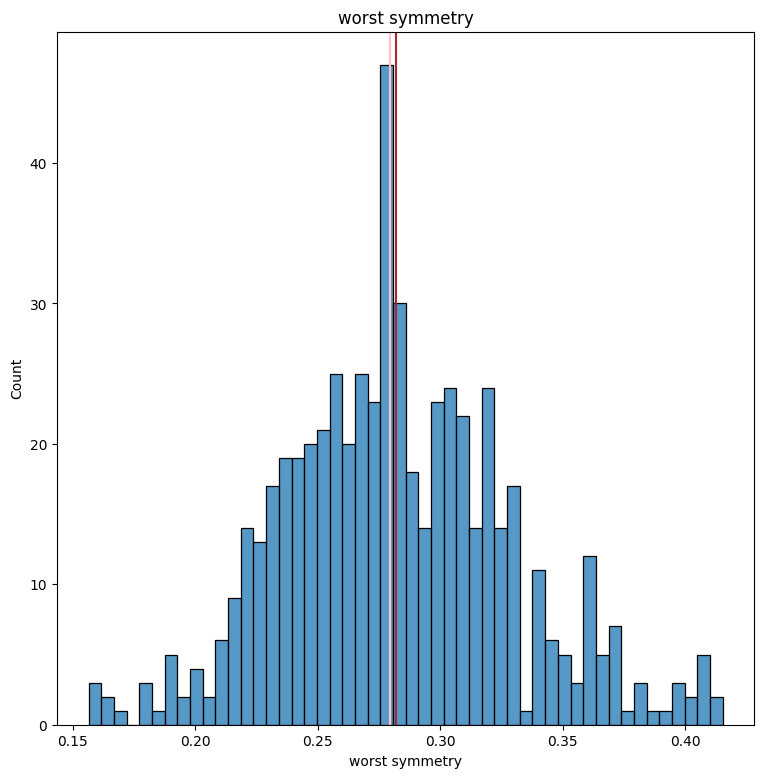

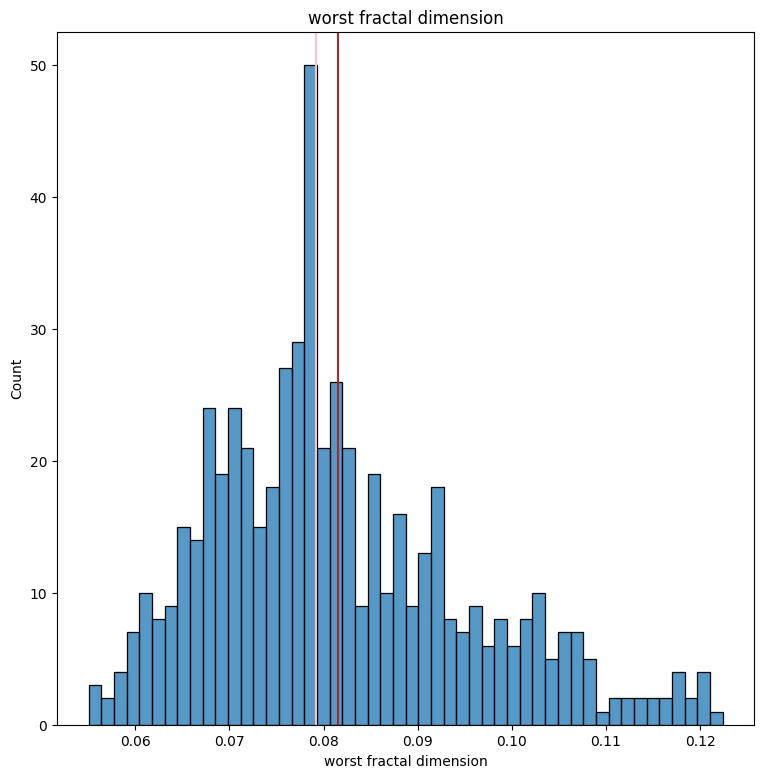

In [ ]:
for col in independent_column:
  fig=plt.figure(figsize=(9,9))
  ax=fig.gca()
  features=cancer_df[col]
  sns.histplot(x=features,bins=50)
  plt.title(col)
  plt.axvline(features.median(),color='pink')
  plt.axvline(features.mean(),color='brown')

**lets try the square root test**

<ipython-input-92-d9135b0c1a66>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(9,9))


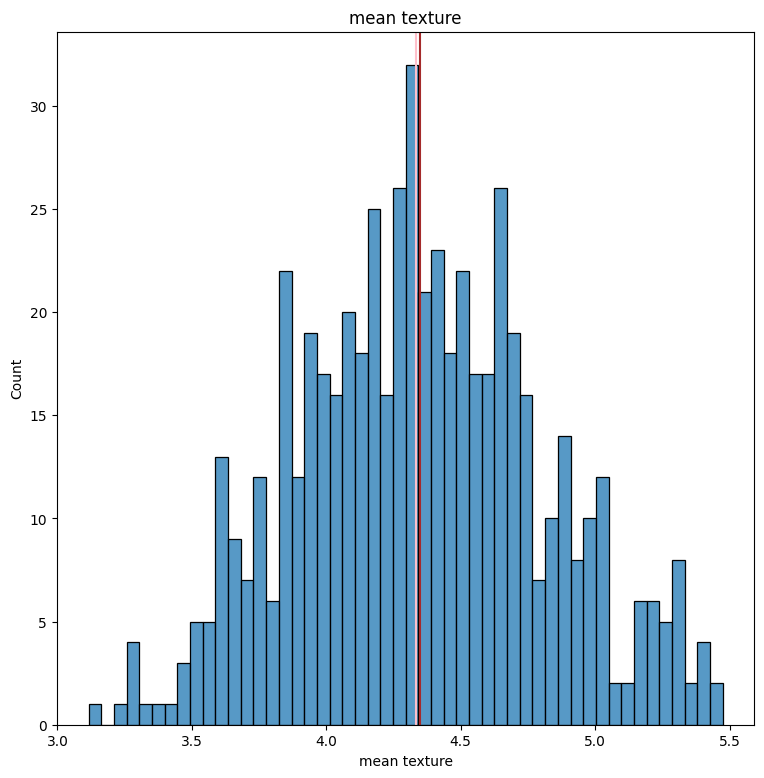

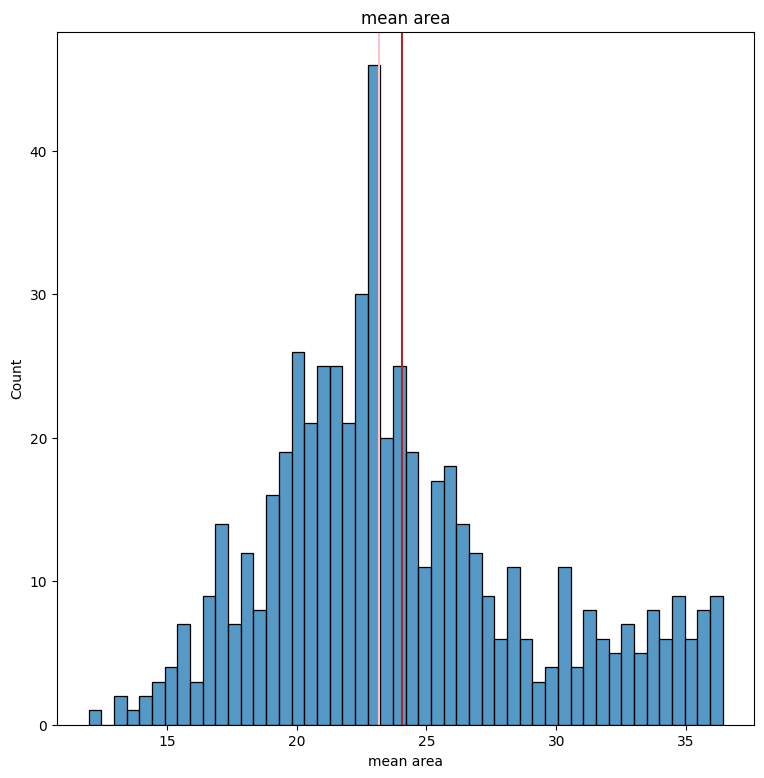

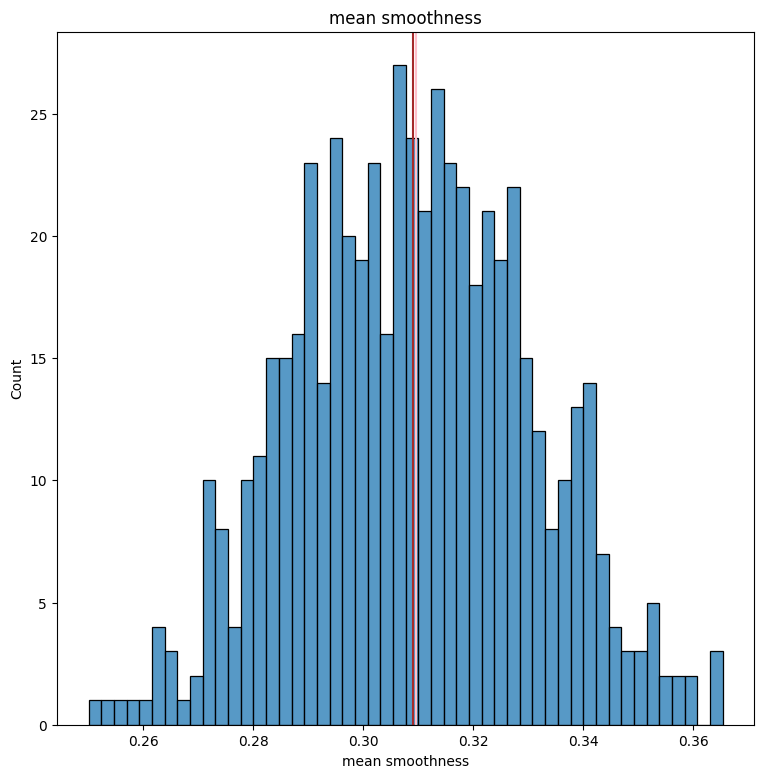

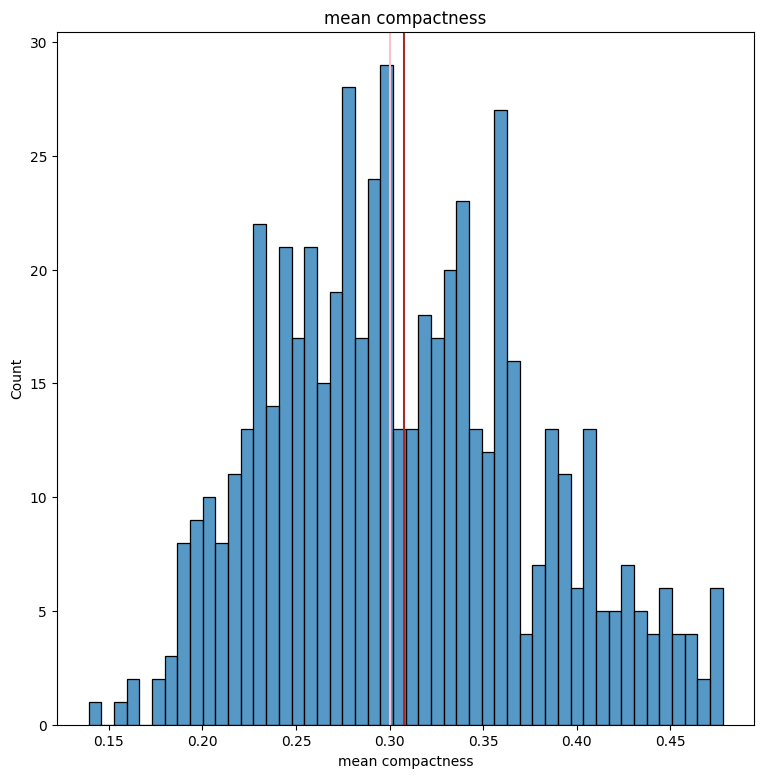

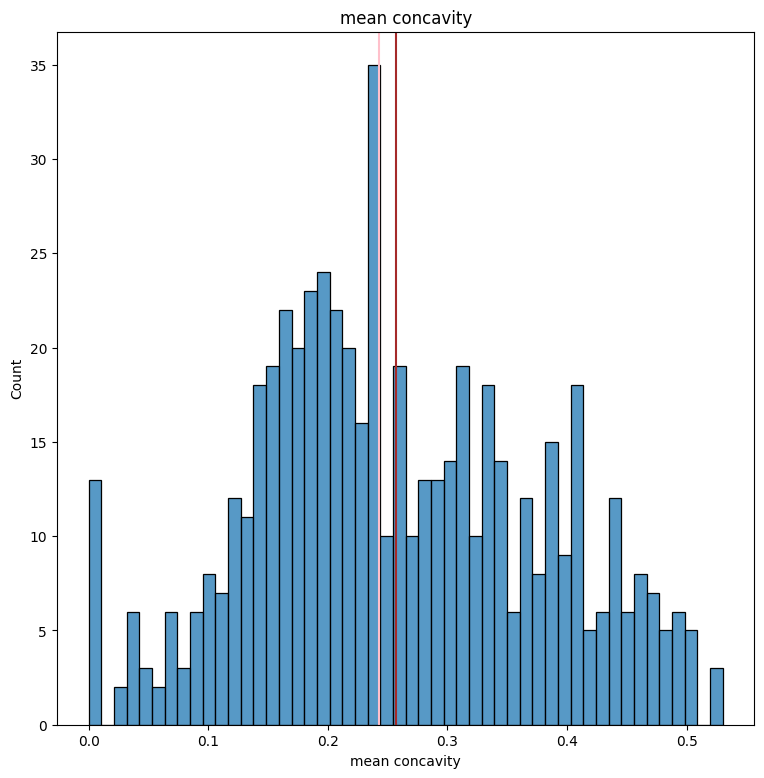

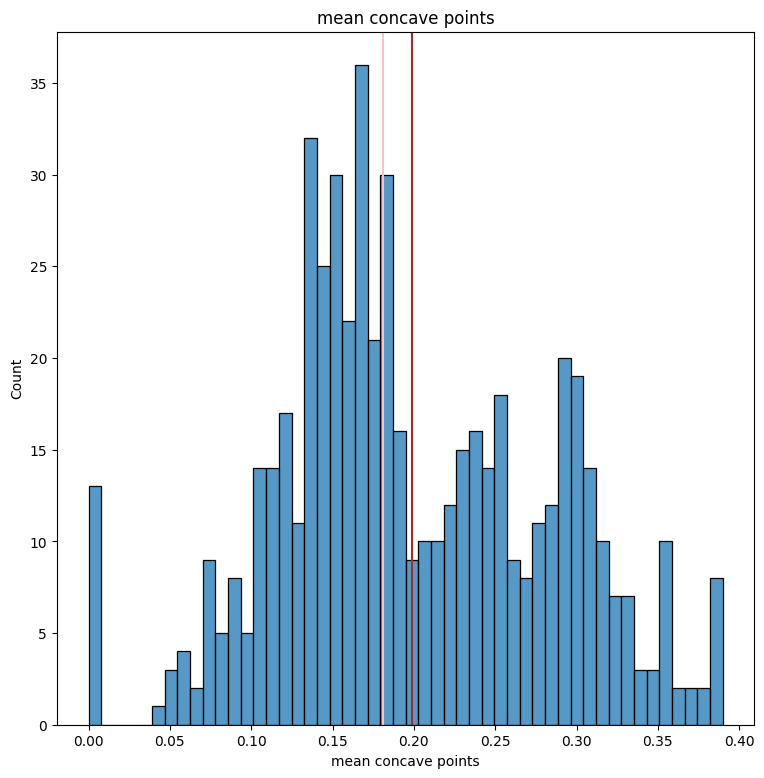

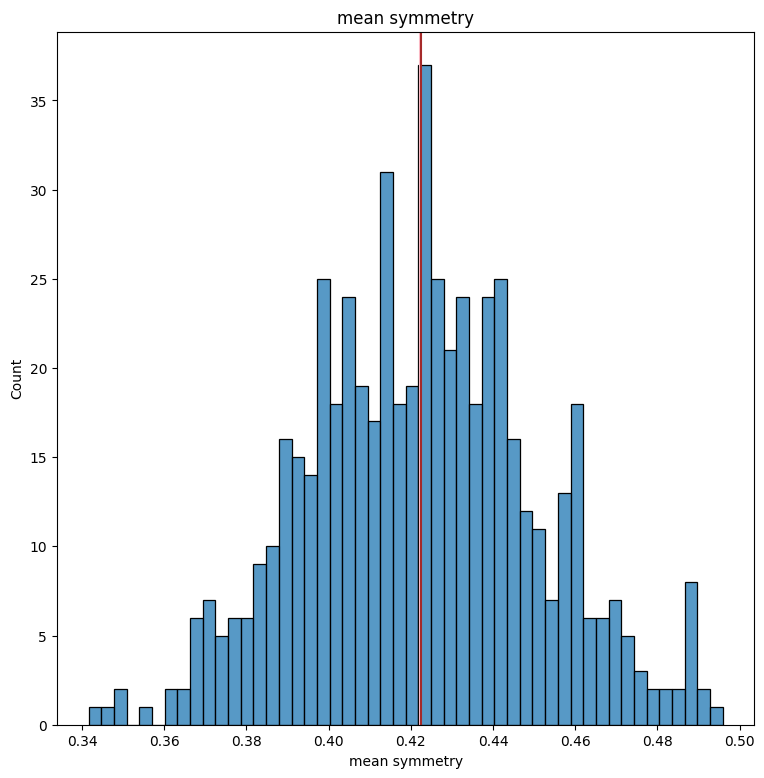

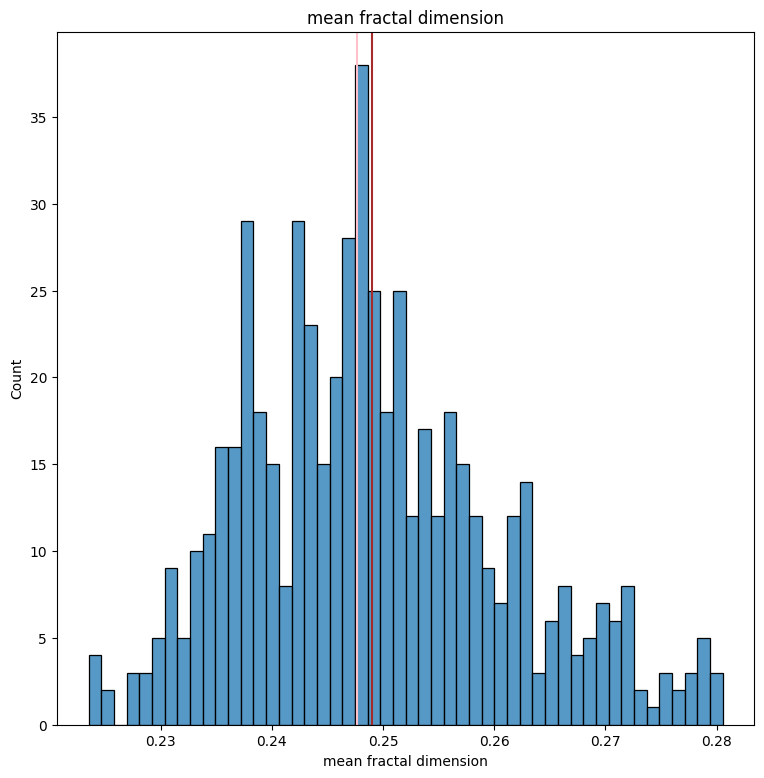

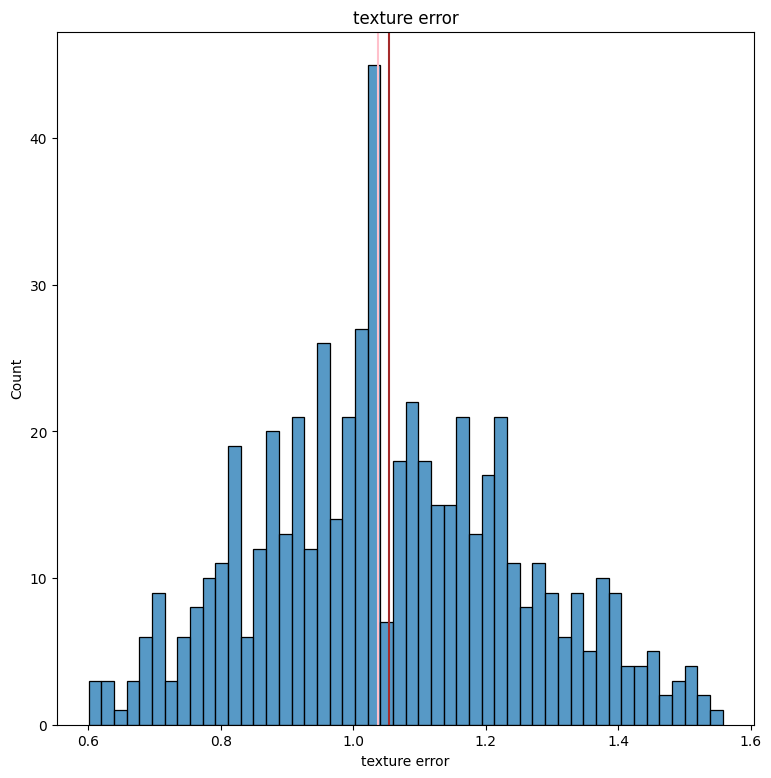

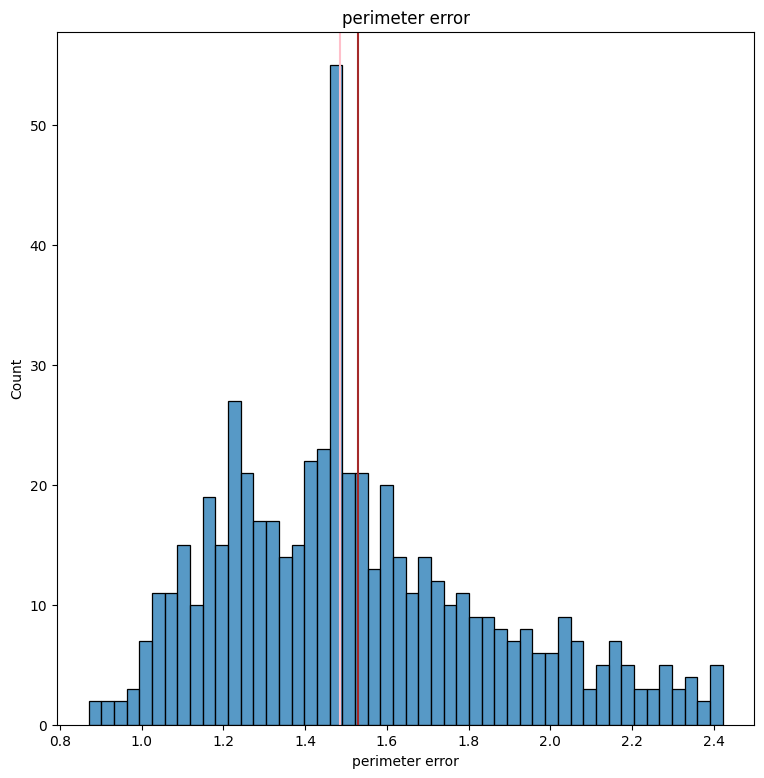

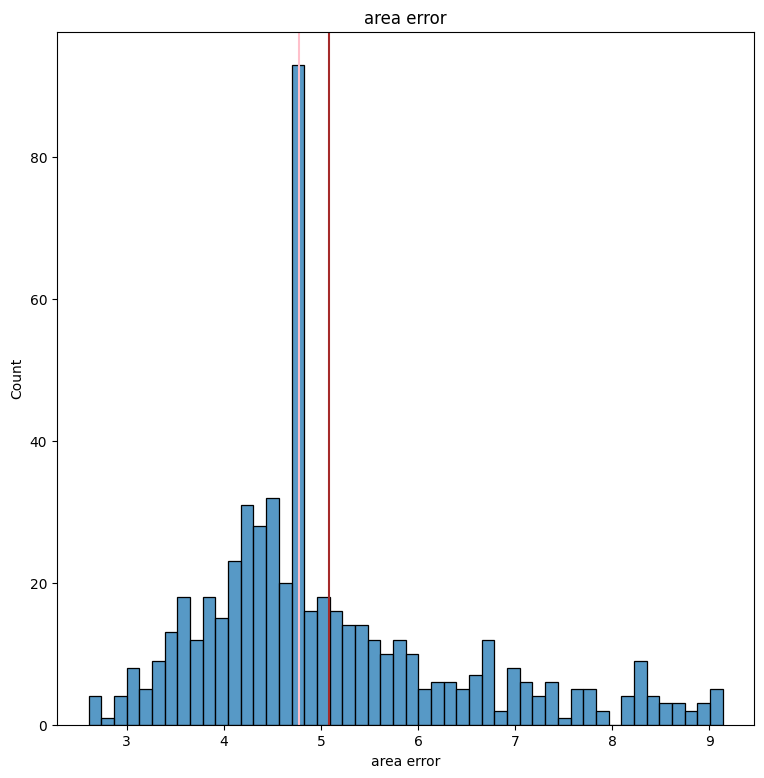

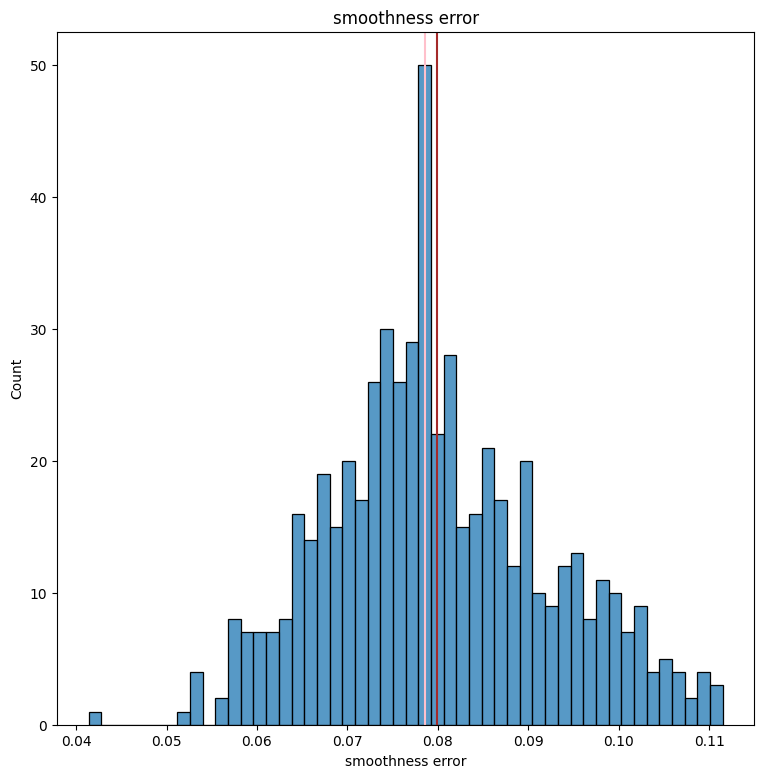

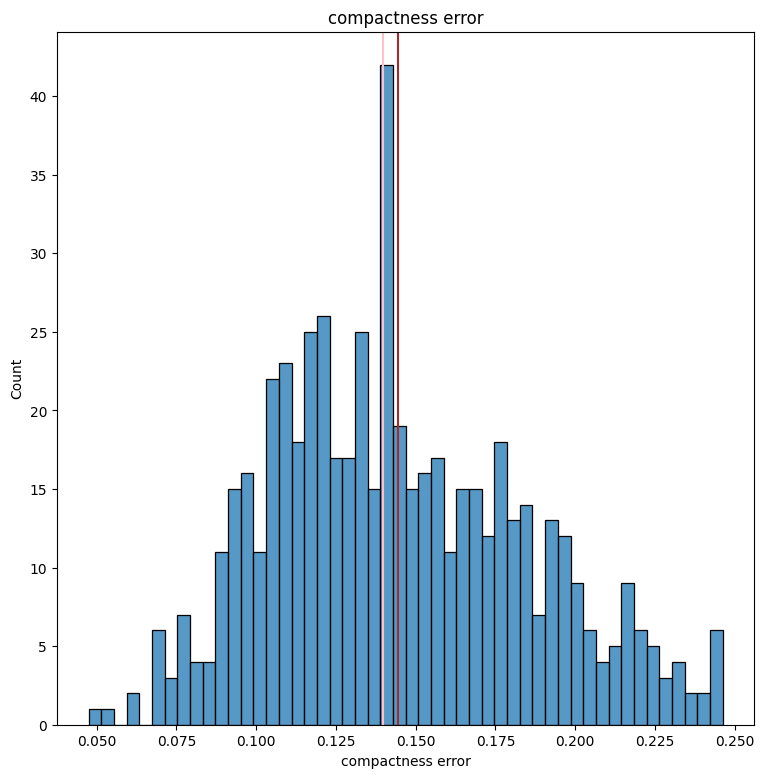

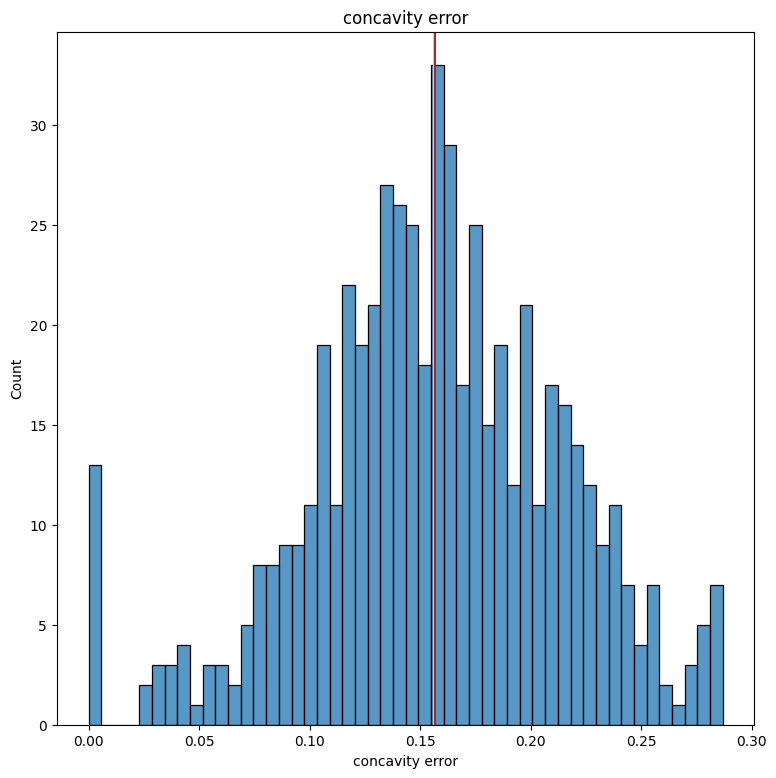

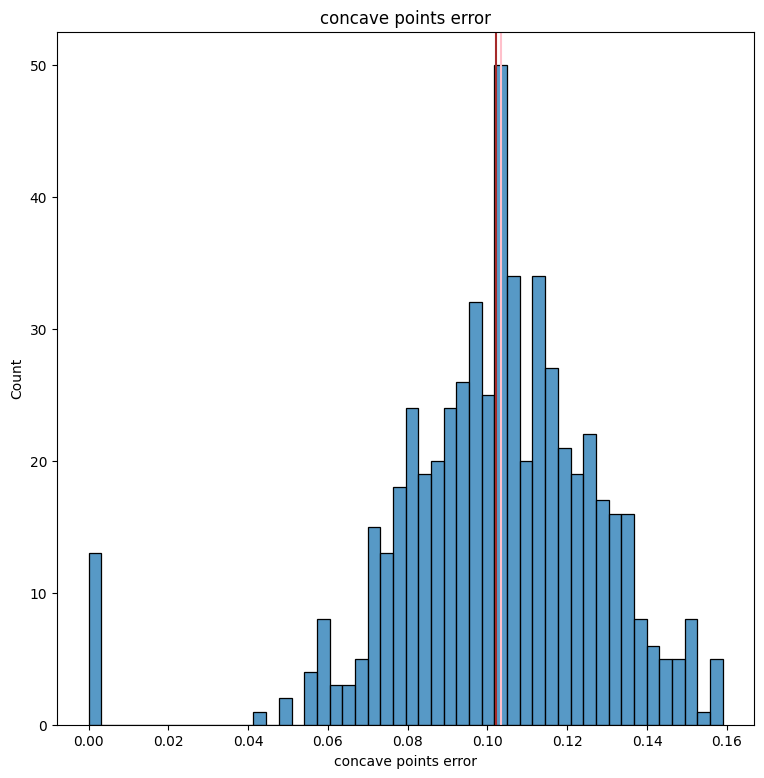

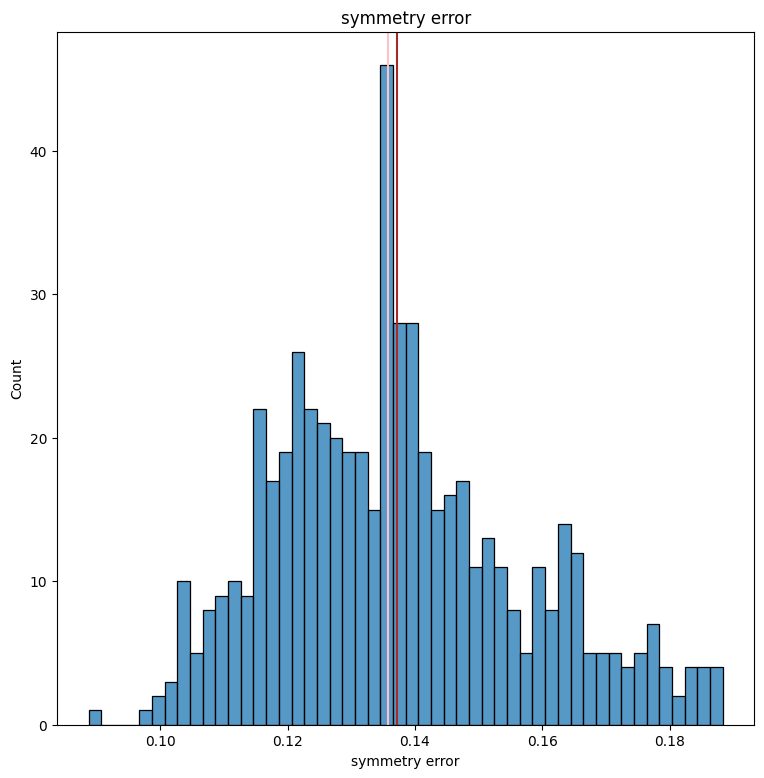

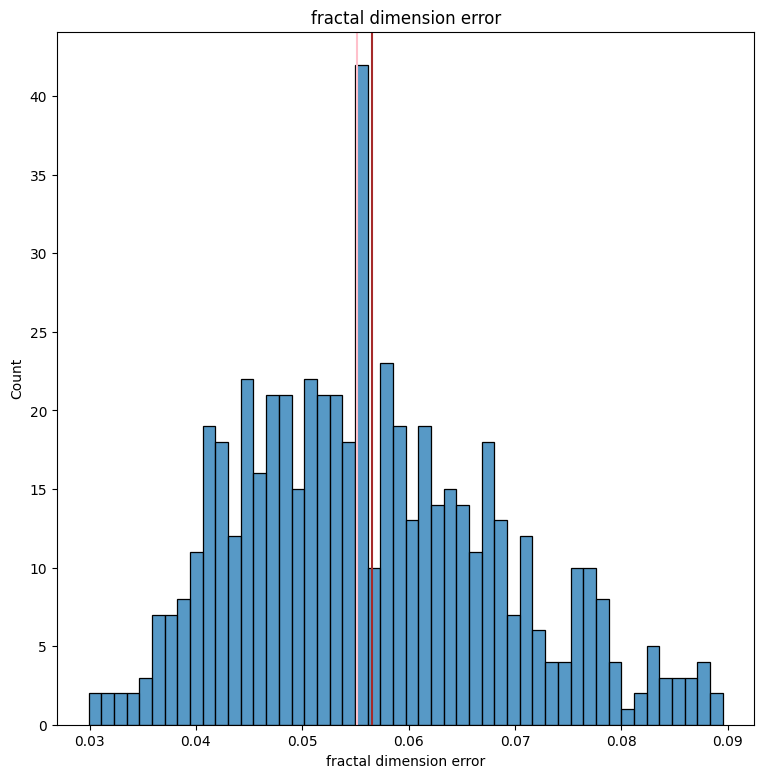

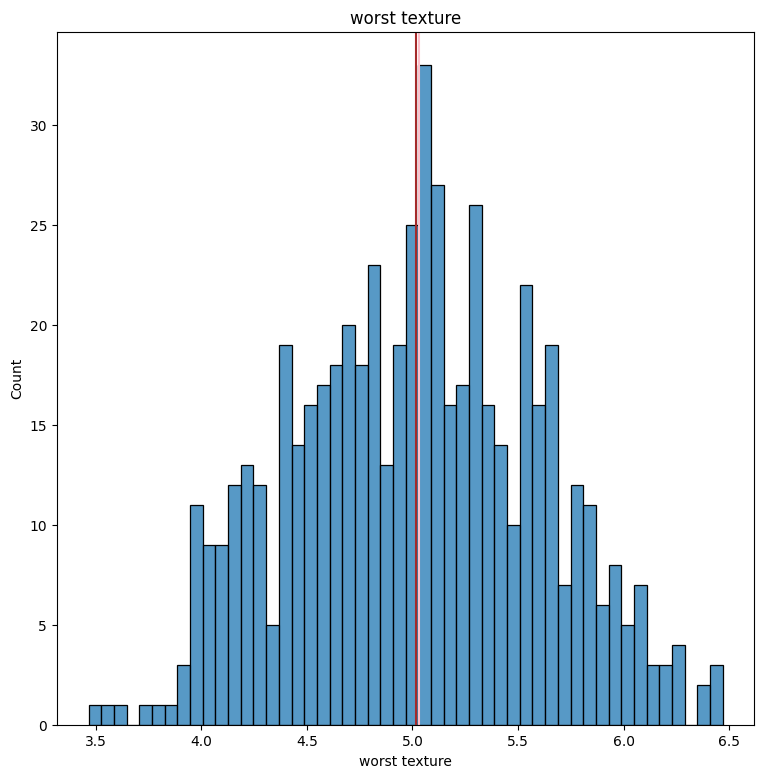

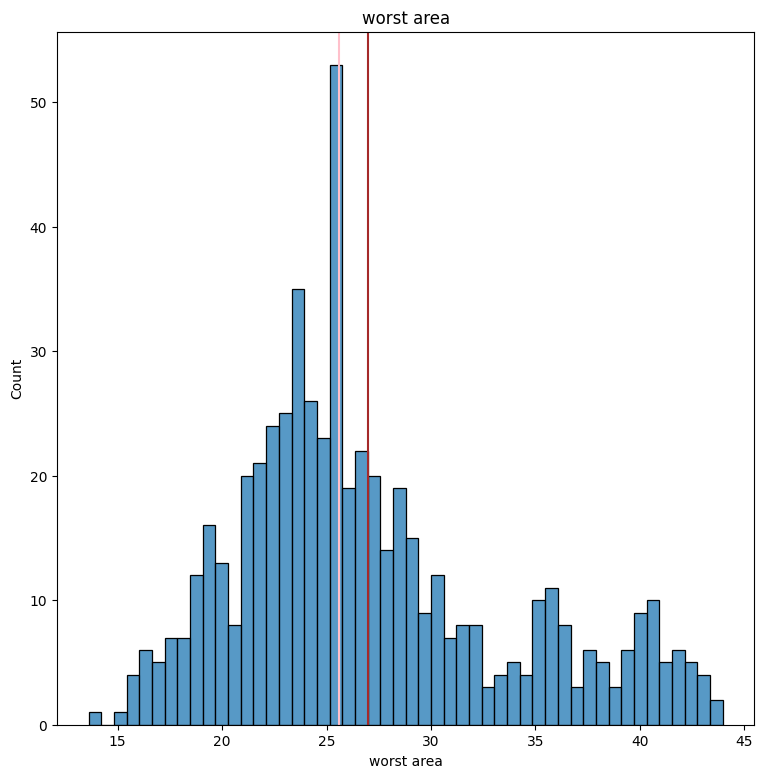

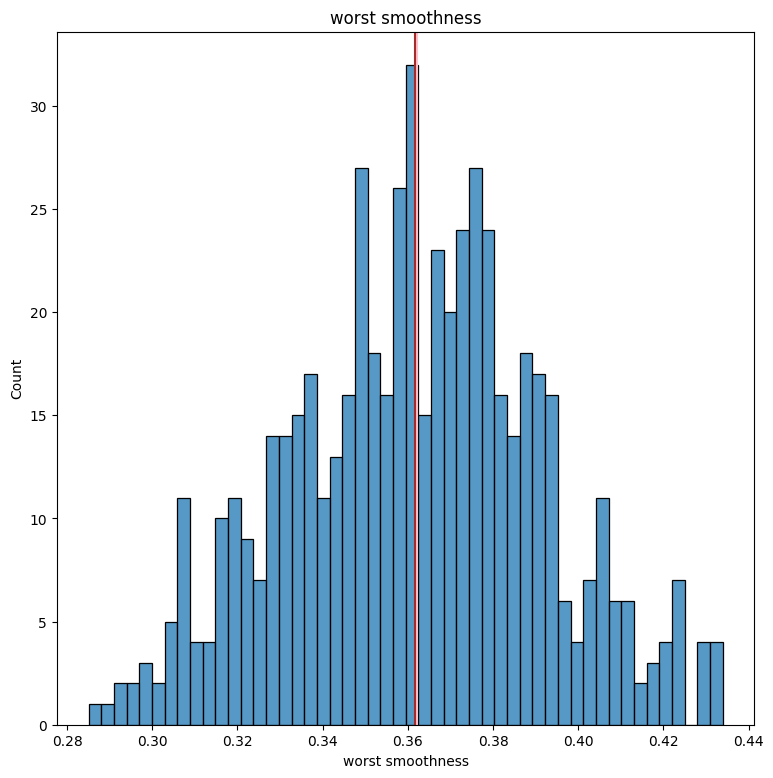

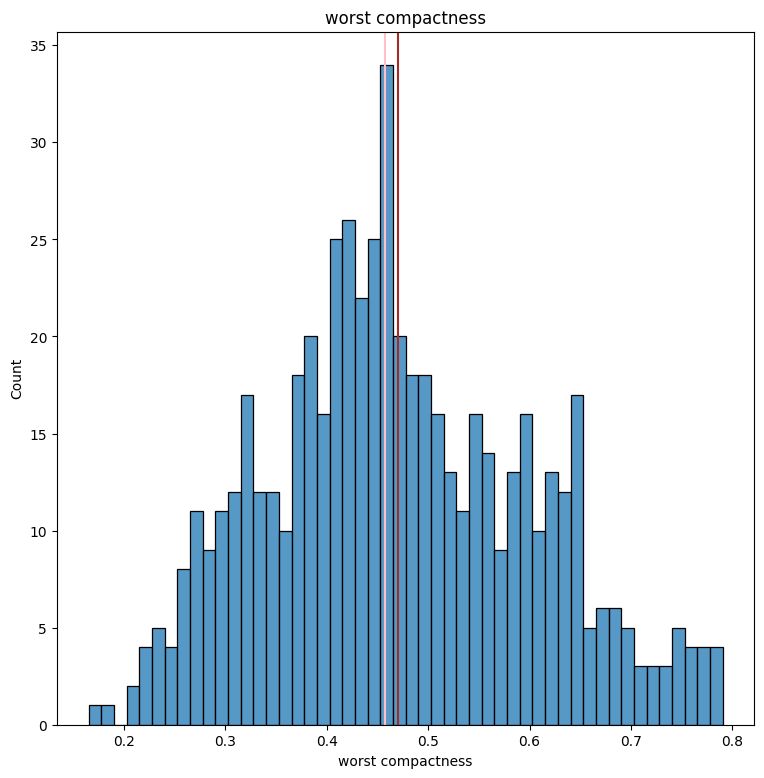

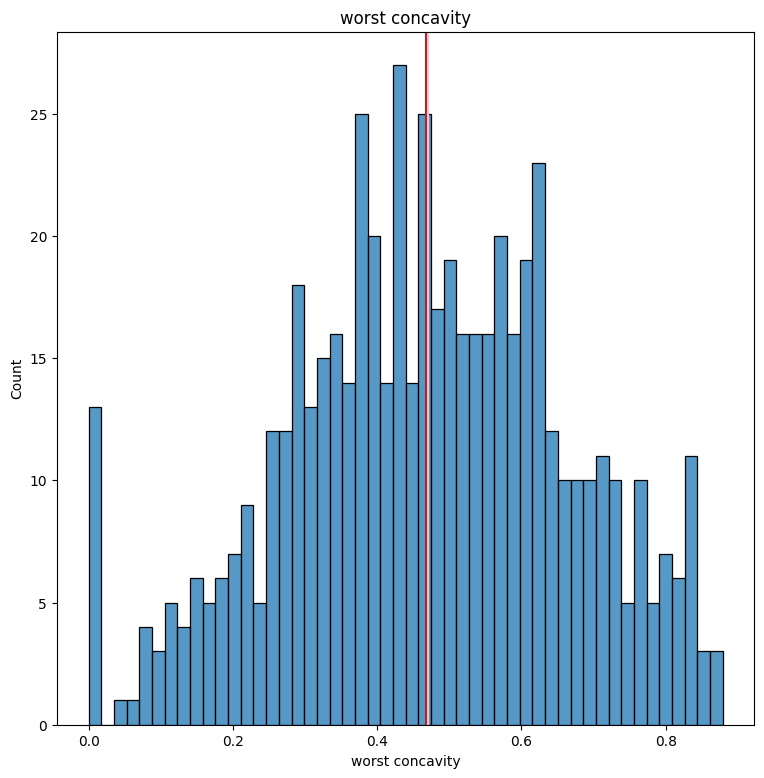

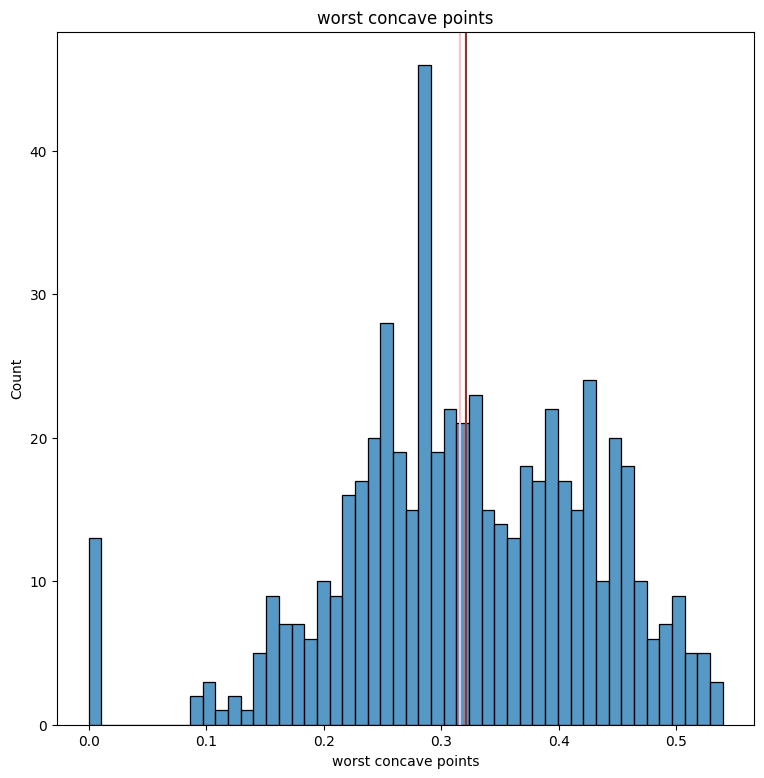

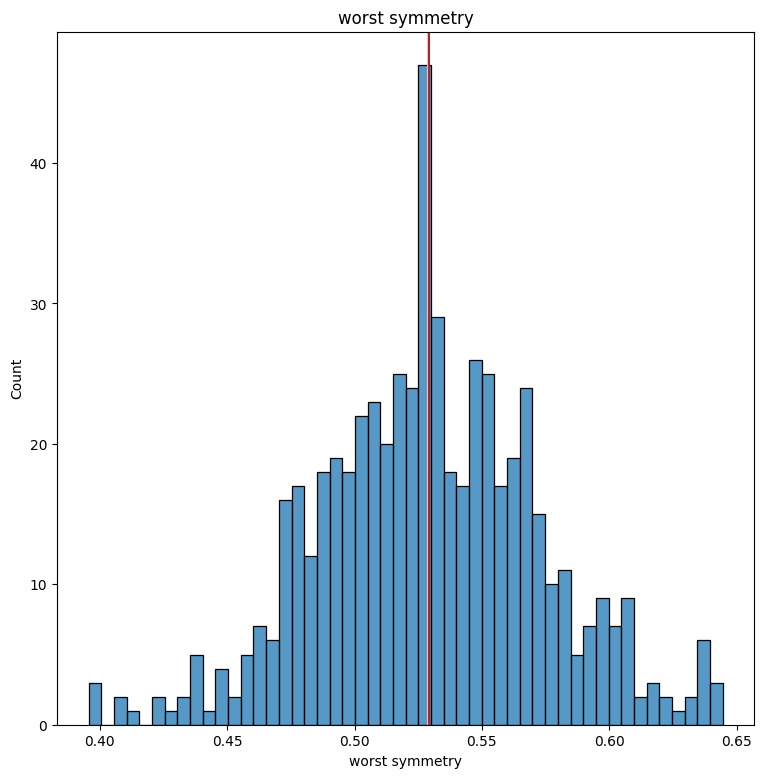

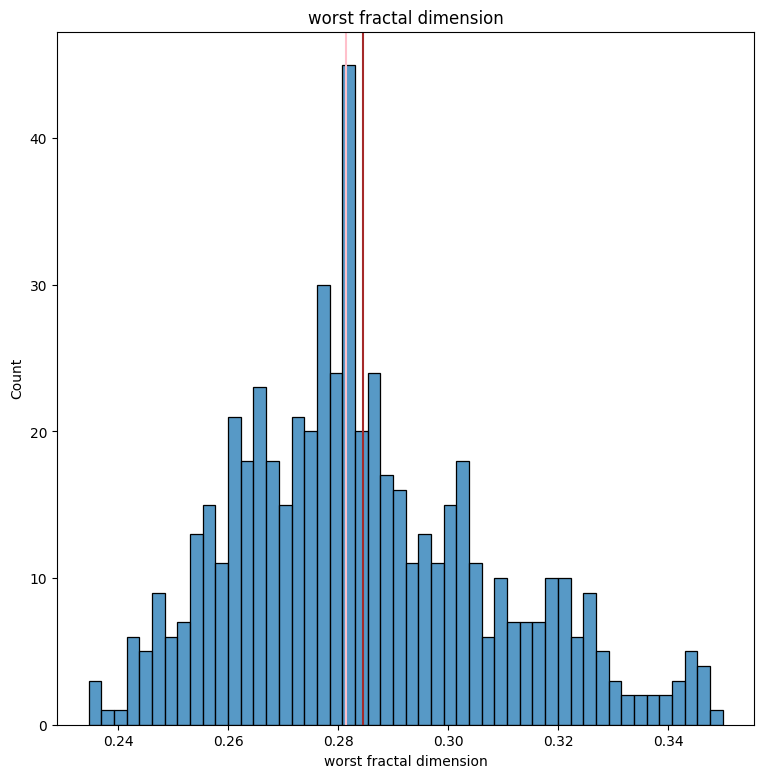

In [ ]:
for col in independent_column:
  fig=plt.figure(figsize=(9,9))
  ax=fig.gca()
  features=np.sqrt(cancer_df[col])
  sns.histplot(x=features,bins=50)
  plt.title(col)
  plt.axvline(features.median(),color='pink')
  plt.axvline(features.mean(),color='brown')

**Applying square root on a dataset to bring it into a normal distribution form**

In [ ]:
cancer_df[independent_column]=np.sqrt(cancer_df[independent_column])

###  Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x=cancer_df[independent_column]
y=cancer_df['target']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

### Handling Imbalanced Dataset

In [ ]:
cancer_df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

## *** ML Model Implementation***

### **ML Model - Logistic regression**

In [ ]:
# ML Model - 1 Implementation
lr=LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
lr.fit(X_train,y_train)


LogisticRegression(max_iter=10000)

In [ ]:
lr.score(X_train,y_train)

0.9384615384615385

In [ ]:
# Predict on the model
train_pred=lr.predict(X_train)
test_pred=lr.predict(X_test)

In [ ]:
#Predict the probability
train_pred_proba=lr.predict_proba(X_train)
test_pred_proba=lr.predict_proba(X_test)

In [ ]:
test_pred_proba

array([[9.83920215e-01, 1.60797847e-02],
       [5.21977446e-03, 9.94780226e-01],
       [8.99185723e-03, 9.91008143e-01],
       [4.56112904e-04, 9.99543887e-01],
       [1.28639382e-01, 8.71360618e-01],
       [2.30078217e-02, 9.76992178e-01],
       [3.93007464e-01, 6.06992536e-01],
       [9.98052749e-01, 1.94725072e-03],
       [9.97251357e-01, 2.74864260e-03],
       [6.31023698e-01, 3.68976302e-01],
       [9.99430792e-01, 5.69207543e-04],
       [1.69691684e-01, 8.30308316e-01],
       [9.91477305e-02, 9.00852269e-01],
       [2.67764891e-02, 9.73223511e-01],
       [6.05356955e-02, 9.39464304e-01],
       [8.87763758e-01, 1.12236242e-01],
       [9.18008579e-01, 8.19914213e-02],
       [1.38388829e-02, 9.86161117e-01],
       [1.88095396e-04, 9.99811905e-01],
       [9.52831081e-03, 9.90471689e-01],
       [5.17771218e-02, 9.48222878e-01],
       [1.70748103e-01, 8.29251897e-01],
       [9.88624713e-01, 1.13752870e-02],
       [3.31733042e-02, 9.66826696e-01],
       [9.979949

**evaluation metrics on training dataset**

In [ ]:
log_precision=precision_score(train_pred,y_train)
log_recall=recall_score(train_pred,y_train)
log_accuracy=accuracy_score(train_pred,y_train)
log_roc_auc=roc_auc_score(train_pred,y_train)
log_confusion_matrics=confusion_matrix(train_pred,y_train)

In [ ]:
print(f'precision scoe is {log_precision}')
print(f'recall scoe is {log_recall}')
print(f'accuracy scoe is {log_accuracy}')

print(f'roc_auc scoe is {log_roc_auc}')
print(log_confusion_matrics)

precision scoe is 0.9614035087719298
recall scoe is 0.9415807560137457
accuracy scoe is 0.9384615384615385
roc_auc scoe is 0.9372537926410192
[[153  11]
 [ 17 274]]


([<matplotlib.axis.YTick at 0x7a53b1921870>,
 [Text(0, 0, 'no cancer'), Text(0, 1, 'cancer')])

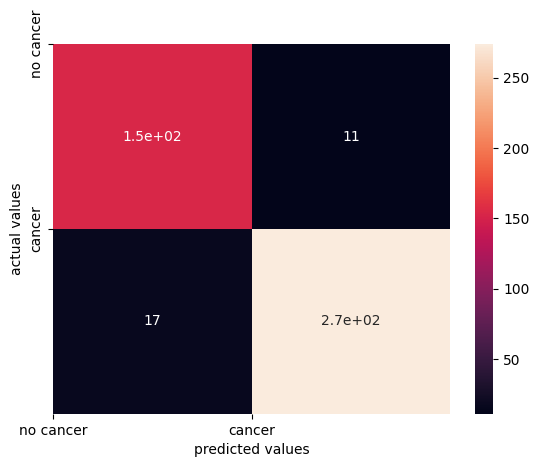

In [ ]:
sns.heatmap(log_confusion_matrics,annot=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.xticks(ticks=[0,1],labels=['no cancer','cancer'])
plt.yticks(ticks=[0,1],labels=['no cancer','cancer'])

**evaluation metrics on testing dataset**

In [ ]:
log_precision_test=precision_score(test_pred,y_test)
log_recall_test=recall_score(test_pred,y_test)
log_accuracy_test=accuracy_score(test_pred,y_test)
log_roc_auc_test=roc_auc_score(test_pred,y_test)
log_confusion_matrics_test=confusion_matrix(test_pred,y_test)

fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba[:, 1])


In [ ]:
print(f'precision scoe is {log_precision_test}')
print(f'recall scoe is {log_recall_test}')
print(f'accuracy scoe is {log_accuracy_test}')
print(f'roc_auc scoe is {log_roc_auc_test}')
print(log_confusion_matrics_test)

precision scoe is 0.9861111111111112
recall scoe is 0.9861111111111112
accuracy scoe is 0.9824561403508771
roc_auc scoe is 0.9811507936507937
[[41  1]
 [ 1 71]]


([<matplotlib.axis.YTick at 0x7a53b86b1f30>,
 [Text(0, 0, 'no cancer'), Text(0, 1, 'cancer')])

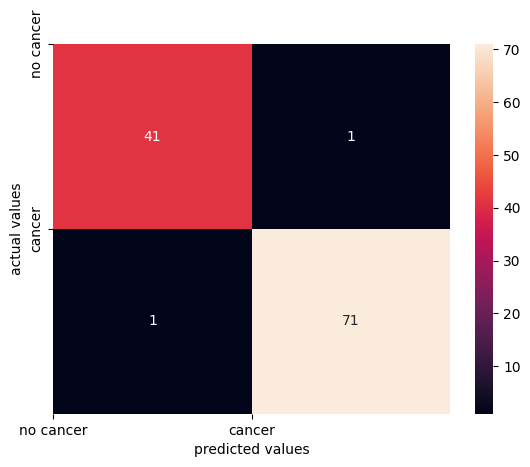

In [ ]:
sns.heatmap(log_confusion_matrics_test,annot=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.xticks(ticks=[0,1],labels=['no cancer','cancer'])
plt.yticks(ticks=[0,1],labels=['no cancer','cancer'])

**roc_curve**

Text(0, 0.5, 'tpr')

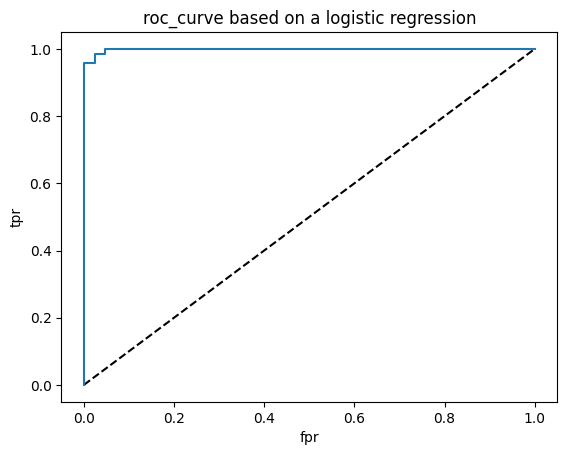

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic')
plt.title('roc_curve based on a logistic regression')
plt.xlabel('fpr')
plt.ylabel('tpr')


### **ML Model - Decision tree algorithm**

In [ ]:
decision_tree=DecisionTreeClassifier(criterion='entropy',max_depth=7)

In [ ]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [ ]:
train_pred=decision_tree.predict(X_train)
test_pred=decision_tree.predict(X_test)

In [ ]:
train_pred_tree_proba=decision_tree.predict_proba(X_train)
test_pred_tree_proba=decision_tree.predict_proba(X_test)

**evaluation metrics on training dataset**

In [ ]:
tree_precision=precision_score(train_pred,y_train)
tree_recall=recall_score(train_pred,y_train)
tree_accuracy=accuracy_score(train_pred,y_train)
tree_roc_auc=roc_auc_score(train_pred,y_train)
tree_confusion_matrix=confusion_matrix(train_pred,y_train)


In [ ]:
print(f'precision scoe is {tree_precision}')
print(f'recall scoe is {tree_recall}')
print(f'accuracy scoe is {tree_accuracy}')
print(f'roc_corve scoe is {tree_roc_auc}')
print(tree_confusion_matrix)

precision scoe is 1.0
recall scoe is 1.0
accuracy scoe is 1.0
roc_corve scoe is 1.0
[[170   0]
 [  0 285]]


([<matplotlib.axis.YTick at 0x7a53b15c8970>,
 [Text(0, 0, 'no cancer'), Text(0, 1, 'cancer')])

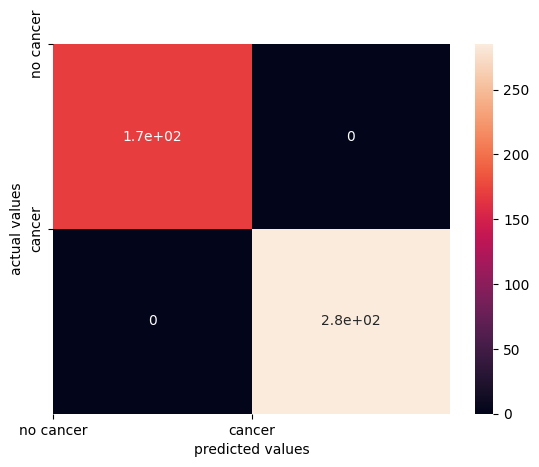

In [ ]:
sns.heatmap(tree_confusion_matrix,annot=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.xticks(ticks=[0,1],labels=['no cancer','cancer'])
plt.yticks(ticks=[0,1],labels=['no cancer','cancer'])

**evaluation metrics on testing dataset**

In [ ]:
tree_precision_test=precision_score(test_pred,y_test)
tree_recall_test=recall_score(test_pred,y_test)
tree_accuracy_test=accuracy_score(test_pred,y_test)
tree_roc_auc_test=roc_auc_score(test_pred,y_test)
tree_confusion_matrix_test=confusion_matrix(test_pred,y_test)
fpr, tpr, thresholds=roc_curve(y_test,test_pred_tree_proba[:,1])

In [ ]:
print(f'precision scoe is {tree_precision_test}')
print(f'recall scoe is {tree_recall_test}')
print(f'accuracy scoe is {log_accuracy_test}')
print(f'roc_auc scoe is {log_roc_auc_test}')
print(tree_confusion_matrix_test)

precision scoe is 0.9444444444444444
recall scoe is 0.9315068493150684
accuracy scoe is 0.9824561403508771
roc_auc scoe is 0.9811507936507937
[[37  4]
 [ 5 68]]


([<matplotlib.axis.YTick at 0x7a53b0ec4790>,
 [Text(0, 0, 'no cancer'), Text(0, 1, 'cancer')])

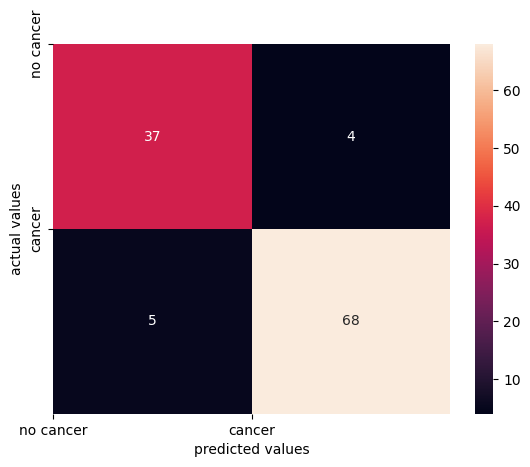

In [ ]:
sns.heatmap(tree_confusion_matrix_test,annot=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.xticks(ticks=[0,1],labels=['no cancer','cancer'])
plt.yticks(ticks=[0,1],labels=['no cancer','cancer'])

**roc curve**

Text(0, 0.5, 'tpr')

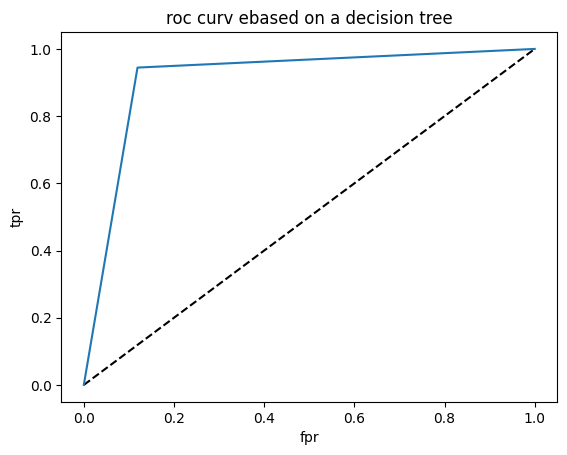

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr,label='decision tree')
plt.title('roc curv ebased on a decision tree')
plt.xlabel('fpr')
plt.ylabel('tpr')

**Plotting the decision tree**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from IPython.display import display
from IPython.display import SVG

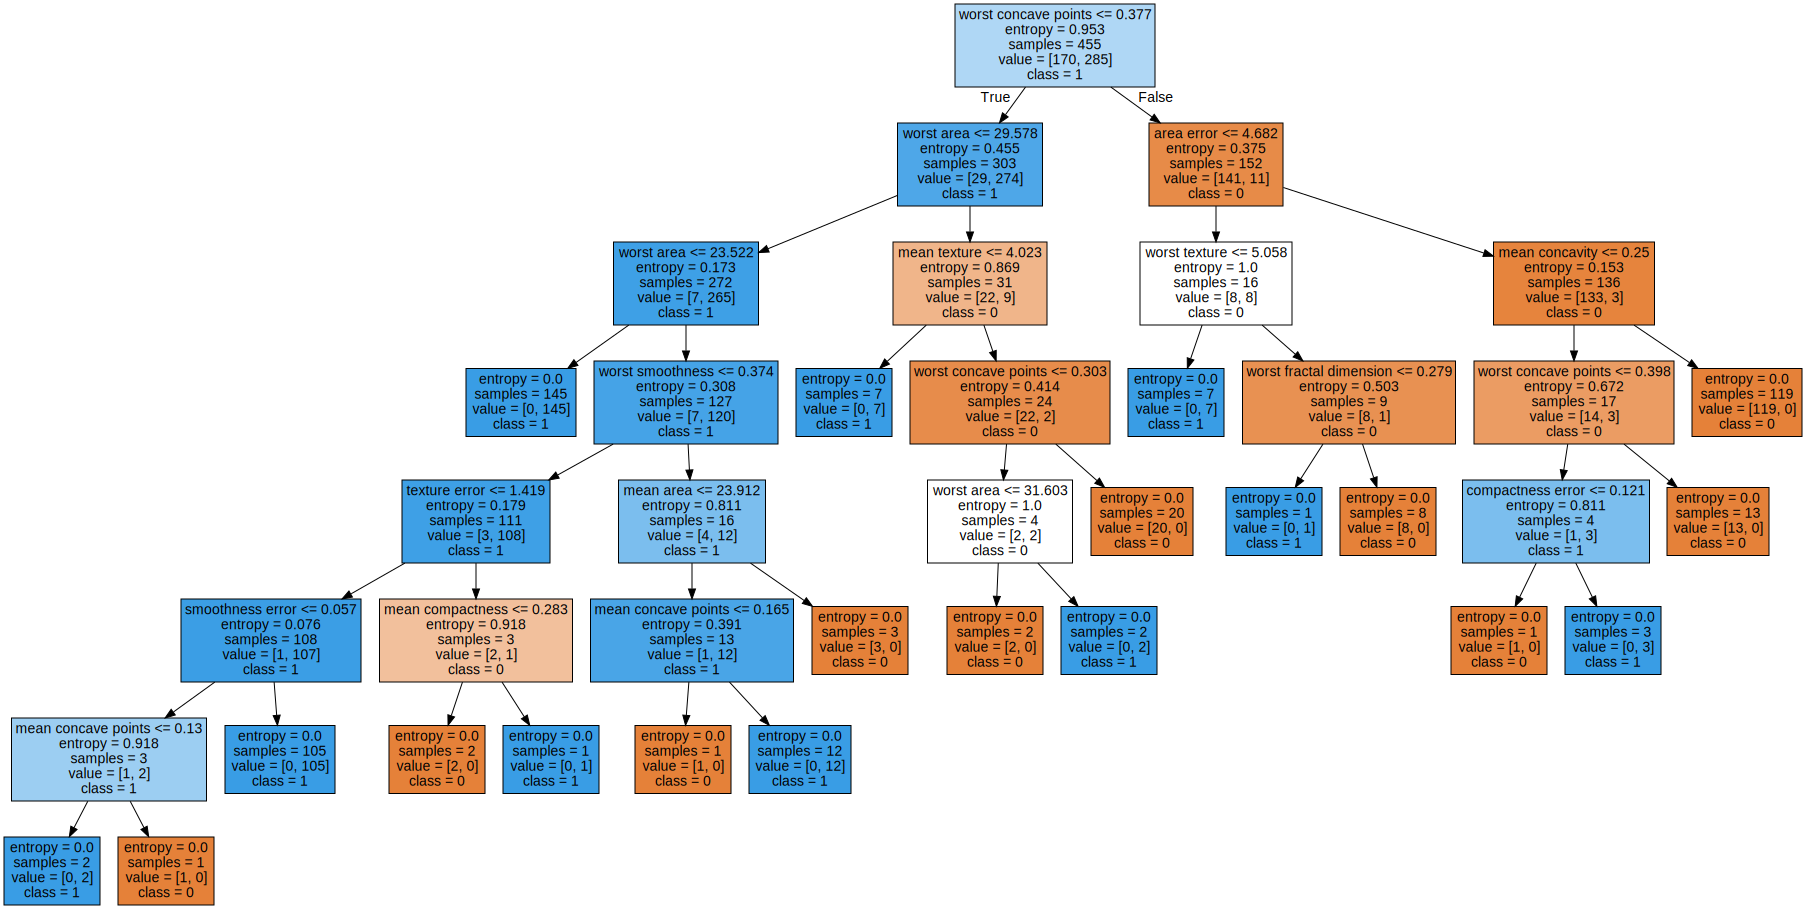

In [ ]:
graph = Source(tree.export_graphviz(decision_tree, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1']
   , filled = True))
display(SVG(graph.pipe(format='svg')))

####  Cross- Validation & Hyperparameter Tuning on a decision tree model

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
decision_tree=DecisionTreeClassifier()
param_grid = {'max_leaf_nodes':[10, 20,  30], 'max_depth':[3, 5, 7],'min_samples_split':[2,4,8]}
decision_tree_grid=GridSearchCV(decision_tree,param_grid,scoring='neg_mean_squared_error',cv=5)
# Fit the Algorithm
decision_tree_grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'max_leaf_nodes': [10, 20, 30],
                         'min_samples_split': [2, 4, 8]},
             scoring='neg_mean_squared_error')

In [ ]:
decision_tree_grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_split': 8}

In [ ]:
decision_tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_split=8)

In [ ]:
best_grid_model=decision_tree_grid.best_estimator_

In [ ]:
# Predict on the model
y_train_pred_tree_grid=best_grid_model.predict(X_train)
y_test_pred_tree_grid=best_grid_model.predict(X_test)

**evaluation metrics on training dataset**

In [ ]:
train_accuracy_tree_grid = round(accuracy_score(y_train_pred_tree_grid,y_train), 3)
train_precision_score_tree_grid = round(precision_score(y_train_pred_tree_grid,y_train), 3)
train_recall_score_tree_grid = round(recall_score(y_train_pred_tree_grid,y_train), 3)
train_roc_auc_score_tree_grid = round(roc_auc_score(y_train_pred_tree_grid,y_train), 3)

print("The accuracy on train data is ", train_accuracy_tree_grid)
print("The precision on train data is ", train_precision_score_tree_grid)
print("The recall on train data is ", train_recall_score_tree_grid)
print("The roc_score on train data is ", train_roc_auc_score_tree_grid)


The accuracy on train data is  0.976
The precision on train data is  0.986
The recall on train data is  0.976
The roc_score on train data is  0.976


**evaluation metrics on testing dataset**

In [ ]:
test_accuracy_tree_grid = round(accuracy_score(y_test_pred_tree_grid,y_test), 3)
test_precision_score_tree_grid = round(precision_score(y_test_pred_tree_grid,y_test), 3)
test_recall_score_tree_grid = round(recall_score(y_test_pred_tree_grid,y_test), 3)
test_roc_auc_score_tree_grid = round(roc_auc_score(y_test_pred_tree_grid,y_test), 3)

print("The accuracy on train data is ", test_accuracy_tree_grid)
print("The precision on train data is ", test_precision_score_tree_grid)
print("The recall on train data is ", test_recall_score_tree_grid)
print("The roc_score on train data is ", test_roc_auc_score_tree_grid)


The accuracy on train data is  0.947
The precision on train data is  0.986
The recall on train data is  0.934
The roc_score on train data is  0.954


### the feature importance using  model explainability tool

In [ ]:
importances=best_grid_model.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04863862, 0.        , 0.        , 0.        , 0.        ,
       0.01004284, 0.        , 0.02078689, 0.17328396, 0.        ,
       0.        , 0.        , 0.74724769, 0.        , 0.        ])

In [ ]:
importances_columns=(x.columns).tolist()
importances_columns

['mean texture',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst texture',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [ ]:
importances_dict={'important_features':importances_columns,'importance_values':importances}

In [ ]:
importances_df=pd.DataFrame(importances_dict)
importances_df

important_features  importance_values
0              mean texture           0.000000
1                 mean area           0.000000
2           mean smoothness           0.000000
3          mean compactness           0.000000
4            mean concavity           0.000000
5       mean concave points           0.000000
6             mean symmetry           0.000000
7    mean fractal dimension           0.000000
8             texture error           0.000000
9           perimeter error           0.000000
10               area error           0.048639
11         smoothness error           0.000000
12        compactness error           0.000000
13          concavity error           0.000000
14     concave points error           0.000000
15           symmetry error           0.010043
16  fractal dimension error           0.000000
17            worst texture           0.020787
18               worst area           0.173284
19         worst smoothness           0.000000
20        worst compactness           0.000000
21          worst concavity           0.000000
22     worst concave points           0.747248
23           worst symmetry           0.000000
24  worst fractal dimension           0.000000

<Axes: xlabel='importance_values', ylabel='important_features'>

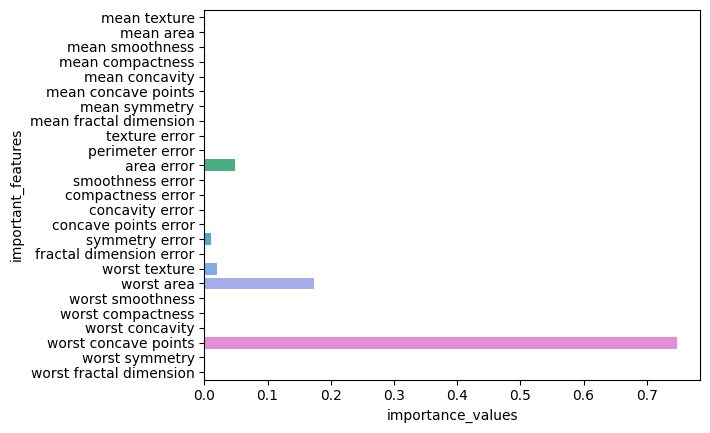

In [ ]:
sns.barplot(y=importances_df['important_features'],x=importances_df['importance_values'])

**SHAP summary plot**

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.4 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import export_graphviz
import shap
import graphviz
sns.set_style('darkgrid')

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_grid_model)
# Calculate Shap values
shap_values = explainer.shap_values(X_train)


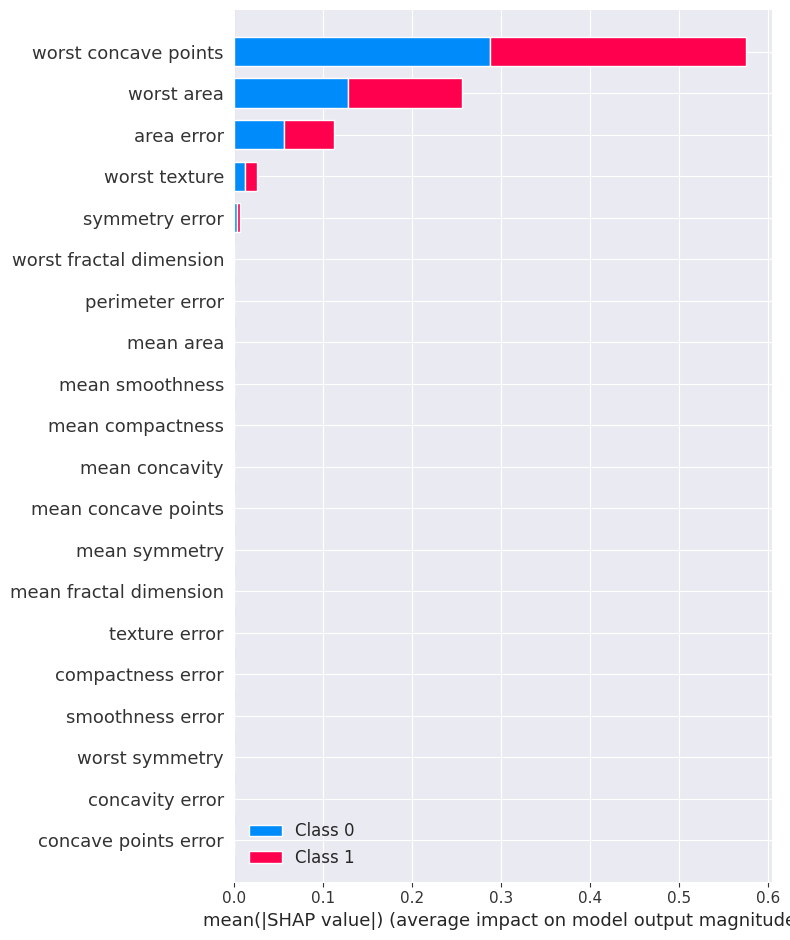

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names=importances_columns)

# **Conclusion**

From the above data i tried to get the informaion related to the cancer predictions and also data points distribution, scatter plotting, statistical properties on the same columns and i found count of a cancer patients are more and also found other characteristics from the data. based on the ml model implimentation i get the best model is gridsearchcv based on a decision tree algorithm.